## **«Проектное исследование на основе открытых данных в области биомедицины»**

## **Цель:**
Применить методы как классического, так и глубокого машинного обучения для достижения наилучших результатов в предсказании медицинских исходов на основе выбранного набора данных.

Для работы был использован датасет **Breast Cancer Wisconsin Dataset**, ссылка на репозиторий: (https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))


### **Описание датасета: данные и признаки**

Датасет включает реальные данные пациенток, которым была проведена тонкоигольная аспирационная биопсия молочной железы для диагностики характера опухолевого образования.

Все признаки были получены в результате компьютерной обработки изображений биопсийного материала с использованием специализированного программного обеспечения. При этом анализировались только клеточные ядра, поэтому все **признаки представлены вычисленными программой специфическими характеристиками клеточных ядер**. (Nuclear feature extraction for breast tumor diagnosis By W. Street, W. Wolberg, O. Mangasarian. 1993 Published in Electronic imaging) (https://www.sci-hub.ru/10.1117/12.148698)

Ключевым этапом подготовки изображений для компьютерной обработки стало выделение границ клеточных ядер - прорисовку их контуров. На основе полученных линий контуров выполнялась дальнейшая обработка изображений и извлечение признаков.

Пример изображения - биоптата с выделенными программой границами клетчных ядер для дальнейшей обработки и извлечения признаков (Nuclear feature extraction for breast tumor diagnosis By W. Street, W. Wolberg, O. Mangasarian. 1993 Published in Electronic imaging, figure 2) (https://www.sci-hub.ru/10.1117/12.148698)

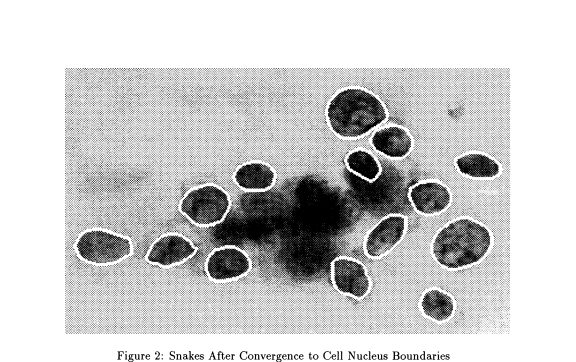




**Всего вычислялось 10 ключевых признаков:**

   1) *radius* (mean of distances from center to points on the perimeter)- среднее расстояние от центра ядра до его границы,
   2) *texture* (standard deviation of gray-scale values) - определения разницы в интенсивности оттенков серого,
   3) *perimeter* (длина "окружности" клеточного ядра)
   4) *area* (Площадь ядра измеряется простым подсчетом количества пикселей внутри выделенной границы и добавлением половины пикселей от периметра)
   5) *smoothness* (local variation in radius lengths) - локальные вариации длины радиуса клеточного ядра
   6) *compactness* (perimeter**2 / area - 1.0)
   7) *concavity* (severity of concave portions of the contour) - степень вогнутости контура (линни границы) клеточного ядра
   8) *concave_points* (number of concave portions of the contour) - количество "вогнутостей"
   9) *symmetry* - симметрия клеточного ядер: находится самая длинная ось ядра, проходящая через центр, к ней проводят перпендикуляры и оценивают длину каждого из отрезков по обе стороны от оси.
   10) *fractal_dimension* ("coastline approximation" - 1)

Все признаки численно моделировались таким образом, что бОльшие значения обычно указывают на более высокую вероятность злокачественности.

Для каждого признака вычислялось среднее значение, экстремальное (наибольшее) значение и стандартная ошибка, поэтому в финальном датасете для каждого изображения получалось 30 признаков.

Количество наблюдений - 596

Количество признаков - 32:
- 1) ID number

- 2-31) - 10 ключевых признаков, каждый из которых представлен тремя значениями: среднее значение, экстремальное (наибольшее) значение и стандартная ошибка, всего 30 признаков. Среднему значению соотвествует добавление цифры 1 в названии признака (например, radius1), стандартная ошибка - цифра 2 в названии признака (например, radius2), экстремальному значению соотвествует признаки с цифрой 3 в названии (например, radius3), :
   - признаки 2 -11: 
         *radius1* ,*texture1*, *perimeter1*, *area1*, *smoothness1*, *compactness1*, *concavity1*, *concave_points1*, *symmetry1*, *fractal_dimension1*
   - признаки 12 -21:
        *radius2* ,*texture2*, *perimeter2*, *area2*, *smoothness2*, *compactness2*, *concavity2*, *concave_points2*, *symmetry2*, *fractal_dimension2*
    - признаки 22 -31:
        *radius3* ,*texture3*, *perimeter3*, *area3*, *smoothness3*, *compactness3*, *concavity3*, *concave_points3*, *symmetry3*, *fractal_dimension3*

- 32) Diagnosis - диагноз, 2 возможных варианта: M  (malignant = злокачественный), B  (benign = доброкачественный)

Т.о. перед нами стоит задача бинарной классификации - построение модели для определения возможного диагноза на предоставленных данных.



### **Импортирование библиотек для обработки данных и построения классических моделей машинного обучения и глубокого машинного обучения**

In [163]:
# Уберем предупреждения, чтобы они не загромождали вывод
import warnings
warnings.filterwarnings('ignore')

In [164]:
import pandas as pd                    # Импорт библиотеки pandas для работы с табличными данными (DataFrame)
import numpy as np                     # Импорт библиотеки numpy для работы с массивами и числовыми операциями
import seaborn as sns                  # Импорт библиотеки seaborn для создания красивых и информативных визуализаций данных
from matplotlib import pyplot as plt   # Импорт функции pyplot из библиотеки matplotlib для создания графиков и визуализаций

from sklearn.preprocessing import OneHotEncoder, StandardScaler # Импорт классов для кодирования категориальных признаков и стандартизации данных
from sklearn.model_selection import train_test_split            # Импорт функций для разбиения данных на тренировочную и тестовую выборки

from sklearn.linear_model import LogisticRegression    # Импорт модели логистической регрессии
from sklearn.neighbors import KNeighborsClassifier     # Импорт классификатора K-ближайших соседей
from sklearn.tree import DecisionTreeClassifier        # Импорт классификатора на основе дерева решений
from sklearn.svm import SVC                            # Импорт классификатора на основе метода опорных векторов (SVM)

from sklearn import metrics      # Импорт всего модуля metrics для работы с метриками оценки моделей
from sklearn.metrics import (    # Импорт конкретных функций оценки из подмодуля metrics
    accuracy_score,              # Импорт функции для оценки точности (accuracy) модели, т.е. доли правильно предсказанных примеров
    balanced_accuracy_score,     # Импорт функции для оценки сбалансированной точности, учитывающей классовую неоднородность
    precision_score,             # Импорт функции для вычисления точности (precision)
    recall_score,                # Импорт функции для вычисления полноты (recall)
    confusion_matrix,            # Импорт функции для создания матрицы ошибок (confusion matrix):TN, TP, FN, FP
    multilabel_confusion_matrix, # Импорт функции для создания матрицы ошибок для случаев с многомерной классификацией
    f1_score,                    # Импорт функции для вычисления F1-меры
    roc_auc_score,               # Импорт функции для вычисления AUC-ROC (площадь под кривой приемлемости и ошибок)
    roc_curve,                   # Импорт функции для вычисления координат для построения ROC-кривой
    average_precision_score,     # Импорт функции для вычисления средней точности (average precision)
    precision_recall_curve,      # Импорт функции для вычисления и визуализации кривой "точность-полнота" (precision-recall curve)
    classification_report        # Импорт функции для вычисления краткого отчета по метрикам классификации (accuracy, precision, recall, fi_score)
)

### 1. Первичное знакомство с данными

* Загрузим датасет

In [165]:
# URL - ссылка на датасет
url = "https://raw.githubusercontent.com/VinogradovAI/breast_cancer_prediction/refs/heads/master/data/raw/data.csv"

# Чтение CSV-файла из URL
data = pd.read_csv(url)

- Первичное знакомство с данными и признаками

In [166]:
data.shape

(569, 32)

Размер датасета - 569 наблюдений и 32 признака.

In [167]:
# выведем название колонок датасета
data.columns

Index(['ID', 'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3', 'Diagnosis'],
      dtype='object')

Выведем первые 5 строк датасета, транспонируем таблицу чтобы можно было визуально оценить данные

In [168]:
data.head().T

0         1         2         3         4
ID                    842302    842517  84300903  84348301  84358402
radius1                17.99     20.57     19.69     11.42     20.29
texture1               10.38     17.77     21.25     20.38     14.34
perimeter1             122.8     132.9     130.0     77.58     135.1
area1                 1001.0    1326.0    1203.0     386.1    1297.0
smoothness1           0.1184   0.08474    0.1096    0.1425    0.1003
compactness1          0.2776   0.07864    0.1599    0.2839    0.1328
concavity1            0.3001    0.0869    0.1974    0.2414     0.198
concave_points1       0.1471   0.07017    0.1279    0.1052    0.1043
symmetry1             0.2419    0.1812    0.2069    0.2597    0.1809
fractal_dimension1   0.07871   0.05667   0.05999   0.09744   0.05883
radius2                1.095    0.5435    0.7456    0.4956    0.7572
texture2              0.9053    0.7339    0.7869     1.156    0.7813
perimeter2             8.589     3.398     4.585     3.445     5.438
area2                  153.4     74.08     94.03     27.23     94.44
smoothness2         0.006399  0.005225   0.00615   0.00911   0.01149
compactness2         0.04904   0.01308   0.04006   0.07458   0.02461
concavity2           0.05373    0.0186   0.03832   0.05661   0.05688
concave_points2      0.01587    0.0134   0.02058   0.01867   0.01885
symmetry2            0.03003   0.01389    0.0225   0.05963   0.01756
fractal_dimension2  0.006193  0.003532  0.004571  0.009208  0.005115
radius3                25.38     24.99     23.57     14.91     22.54
texture3               17.33     23.41     25.53      26.5     16.67
perimeter3             184.6     158.8     152.5     98.87     152.2
area3                 2019.0    1956.0    1709.0     567.7    1575.0
smoothness3           0.1622    0.1238    0.1444    0.2098    0.1374
compactness3          0.6656    0.1866    0.4245    0.8663     0.205
concavity3            0.7119    0.2416    0.4504    0.6869       0.4
concave_points3       0.2654     0.186     0.243    0.2575    0.1625
symmetry3             0.4601     0.275    0.3613    0.6638    0.2364
fractal_dimension3    0.1189   0.08902   0.08758     0.173   0.07678
Diagnosis                  M         M         M         M         M

In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  569 non-null    int64  
 1   radius1             569 non-null    float64
 2   texture1            569 non-null    float64
 3   perimeter1          569 non-null    float64
 4   area1               569 non-null    float64
 5   smoothness1         569 non-null    float64
 6   compactness1        569 non-null    float64
 7   concavity1          569 non-null    float64
 8   concave_points1     569 non-null    float64
 9   symmetry1           569 non-null    float64
 10  fractal_dimension1  569 non-null    float64
 11  radius2             569 non-null    float64
 12  texture2            569 non-null    float64
 13  perimeter2          569 non-null    float64
 14  area2               569 non-null    float64
 15  smoothness2         569 non-null    float64
 16  compactn

судя по информации выше, в колонках нет пропусков, все признаки представлены числовыми значениями, диагноз - категориальной.

Проверим наличие выбросов и дубликатов.

In [170]:
data.isna().sum()[:17]

ID                    0
radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
dtype: int64

In [171]:
data.isna().sum()[17:]

concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
Diagnosis             0
dtype: int64

Пропущенных значений нет

In [172]:
# поиск дубликатов
data.duplicated().sum()

# дубликатов нет

0

### 2. Детальное знакомство с данными

- удалим колонку ID -идентификационный номер пациента, т.к. она неважна для дальнейшего исследования

In [173]:
data.drop('ID', axis = 1, inplace = True)

- проанализируем таргетную переменную

In [174]:
data['Diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [175]:
data['Diagnosis'].value_counts(True)

Diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64

Таргетная переменная представлена только 2 значениями - В (доброкачественный), M -(злокачественный), переменная распределена неравномерно.

Произведем кодирование таргетной переменной для удобства использования в дальнейшем:
 - M - 1 (наличие злокачественной опухоли)
 - B - 0 (отсуствие злокачественной опухоли, доброкачественная опухоль)

In [176]:
data['Diagnosis'] = data['Diagnosis'].apply(lambda x: 1 if x == 'M' else 0)

In [177]:
data['Diagnosis'].value_counts(True)

Diagnosis
0    0.627417
1    0.372583
Name: proportion, dtype: float64

- Посмотрим описательную статистику, и выведем гистограммы распределения числовых признаков (в том числе в зависимости от типа заболевания (М или B))

Напишем функцию для оценки числовой переменной, оценивать будем по 3 подпризнака каждого признака (т.е среднее значение, стандартное отклонение, и наибольшее значение каждого признака) (например, radius1, raduis2, radius3) 

In [178]:
def feat_asses_3(data, *f):
    for feature in list(f):
        target=data.groupby('Diagnosis')
        B=target.get_group(0)
        M=target.get_group(1)
       
        print(f"Описательная статистика  для переменной {feature} в зависимости от диагноза:")
        display(target[feature].describe())
        
        fig, axes = plt.subplots(1, 3, figsize = (15,5))
        sns.histplot(data[feature], kde= True, ax = axes[0])
        axes[0].set_title(f'Гистограмма\n распределения\n признака {feature}')
        axes[0].grid(alpha=0.4)
        sns.histplot(data = data, x = feature, kde= True, hue = 'Diagnosis', ax = axes[1])
        axes[1].set_title(f'Гистограмма распределение признака {feature}\n в зависимости от типа опухоли \n(1 - злокачественная,\n 0 - доброкачественная)')
        axes[1].grid(alpha=0.4)
        sns.boxplot(data=data, y = feature,  hue = 'Diagnosis', ax = axes[2])
        axes[2].set_title(f'График распределение признака {feature}\n в зависимости от типа опухоли \n(1 - злокачественная,\n 0 - доброкачественная)')
        # axes[2].set_xlabel('CKD')
        axes[2].grid(alpha=0.4)
       
        fig.show()

In [179]:
# создадим копию датасета и будем сохранять в него данные после удаления признаков
data_out = data.copy()

In [180]:
data_out.shape

(569, 31)

___
- оценим признаки 'radius1', 'radius2', 'radius3'

Описательная статистика для переменной radius1:


count    569.000000
mean      14.127292
std        3.524049
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       28.110000
Name: radius1, dtype: float64

Описательная статистика  для переменной radius1 в зависимости от диагноза:


count       mean       std     min     25%     50%    75%    max
Diagnosis                                                                  
0          357.0  12.146524  1.780512   6.981  11.080  12.200  13.37  17.85
1          212.0  17.462830  3.203971  10.950  15.075  17.325  19.59  28.11

Описательная статистика для переменной radius2:


count    569.000000
mean       0.405172
std        0.277313
min        0.111500
25%        0.232400
50%        0.324200
75%        0.478900
max        2.873000
Name: radius2, dtype: float64

Описательная статистика  для переменной radius2 в зависимости от диагноза:


count      mean       std     min       25%     50%     75%     max
Diagnosis                                                                     
0          357.0  0.284082  0.112570  0.1115  0.207300  0.2575  0.3416  0.8811
1          212.0  0.609083  0.345039  0.1938  0.390375  0.5472  0.7573  2.8730

Описательная статистика для переменной radius3:


count    569.000000
mean      16.269190
std        4.833242
min        7.930000
25%       13.010000
50%       14.970000
75%       18.790000
max       36.040000
Name: radius3, dtype: float64

Описательная статистика  для переменной radius3 в зависимости от диагноза:


count       mean       std    min    25%    50%      75%    max
Diagnosis                                                                 
0          357.0  13.379801  1.981368   7.93  12.08  13.35  14.8000  19.82
1          212.0  21.134811  4.283569  12.84  17.73  20.59  23.8075  36.04

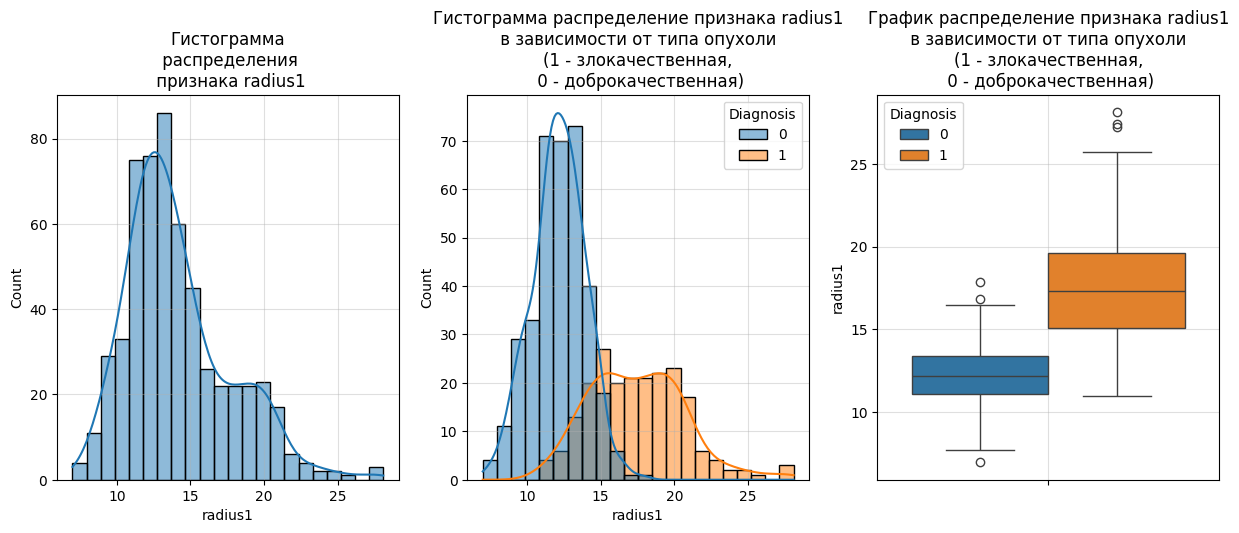

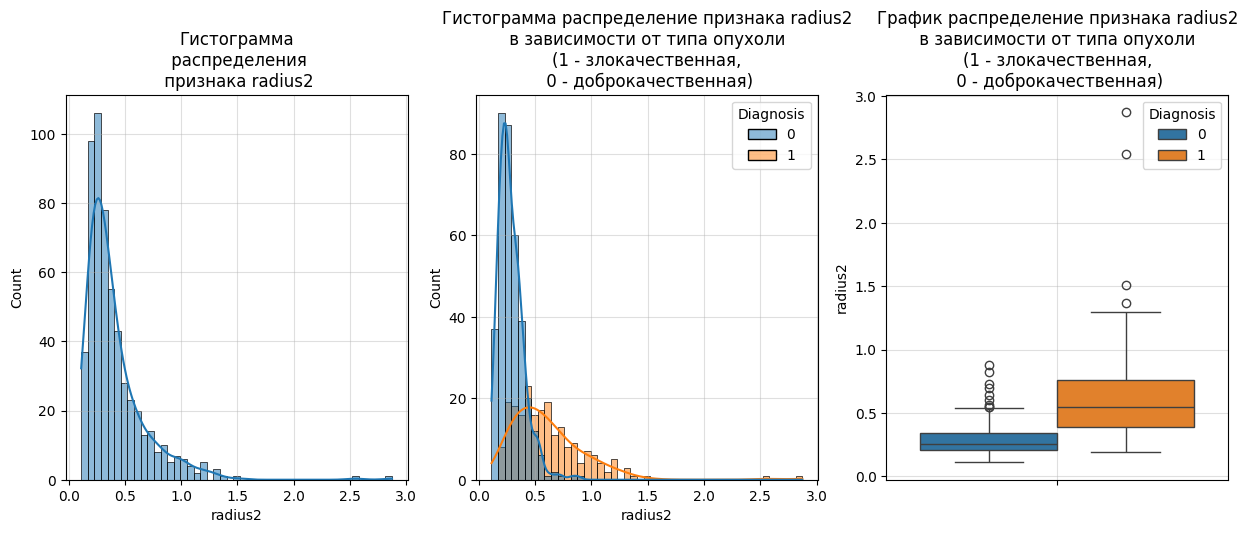

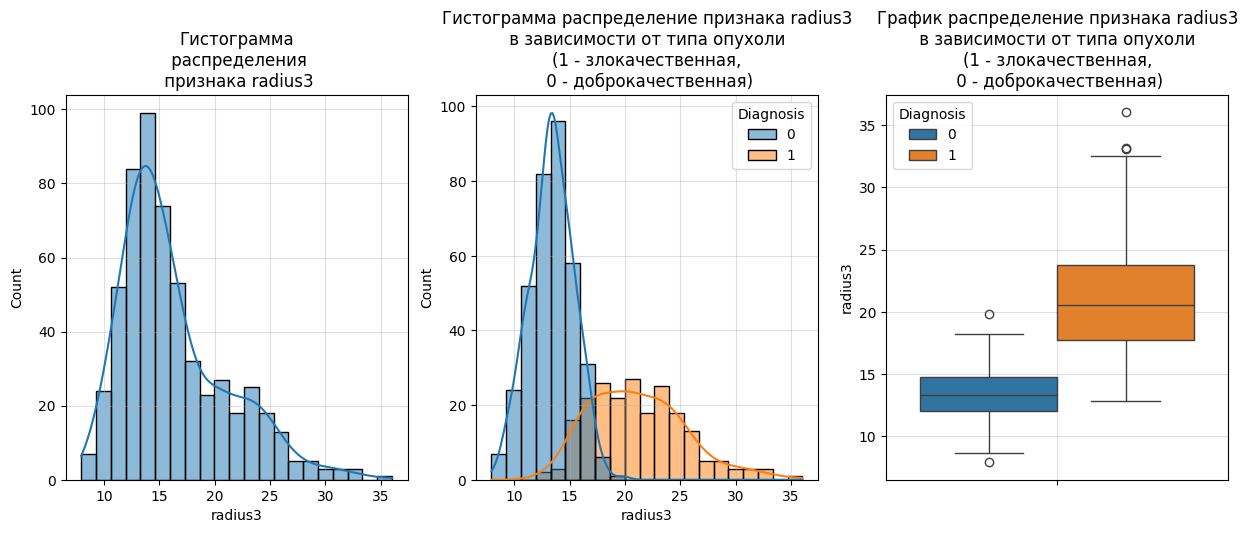

In [181]:
feat_asses_3(data, 'radius1', 'radius2', 'radius3')

- Признаки radius1, radius2, radius3: отмечается значительное различие в распределении признака в группах с разными типами новообразований (злокачественных и доброкачественных), - отмечается тенденция к бОльшему значению признака в группах со злокачественным новообразованием, 
- распределение признаков radius1, radius3 близко к нормальному (учитываются средние графики в каждом ряду - где учитывается распределение признака в зависимости от таргетной переменной),
- распределение признака в группе radius2 -напоминает логнормальное, возможно, в дальнешйем придется логарифмировать данный признак для использования в модели.
- выбросы:
   - признак radius1 - есть несколько выбросов в обеих группах, "выбросы выше верхней границы в группе 1 и выбросы ниже границы в группе 0 оставим, т.к.по логике формирования признака, чем больше значение в группе 1 и меньше значение в группе 0, тем больше вероятность злокачественности/доброкачественности соотвественно. выбросы "выше верхней границы" в группе 0 добавим в общий список для дальнейшего удаления
   - признак radius2 - распределение напоминает логнормальное, поэтому нельзя адекватно оценить выбросы, прологарифмируем признак и оценим выбросы.

признак radius2 - распределение напоминает логнормальное, поэтому нельзя адекватно оценить выбросы, прологарифмируем признак и оценим выбросы.

In [182]:
data_out['radius2'] = round(np.log(data_out['radius2']),3)

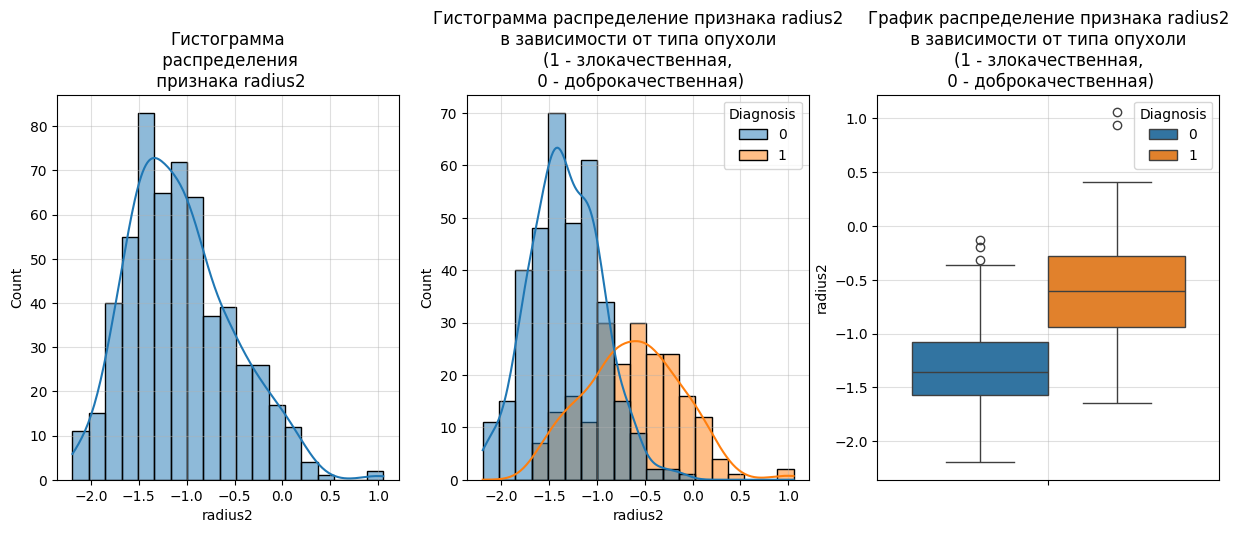

In [183]:
fig, axes = plt.subplots(1, 3, figsize = (15,5))
sns.histplot(data_out['radius2'], kde= True, ax = axes[0])
axes[0].set_title(f'Гистограмма\n распределения\n признака {"radius2"}')
axes[0].grid(alpha=0.4)
sns.histplot(x = data_out['radius2'],  hue = data_out['Diagnosis'], kde= True, ax = axes[1])
axes[1].set_title(f'Гистограмма распределение признака {"radius2"}\n в зависимости от типа опухоли \n(1 - злокачественная,\n 0 - доброкачественная)')
axes[1].grid(alpha=0.4)
sns.boxplot(y = data_out['radius2'],  hue = data_out['Diagnosis'],ax = axes[2])
axes[2].set_title(f'График распределение признака {"radius2"}\n в зависимости от типа опухоли \n(1 - злокачественная,\n 0 - доброкачественная)')
# axes[2].set_xlabel('CKD')
axes[2].grid(alpha=0.4)

Распределение признака изменилось, выбросов стало меньше. Добавим кандидатов на удаление только выбросы выше верхней границы в группе 0

___
- **оценим признаки texture 'texture1', 'texture2', 'texture3'**

Описательная статистика для переменной texture1:


count    569.000000
mean      19.289649
std        4.301036
min        9.710000
25%       16.170000
50%       18.840000
75%       21.800000
max       39.280000
Name: texture1, dtype: float64

Описательная статистика  для переменной texture1 в зависимости от диагноза:


count       mean       std    min      25%    50%     75%    max
Diagnosis                                                                  
0          357.0  17.914762  3.995125   9.71  15.1500  17.39  19.760  33.81
1          212.0  21.604906  3.779470  10.38  19.3275  21.46  23.765  39.28

Описательная статистика для переменной texture2:


count    569.000000
mean       1.216853
std        0.551648
min        0.360200
25%        0.833900
50%        1.108000
75%        1.474000
max        4.885000
Name: texture2, dtype: float64

Описательная статистика  для переменной texture2 в зависимости от диагноза:


count      mean       std     min       25%     50%      75%    max
Diagnosis                                                                     
0          357.0  1.220380  0.589180  0.3602  0.795900  1.1080  1.49200  4.885
1          212.0  1.210915  0.483178  0.3621  0.892825  1.1025  1.42925  3.568

Описательная статистика для переменной texture3:


count    569.000000
mean      25.677223
std        6.146258
min       12.020000
25%       21.080000
50%       25.410000
75%       29.720000
max       49.540000
Name: texture3, dtype: float64

Описательная статистика  для переменной texture3 в зависимости от диагноза:


count       mean       std    min      25%     50%    75%    max
Diagnosis                                                                  
0          357.0  23.515070  5.493955  12.02  19.5800  22.820  26.51  41.78
1          212.0  29.318208  5.434804  16.67  25.7825  28.945  32.69  49.54

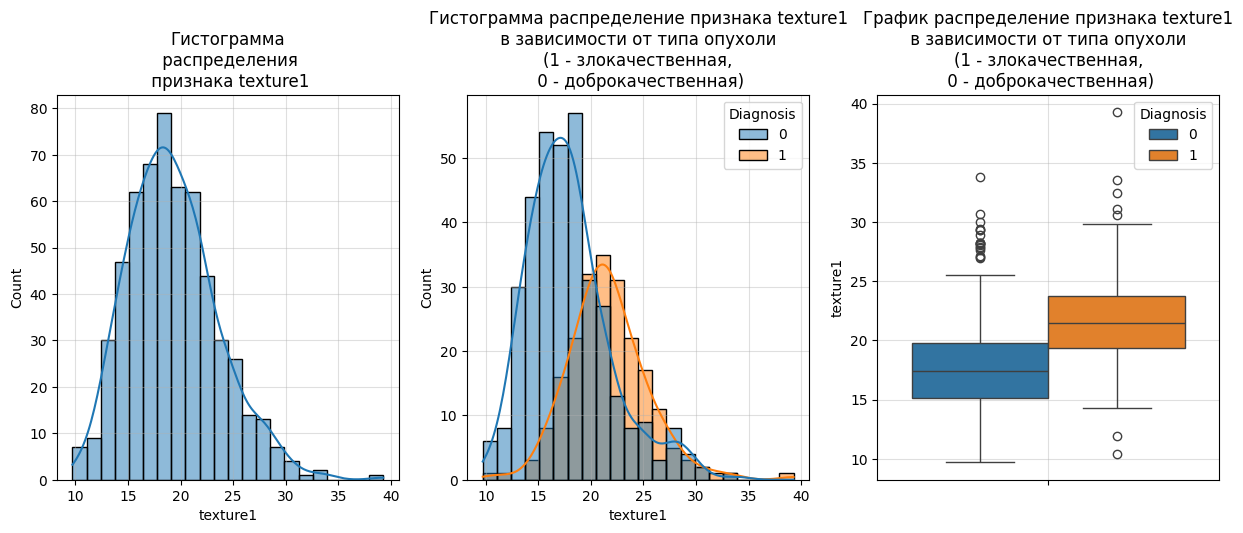

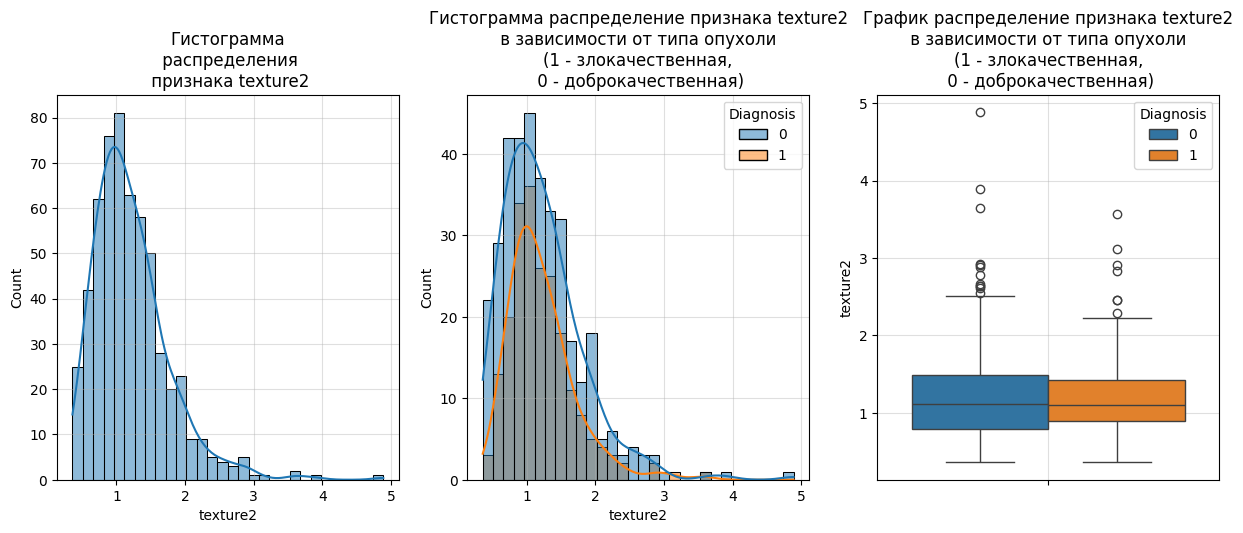

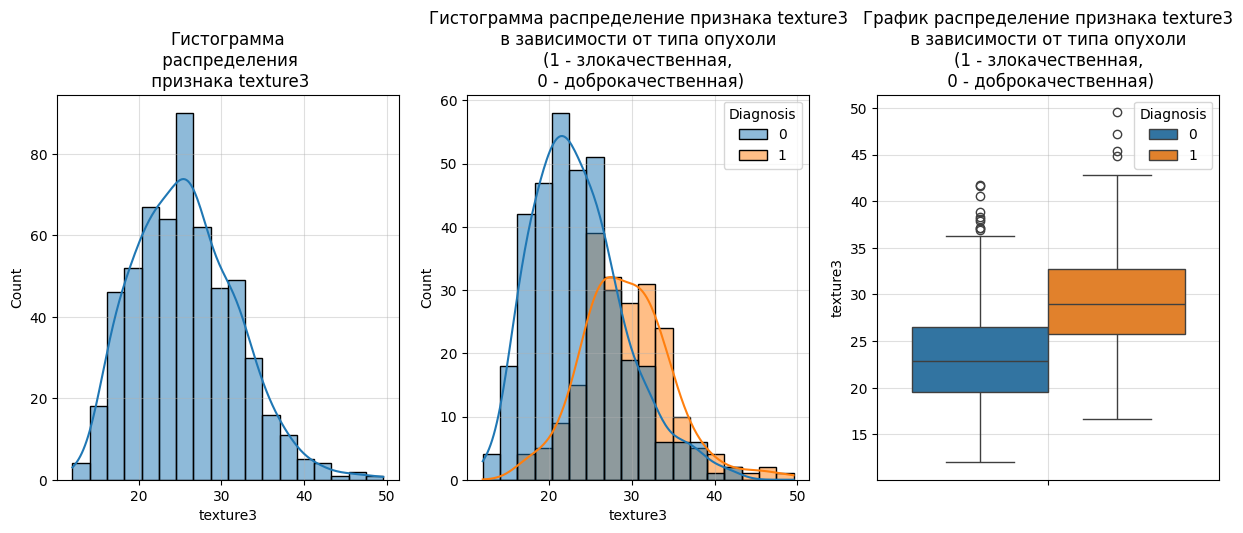

In [184]:
feat_asses_3(data, 'texture1', 'texture2', 'texture3')

- признак texture1: отмечается значительное различие в распределении признака в группах с разными типами новообразований (злокачественных и доброкачественных), поэтому признак может быть важен для предсказания - отмечается тенденция к бОльшему значению признака в группах со злокачественным новообразованием. Есть выбросы.

- распределение признака texture2 напоминает логнормальное, кроме того, нет разницы в распределении признака в зависимости от таргетной переменной, медианы в обеих группок на графиках боксплот совпадают. Это может указывать на отсуствие влияние на предсказание, поэтому данный признак можно удалить. 
- texture3: отмечается значительное различие в распределении признака в группах с разными типами новообразований (злокачественных и доброкачественных), - отмечается тенденция к бОльшему значению признака в группах со злокачественным новообразованием, есть выбросы в обеих группах выше верхней границы боксплота.

In [185]:
# удалим признак testure2, для датасета data_out
data_out.drop('texture2', axis = 1, inplace = True)
data_out.columns

Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'perimeter2', 'area2', 'smoothness2',
       'compactness2', 'concavity2', 'concave_points2', 'symmetry2',
       'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3',
       'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3', 'Diagnosis'],
      dtype='object')

___
- **оценим признаки texture 'perimeter1', 'perimeter2', 'perimeter3'**

Описательная статистика для переменной perimeter1:


count    569.000000
mean      91.969033
std       24.298981
min       43.790000
25%       75.170000
50%       86.240000
75%      104.100000
max      188.500000
Name: perimeter1, dtype: float64

Описательная статистика  для переменной perimeter1 в зависимости от диагноза:


count        mean        std    min     25%     50%      75%    max
Diagnosis                                                                     
0          357.0   78.075406  11.807438  43.79  70.870   78.18   86.100  114.6
1          212.0  115.365377  21.854653  71.90  98.745  114.20  129.925  188.5

Описательная статистика для переменной perimeter2:


count    569.000000
mean       2.866059
std        2.021855
min        0.757000
25%        1.606000
50%        2.287000
75%        3.357000
max       21.980000
Name: perimeter2, dtype: float64

Описательная статистика  для переменной perimeter2 в зависимости от диагноза:


count      mean       std    min     25%     50%      75%     max
Diagnosis                                                                   
0          357.0  2.000321  0.771169  0.757  1.4450  1.8510  2.38800   5.118
1          212.0  4.323929  2.568546  1.334  2.7155  3.6795  5.20625  21.980

Описательная статистика для переменной perimeter3:


count    569.000000
mean     107.261213
std       33.602542
min       50.410000
25%       84.110000
50%       97.660000
75%      125.400000
max      251.200000
Name: perimeter3, dtype: float64

Описательная статистика  для переменной perimeter3 в зависимости от диагноза:


count        mean        std    min      25%     50%     75%    max
Diagnosis                                                                     
0          357.0   87.005938  13.527091  50.41   78.270   86.92   96.59  127.1
1          212.0  141.370330  29.457055  85.10  119.325  138.00  159.80  251.2

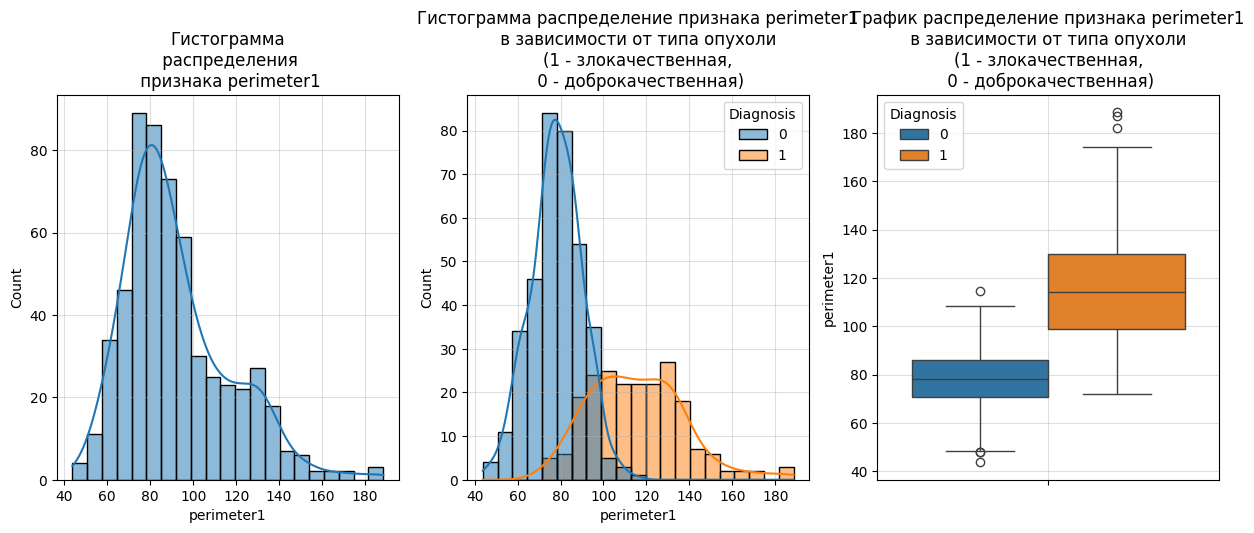

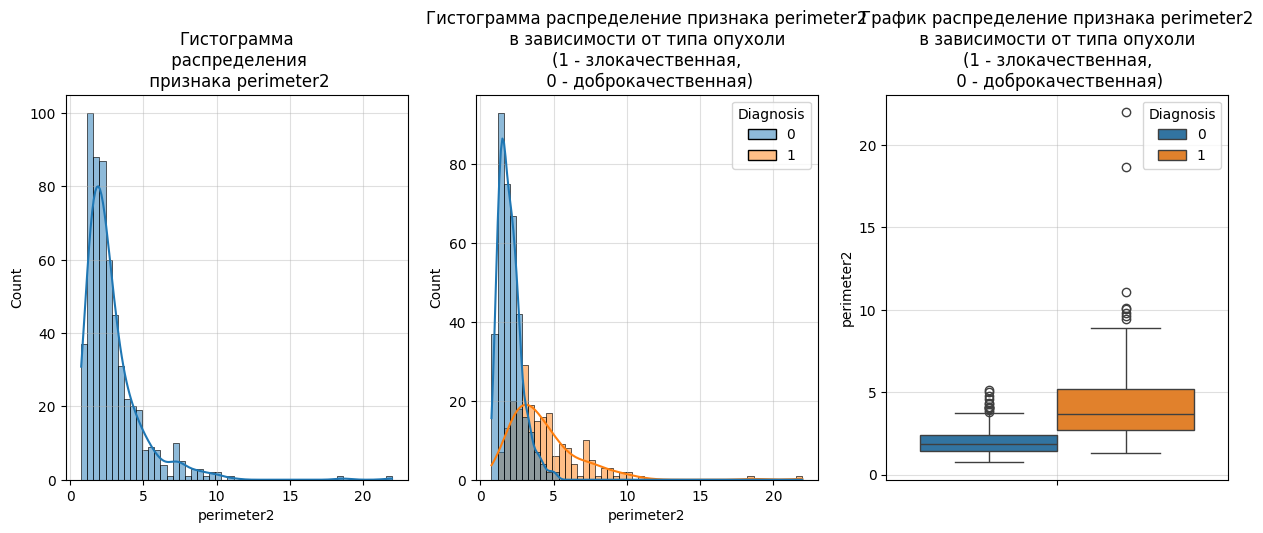

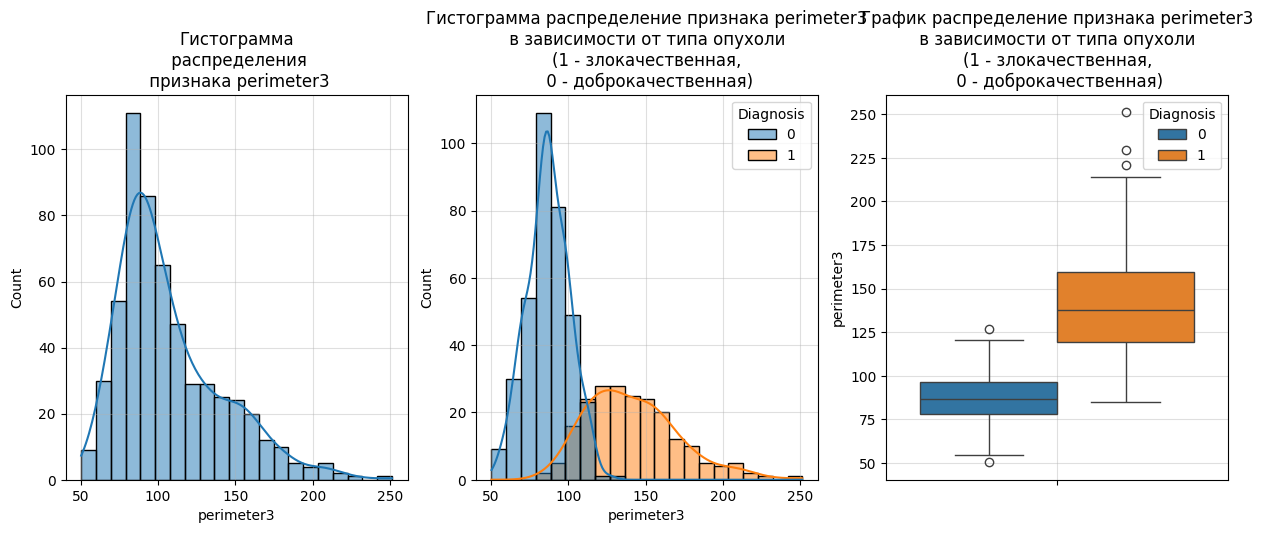

In [186]:
feat_asses_3(data, 'perimeter1', 'perimeter2', 'perimeter3')

- признак perimeter1: отмечается значительное различие в распределении признака в группах с разными типами новообразований (злокачественных и доброкачественных), поэтому признак может быть важен для предсказания - отмечается тенденция к бОльшему значению признака в группах со злокачественным новообразованием. Есть выбросы.
- признак perimeter2: распределение признака напоминает логнормальное, есть выбросы, которые сложно оценивать, т.к. распределение признака не нормальное. произведем логарифмирование признака и оценим выбросы.
- признак perimeter3: отмечается значительное различие в распределении признака в группах с разными типами новообразований (злокачественных и доброкачественных), - отмечается тенденция к бОльшему значению признака в группах со злокачественным новообразованием, есть выбросы в обеих группах.

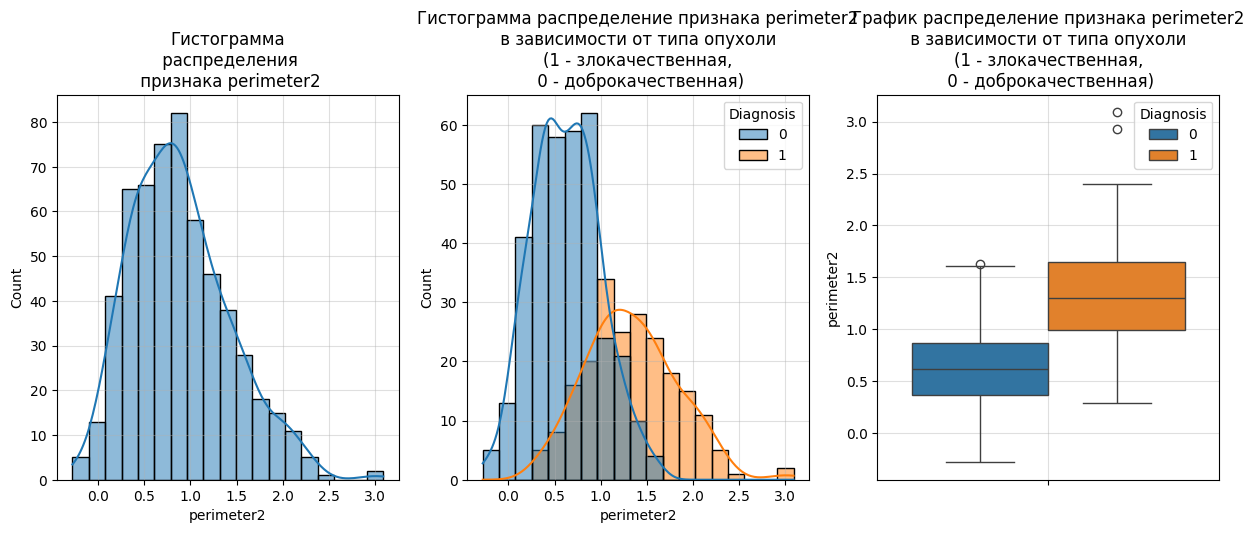

In [187]:
# логарифмируем признак и оценим распределение. 
# данные изменения произодим не с основым датасетом, а с data_out

data_out['perimeter2'] = round(np.log(data_out['perimeter2']),3)
fig, axes = plt.subplots(1, 3, figsize = (15,5))
sns.histplot(data_out['perimeter2'], kde= True, ax = axes[0])
axes[0].set_title(f'Гистограмма\n распределения\n признака {"perimeter2"}')
axes[0].grid(alpha=0.4)
sns.histplot(x = data_out['perimeter2'],  hue = data_out['Diagnosis'], kde= True, ax = axes[1])
axes[1].set_title(f'Гистограмма распределение признака {"perimeter2"}\n в зависимости от типа опухоли \n(1 - злокачественная,\n 0 - доброкачественная)')
axes[1].grid(alpha=0.4)
sns.boxplot(y = data_out['perimeter2'],  hue = data_out['Diagnosis'],ax = axes[2])
axes[2].set_title(f'График распределение признака {"perimeter2"}\n в зависимости от типа опухоли \n(1 - злокачественная,\n 0 - доброкачественная)')
# axes[2].set_xlabel('CKD')
axes[2].grid(alpha=0.4)

Распределение признака стало близким к нормальному, количество выбросов значительно уменьшилось.

___
- **оценим признаки texture 'area1', 'area2', 'area3'**

Описательная статистика для переменной area1:


count     569.000000
mean      654.889104
std       351.914129
min       143.500000
25%       420.300000
50%       551.100000
75%       782.700000
max      2501.000000
Name: area1, dtype: float64

Описательная статистика  для переменной area1 в зависимости от диагноза:


count        mean         std    min    25%    50%      75%     max
Diagnosis                                                                     
0          357.0  462.790196  134.287118  143.5  378.2  458.4   551.10   992.1
1          212.0  978.376415  367.937978  361.6  705.3  932.0  1203.75  2501.0

Описательная статистика для переменной area2:


count    569.000000
mean      40.337079
std       45.491006
min        6.802000
25%       17.850000
50%       24.530000
75%       45.190000
max      542.200000
Name: area2, dtype: float64

Описательная статистика  для переменной area2 в зависимости от диагноза:


count       mean        std     min      25%     50%    75%     max
Diagnosis                                                                     
0          357.0  21.135148   8.843472   6.802  15.2600  19.630  25.03   77.11
1          212.0  72.672406  61.355268  13.990  35.7625  58.455  94.00  542.20

Описательная статистика для переменной area3:


count     569.000000
mean      880.583128
std       569.356993
min       185.200000
25%       515.300000
50%       686.500000
75%      1084.000000
max      4254.000000
Name: area3, dtype: float64

Описательная статистика  для переменной area3 в зависимости от диагноза:


count         mean         std    min    25%     50%      75%  \
Diagnosis                                                                  
0          357.0   558.899440  163.601424  185.2  447.1   547.4   670.00   
1          212.0  1422.286321  597.967743  508.1  970.3  1303.0  1712.75   

              max  
Diagnosis          
0          1210.0  
1          4254.0

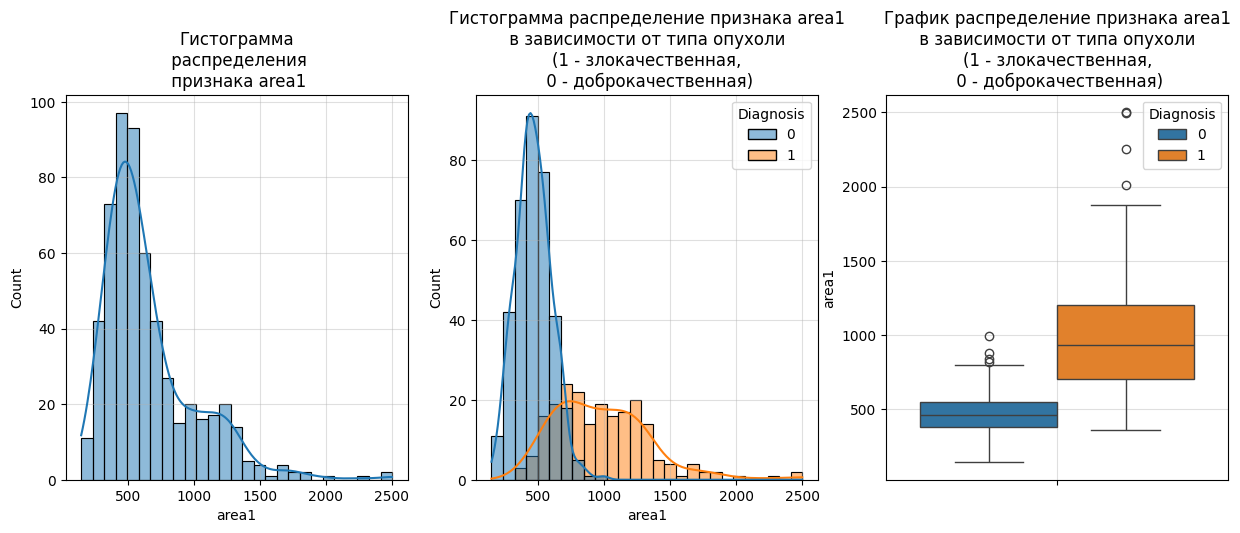

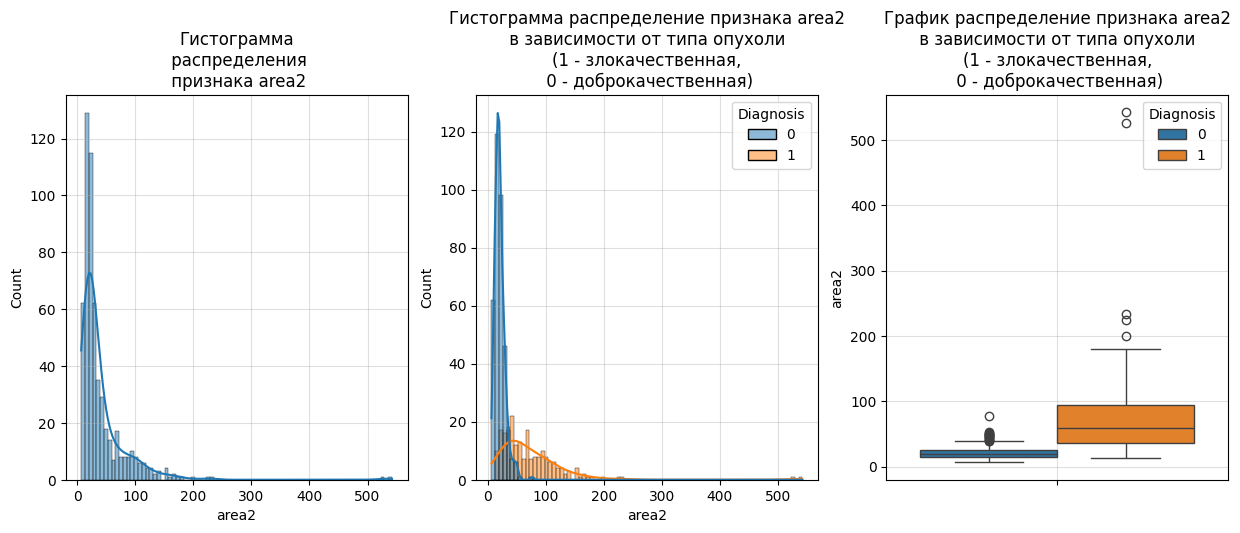

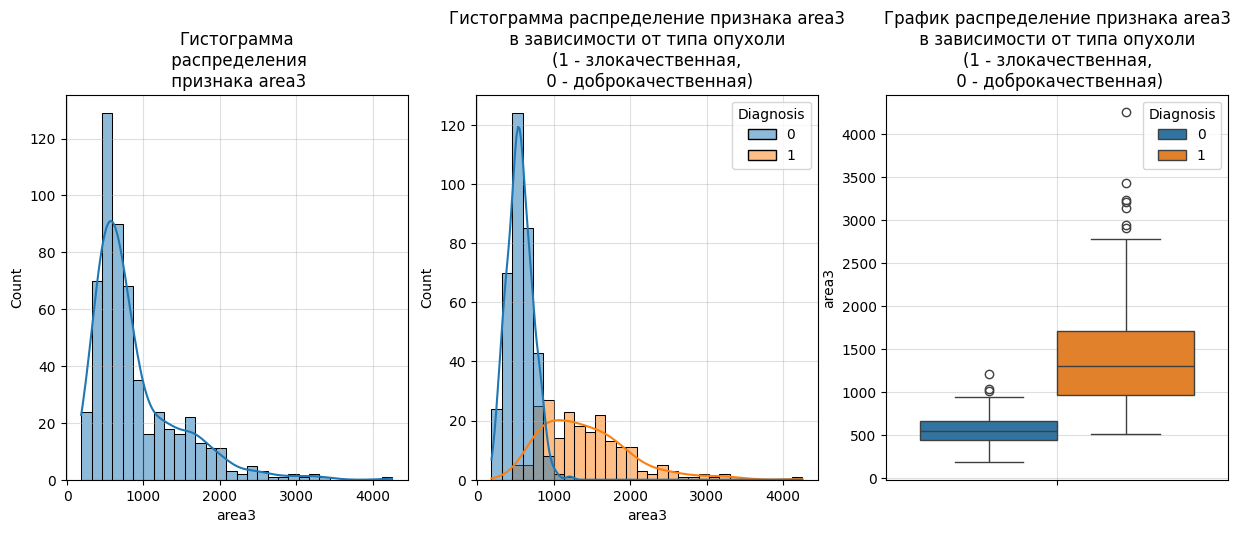

In [188]:
feat_asses_3(data, 'area1', 'area2', 'area3')

- признак area1: отмечается значительное различие в распределении признака в группах с разными типами новообразований (злокачественных и доброкачественных), поэтому признак может быть важен для предсказания - отмечается тенденция к бОльшему значению признака в группах со злокачественным новообразованием. Есть выбросы.
- признак area2: распределение признака напоминает логнормальное, есть выбросы, которые сложно оценивать, т.к. распределение признака не нормальное. произведем логарифмирование признака и оценим выбросы.
- признак area3: отмечается значительное различие в распределении признака в группах с разными типами новообразований (злокачественных и доброкачественных), - отмечается тенденция к бОльшему значению признака в группах со злокачественным новообразованием, есть выбросы в обеих группах.

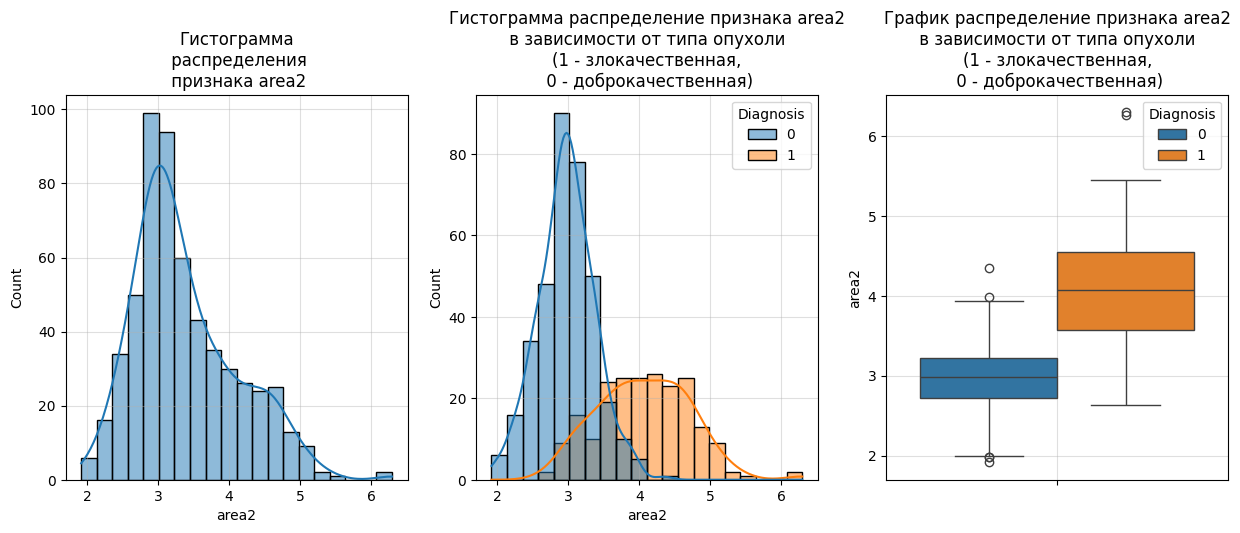

In [189]:
# произведем логарифмирование признака area2, оценим характер распределения и выбросы
# изменения будем производить в датасете data_out
data_out['area2'] = round(np.log(data_out['area2']),3)
fig, axes = plt.subplots(1, 3, figsize = (15,5))
sns.histplot(data_out['area2'], kde= True, ax = axes[0])
axes[0].set_title(f'Гистограмма\n распределения\n признака {"area2"}')
axes[0].grid(alpha=0.4)
sns.histplot(x = data_out['area2'],  hue = data_out['Diagnosis'], kde= True, ax = axes[1])
axes[1].set_title(f'Гистограмма распределение признака {"area2"}\n в зависимости от типа опухоли \n(1 - злокачественная,\n 0 - доброкачественная)')
axes[1].grid(alpha=0.4)
sns.boxplot(y = data_out['area2'],  hue = data_out['Diagnosis'],ax = axes[2])
axes[2].set_title(f'График распределение признака {"area2"}\n в зависимости от типа опухоли \n(1 - злокачественная,\n 0 - доброкачественная)')
axes[2].grid(alpha=0.4)

Распределение признака в обеих группах близко к нормальному, сохраняются незначительное количество выбросов.

___
- **оценим признаки texture 'smoothness1', 'smoothness2', 'smoothness3'**

Описательная статистика для переменной smoothness1:


count    569.000000
mean       0.096360
std        0.014064
min        0.052630
25%        0.086370
50%        0.095870
75%        0.105300
max        0.163400
Name: smoothness1, dtype: float64

Описательная статистика  для переменной smoothness1 в зависимости от диагноза:


count      mean       std      min      25%      50%       75%  \
Diagnosis                                                                   
0          357.0  0.092478  0.013446  0.05263  0.08306  0.09076  0.100700   
1          212.0  0.102898  0.012608  0.07371  0.09401  0.10220  0.110925   

              max  
Diagnosis          
0          0.1634  
1          0.1447

Описательная статистика для переменной smoothness2:


count    569.000000
mean       0.007041
std        0.003003
min        0.001713
25%        0.005169
50%        0.006380
75%        0.008146
max        0.031130
Name: smoothness2, dtype: float64

Описательная статистика  для переменной smoothness2 в зависимости от диагноза:


count      mean       std       min       25%       50%       75%  \
Diagnosis                                                                      
0          357.0  0.007196  0.003061  0.001713  0.005212  0.006530  0.008534   
1          212.0  0.006780  0.002890  0.002667  0.005085  0.006209  0.007971   

               max  
Diagnosis           
0          0.02177  
1          0.03113

Описательная статистика для переменной smoothness3:


count    569.000000
mean       0.132369
std        0.022832
min        0.071170
25%        0.116600
50%        0.131300
75%        0.146000
max        0.222600
Name: smoothness3, dtype: float64

Описательная статистика  для переменной smoothness3 в зависимости от диагноза:


count      mean       std      min       25%      50%       75%  \
Diagnosis                                                                    
0          357.0  0.124959  0.020013  0.07117  0.110400  0.12540  0.137600   
1          212.0  0.144845  0.021870  0.08822  0.130475  0.14345  0.155975   

              max  
Diagnosis          
0          0.2006  
1          0.2226

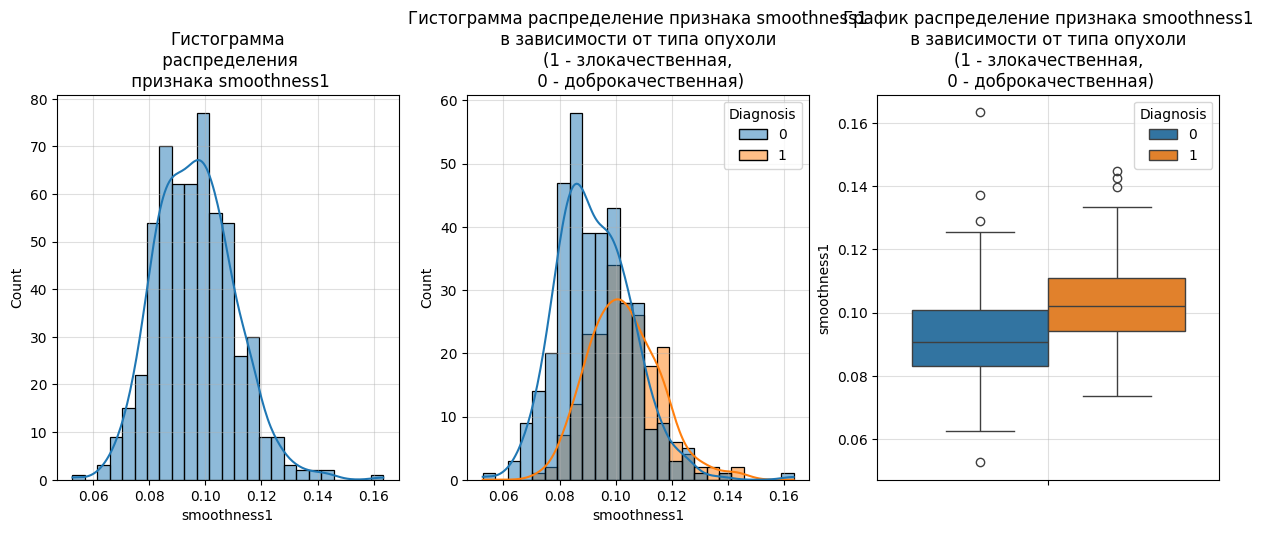

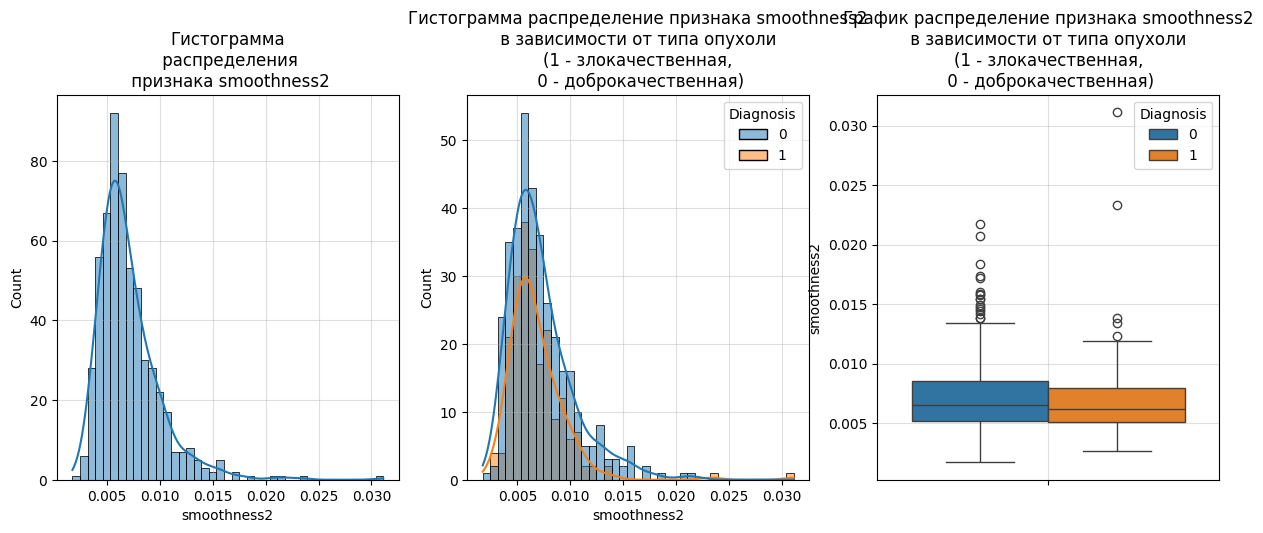

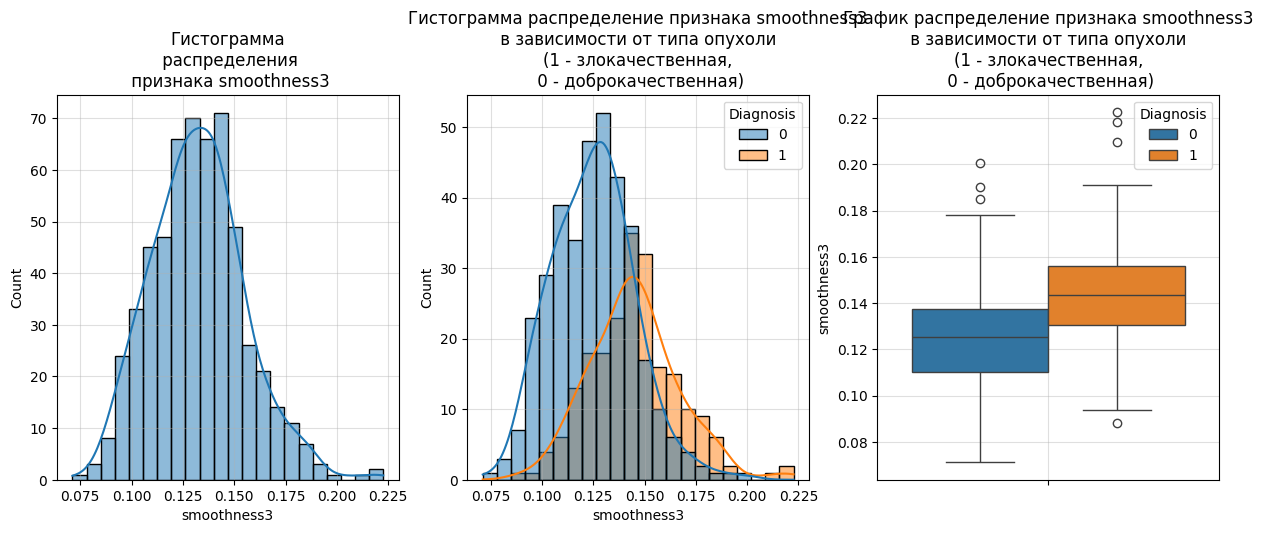

In [190]:
feat_asses_3(data, 'smoothness1', 'smoothness2', 'smoothness3')

- признак 'smoothness1': отмечается различие в распределении признака в группах с разными типами новообразований (злокачественных и доброкачественных), поэтому признак может быть важен для предсказания - отмечается тенденция к бОльшему значению признака в группах со злокачественным новообразованием. Есть выбросы.
- признак 'smoothness2': распределение признака напоминает логнормальное, есть выбросы, распределение признака в обеих группах одинаковое (медианы совпадают), что может говорить о неважности данного признака для предсказания. удалим его. 
- признак 'smoothness3': отмечается значительное различие в распределении признака в группах с разными типами новообразований (злокачественных и доброкачественных), - отмечается тенденция к бОльшему значению признака в группах со злокачественным новообразованием, есть выбросы в обеих группах.

In [191]:
# удалим признак 'smoothness2', используем датасет data_out

data_out.drop('smoothness2', axis = 1, inplace = True)
data_out.columns


Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'perimeter2', 'area2', 'compactness2',
       'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2',
       'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3',
       'compactness3', 'concavity3', 'concave_points3', 'symmetry3',
       'fractal_dimension3', 'Diagnosis'],
      dtype='object')

___
- **оценим признаки texture 'compactness1', 'compactness2', 'compactness3'**

Описательная статистика для переменной compactness1:


count    569.000000
mean       0.104341
std        0.052813
min        0.019380
25%        0.064920
50%        0.092630
75%        0.130400
max        0.345400
Name: compactness1, dtype: float64

Описательная статистика  для переменной compactness1 в зависимости от диагноза:


count      mean       std      min      25%      50%      75%  \
Diagnosis                                                                  
0          357.0  0.080085  0.033750  0.01938  0.05562  0.07529  0.09755   
1          212.0  0.145188  0.053987  0.04605  0.10960  0.13235  0.17240   

              max  
Diagnosis          
0          0.2239  
1          0.3454

Описательная статистика для переменной compactness2:


count    569.000000
mean       0.025478
std        0.017908
min        0.002252
25%        0.013080
50%        0.020450
75%        0.032450
max        0.135400
Name: compactness2, dtype: float64

Описательная статистика  для переменной compactness2 в зависимости от диагноза:


count      mean       std       min       25%      50%      75%  \
Diagnosis                                                                    
0          357.0  0.021438  0.016352  0.002252  0.011320  0.01631  0.02589   
1          212.0  0.032281  0.018387  0.008422  0.019662  0.02859  0.03891   

              max  
Diagnosis          
0          0.1064  
1          0.1354

Описательная статистика для переменной compactness3:


count    569.000000
mean       0.254265
std        0.157336
min        0.027290
25%        0.147200
50%        0.211900
75%        0.339100
max        1.058000
Name: compactness3, dtype: float64

Описательная статистика  для переменной compactness3 в зависимости от диагноза:


count      mean       std      min       25%      50%      75%  \
Diagnosis                                                                   
0          357.0  0.182673  0.092180  0.02729  0.112000  0.16980  0.23020   
1          212.0  0.374824  0.170372  0.05131  0.244475  0.35635  0.44785   

              max  
Diagnosis          
0          0.5849  
1          1.0580

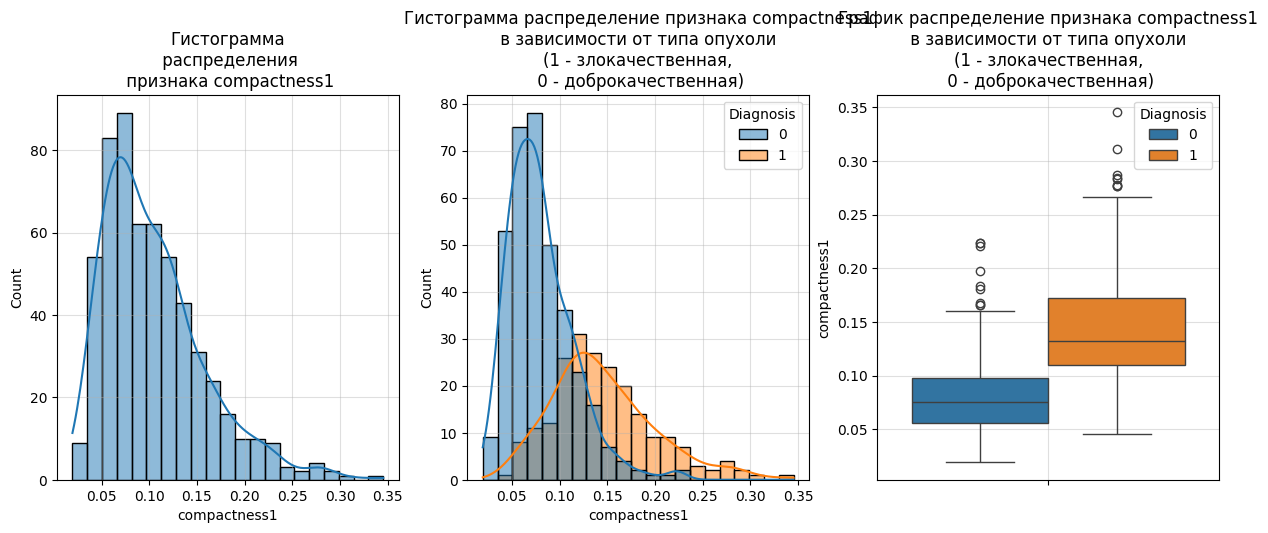

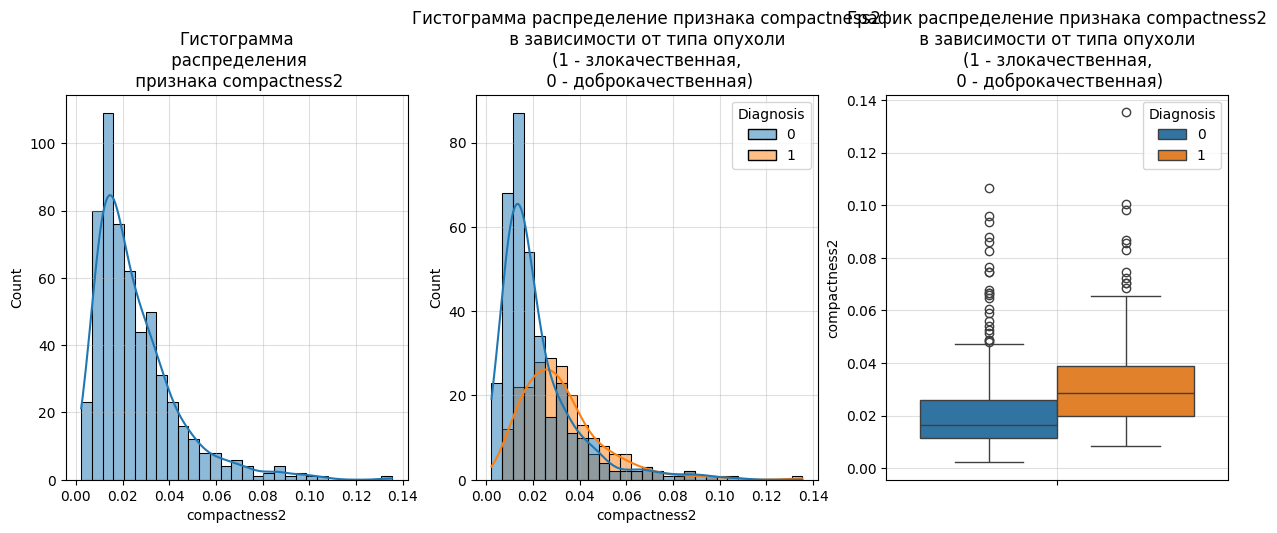

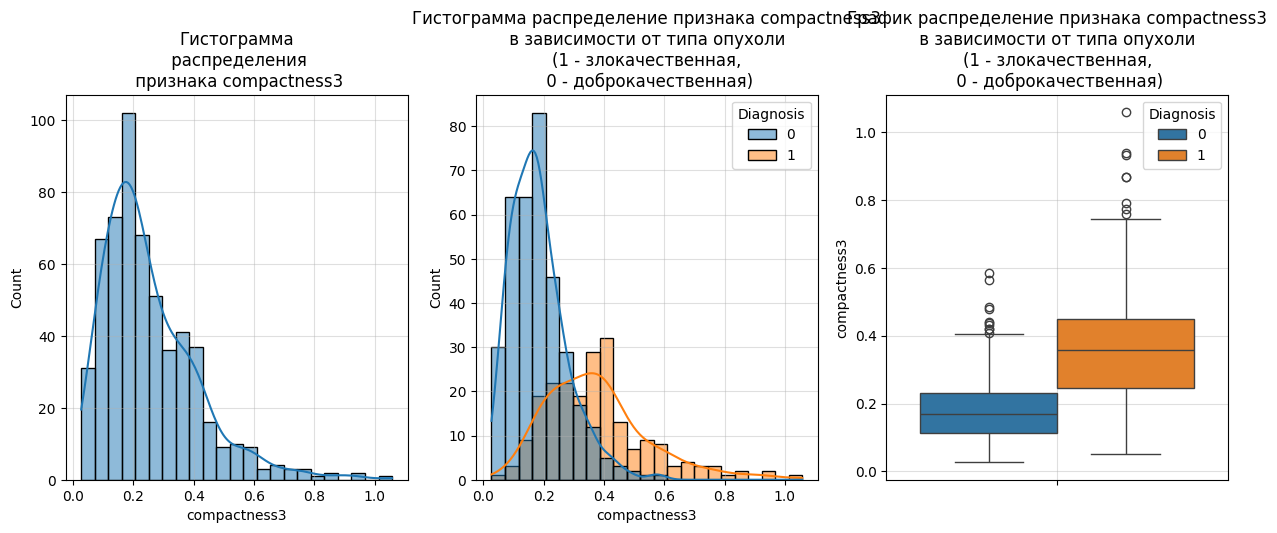

In [192]:
feat_asses_3(data, 'compactness1', 'compactness2', 'compactness3')

- признак 'compactness1': отмечается значительное различие в распределении признака в группах с разными типами новообразований (злокачественных и доброкачественных), поэтому признак может быть важен для предсказания - отмечается тенденция к бОльшему значению признака в группах со злокачественным новообразованием. Есть выбросы.
- признак 'compactness2': распределение признака напоминает логнормальное, есть выбросы, которые сложно оценивать, т.к. распределение признака не нормальное. произведем логарифмирование признака и оценим выбросы.
- признак 'compactness3': отмечается значительное различие в распределении признака в группах с разными типами новообразований (злокачественных и доброкачественных), - отмечается тенденция к бОльшему значению признака в группах со злокачественным новообразованием, есть выбросы в обеих группах.

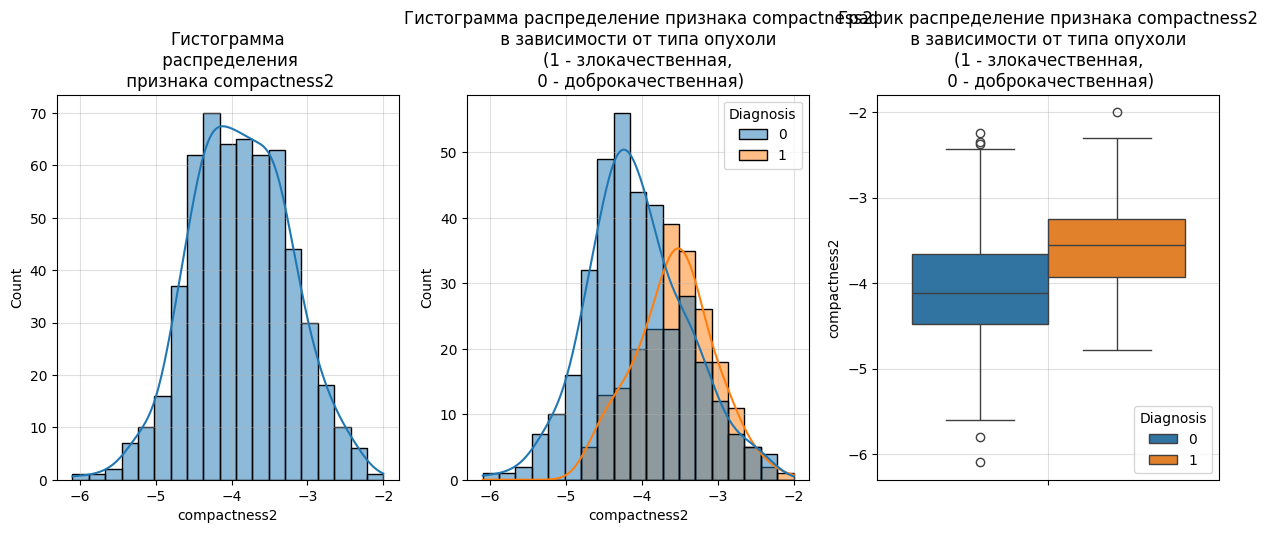

In [193]:
# Логарифмируем признак 'compactness2' и посмотрим распределение признака, будем использовать датасет data_out

data_out['compactness2'] = round(np.log(data_out['compactness2']),3)
fig, axes = plt.subplots(1, 3, figsize = (15,5))
sns.histplot(data_out['compactness2'], kde= True, ax = axes[0])
axes[0].set_title(f'Гистограмма\n распределения\n признака {"compactness2"}')
axes[0].grid(alpha=0.4)
sns.histplot(x = data_out['compactness2'],  hue = data_out['Diagnosis'], kde= True, ax = axes[1])
axes[1].set_title(f'Гистограмма распределение признака {"compactness2"}\n в зависимости от типа опухоли \n(1 - злокачественная,\n 0 - доброкачественная)')
axes[1].grid(alpha=0.4)
sns.boxplot(y = data_out['compactness2'],  hue = data_out['Diagnosis'],ax = axes[2])
axes[2].set_title(f'График распределение признака {"compactness2"}\n в зависимости от типа опухоли \n(1 - злокачественная,\n 0 - доброкачественная)')
axes[2].grid(alpha=0.4)

Выбросов стало меньше.

___
- **оценим признаки texture 'concavity1', 'concavity2', 'concavity3'**

Описательная статистика для переменной concavity1:


count    569.000000
mean       0.088799
std        0.079720
min        0.000000
25%        0.029560
50%        0.061540
75%        0.130700
max        0.426800
Name: concavity1, dtype: float64

Описательная статистика  для переменной concavity1 в зависимости от диагноза:


count      mean       std      min       25%      50%      75%  \
Diagnosis                                                                   
0          357.0  0.046058  0.043442  0.00000  0.020310  0.03709  0.05999   
1          212.0  0.160775  0.075019  0.02398  0.109525  0.15135  0.20305   

              max  
Diagnosis          
0          0.4108  
1          0.4268

Описательная статистика для переменной concavity2:


count    569.000000
mean       0.031894
std        0.030186
min        0.000000
25%        0.015090
50%        0.025890
75%        0.042050
max        0.396000
Name: concavity2, dtype: float64

Описательная статистика  для переменной concavity2 в зависимости от диагноза:


count      mean       std      min       25%       50%       75%  \
Diagnosis                                                                     
0          357.0  0.025997  0.032918  0.00000  0.010990  0.018400  0.030560   
1          212.0  0.041824  0.021603  0.01101  0.026998  0.037125  0.050443   

              max  
Diagnosis          
0          0.3960  
1          0.1438

Описательная статистика для переменной concavity3:


count    569.000000
mean       0.272188
std        0.208624
min        0.000000
25%        0.114500
50%        0.226700
75%        0.382900
max        1.252000
Name: concavity3, dtype: float64

Описательная статистика  для переменной concavity3 в зависимости от диагноза:


count      mean       std      min       25%     50%       75%  \
Diagnosis                                                                   
0          357.0  0.166238  0.140368  0.00000  0.077080  0.1412  0.221600   
1          212.0  0.450606  0.181507  0.02398  0.326425  0.4049  0.556175   

             max  
Diagnosis         
0          1.252  
1          1.170

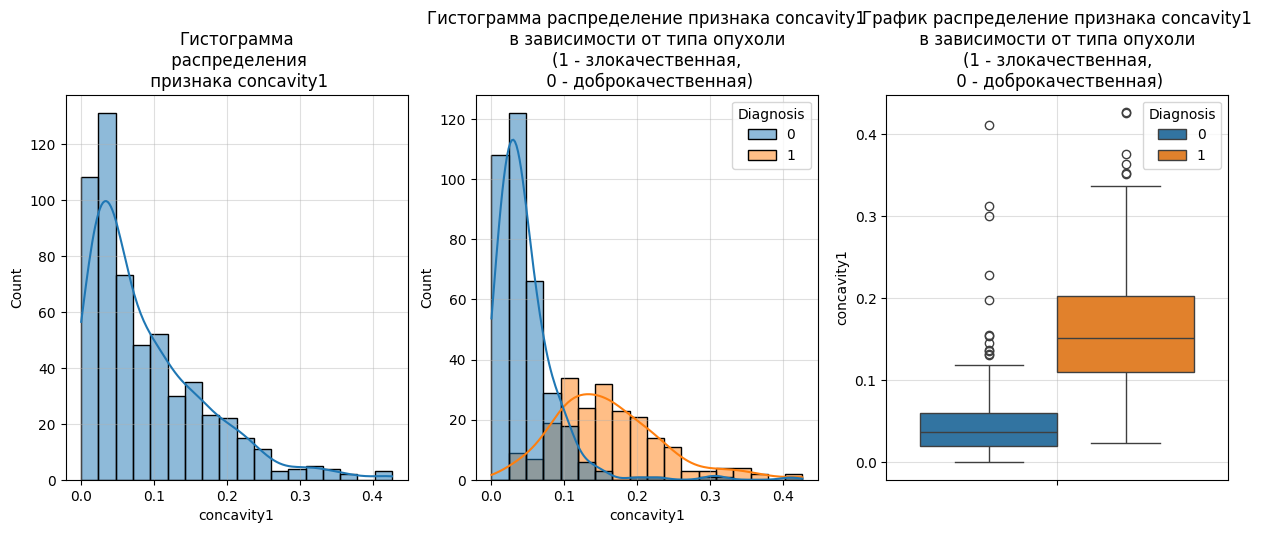

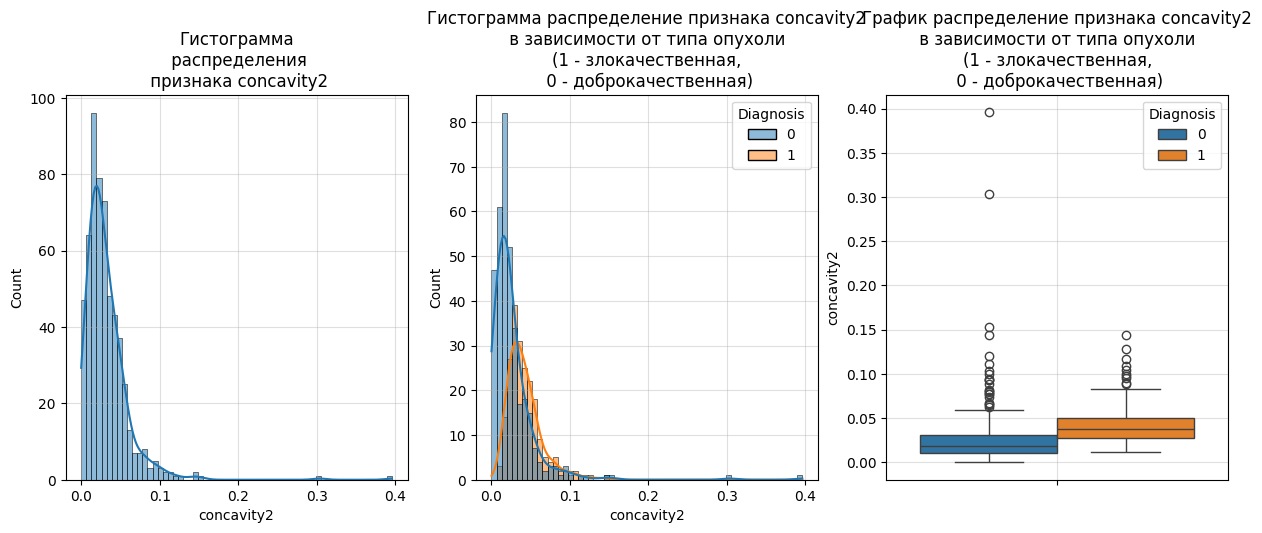

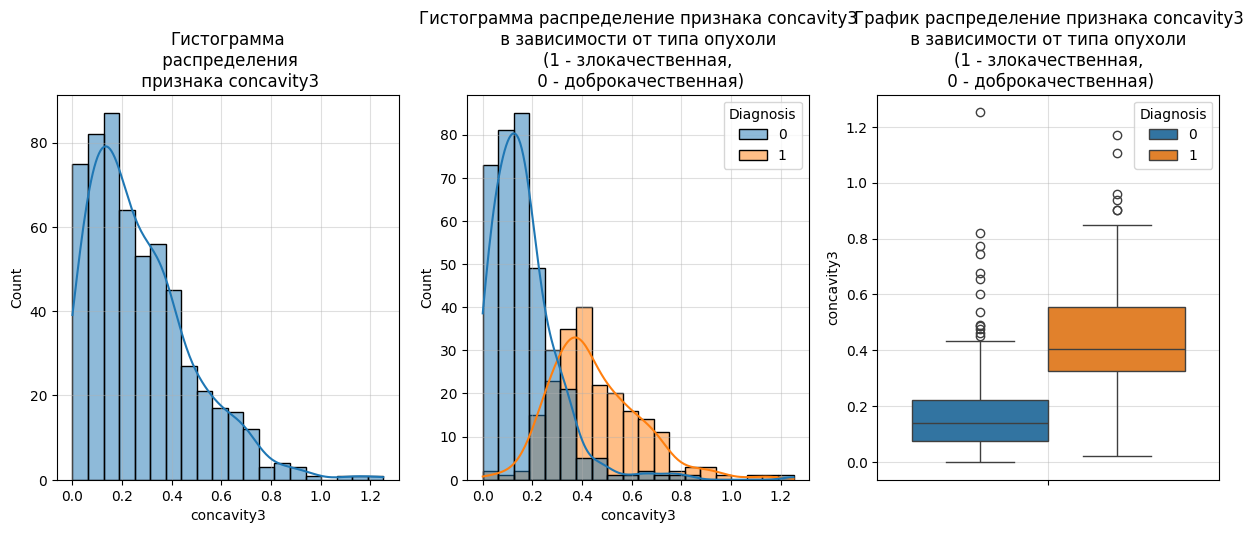

In [194]:
feat_asses_3(data, 'concavity1', 'concavity2', 'concavity3')

- признак concavity1: отмечается значительное различие в распределении признака в группах с разными типами новообразований (злокачественных и доброкачественных), поэтому признак может быть важен для предсказания - отмечается тенденция к бОльшему значению признака в группах со злокачественным новообразованием. Есть выбросы.
- признак concavity2: распределение признака напоминает логнормальное, есть выбросы, которые сложно оценивать, т.к. распределение признака не нормальное. произведем логарифмирование признака и оценим выбросы.
- признак concavity3: отмечается значительное различие в распределении признака в группах с разными типами новообразований (злокачественных и доброкачественных), - отмечается тенденция к бОльшему значению признака в группах со злокачественным новообразованием, есть выбросы в обеих группах.

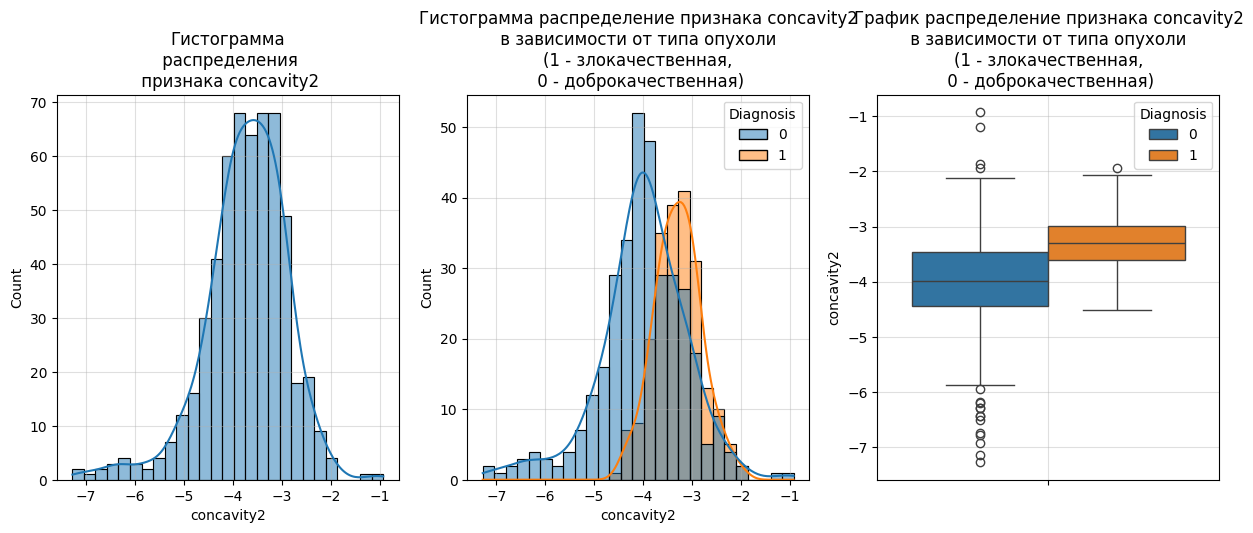

In [195]:
# Логарифмируем признак 'compactness2' и посмотрим распределение признака, будем использовать датасет data_out

data_out['concavity2'] = round(np.log(data_out['concavity2']),3)
fig, axes = plt.subplots(1, 3, figsize = (15,5))
sns.histplot(data_out['concavity2'], kde= True, ax = axes[0])
axes[0].set_title(f'Гистограмма\n распределения\n признака {"concavity2"}')
axes[0].grid(alpha=0.4)
sns.histplot(x = data_out['concavity2'],  hue = data_out['Diagnosis'], kde= True, ax = axes[1])
axes[1].set_title(f'Гистограмма распределение признака {"concavity2"}\n в зависимости от типа опухоли \n(1 - злокачественная,\n 0 - доброкачественная)')
axes[1].grid(alpha=0.4)
sns.boxplot(y = data_out['concavity2'],  hue = data_out['Diagnosis'],ax = axes[2])
axes[2].set_title(f'График распределение признака {"concavity2"}\n в зависимости от типа опухоли \n(1 - злокачественная,\n 0 - доброкачественная)')
axes[2].grid(alpha=0.4)

После логарифмирования, выбросы в группе со злокачественным образованием почти исчезли, выбросы в группе с доброкачественным образованием сохранились.

___
- **оценим признаки texture 'concave_points1', 'concave_points2', 'concave_points3'**

Описательная статистика для переменной concave_points1:


count    569.000000
mean       0.048919
std        0.038803
min        0.000000
25%        0.020310
50%        0.033500
75%        0.074000
max        0.201200
Name: concave_points1, dtype: float64

Описательная статистика  для переменной concave_points1 в зависимости от диагноза:


count      mean       std      min      25%      50%       75%  \
Diagnosis                                                                   
0          357.0  0.025717  0.015909  0.00000  0.01502  0.02344  0.032510   
1          212.0  0.087990  0.034374  0.02031  0.06462  0.08628  0.103175   

               max  
Diagnosis           
0          0.08534  
1          0.20120

Описательная статистика для переменной concave_points2:


count    569.000000
mean       0.011796
std        0.006170
min        0.000000
25%        0.007638
50%        0.010930
75%        0.014710
max        0.052790
Name: concave_points2, dtype: float64

Описательная статистика  для переменной concave_points2 в зависимости от диагноза:


count      mean       std       min       25%       50%       75%  \
Diagnosis                                                                      
0          357.0  0.009858  0.005709  0.000000  0.006433  0.009061  0.011870   
1          212.0  0.015060  0.005517  0.005174  0.011415  0.014205  0.017497   

               max  
Diagnosis           
0          0.05279  
1          0.04090

Описательная статистика для переменной concave_points3:


count    569.000000
mean       0.114606
std        0.065732
min        0.000000
25%        0.064930
50%        0.099930
75%        0.161400
max        0.291000
Name: concave_points3, dtype: float64

Описательная статистика  для переменной concave_points3 в зависимости от диагноза:


count      mean       std      min      25%      50%       75%  \
Diagnosis                                                                   
0          357.0  0.074444  0.035797  0.00000  0.05104  0.07431  0.097490   
1          212.0  0.182237  0.046308  0.02899  0.15275  0.18200  0.210675   

             max  
Diagnosis         
0          0.175  
1          0.291

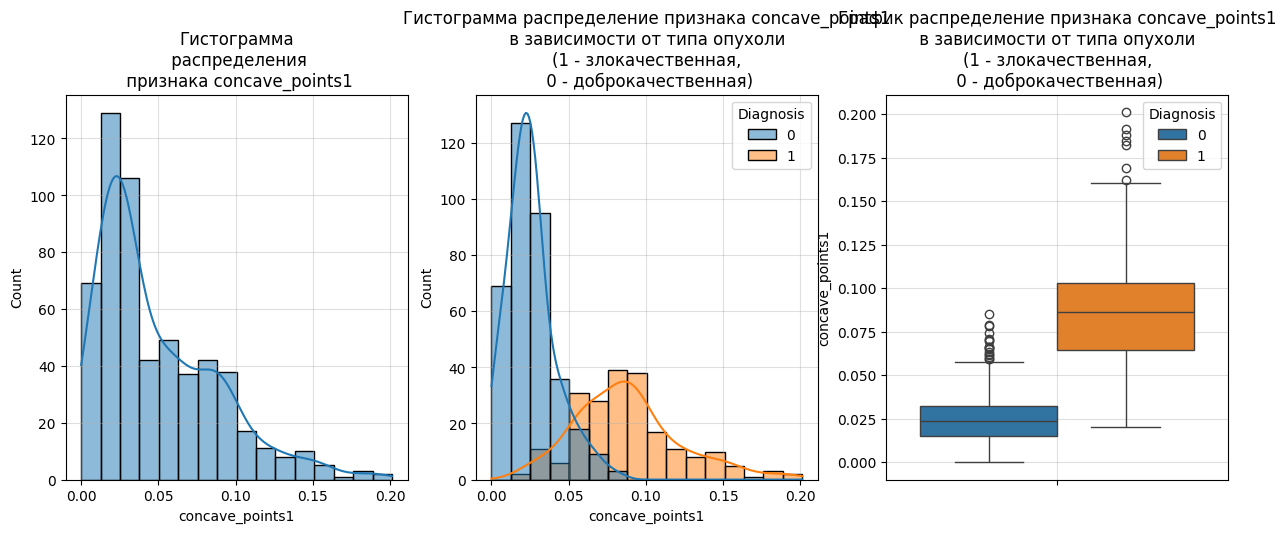

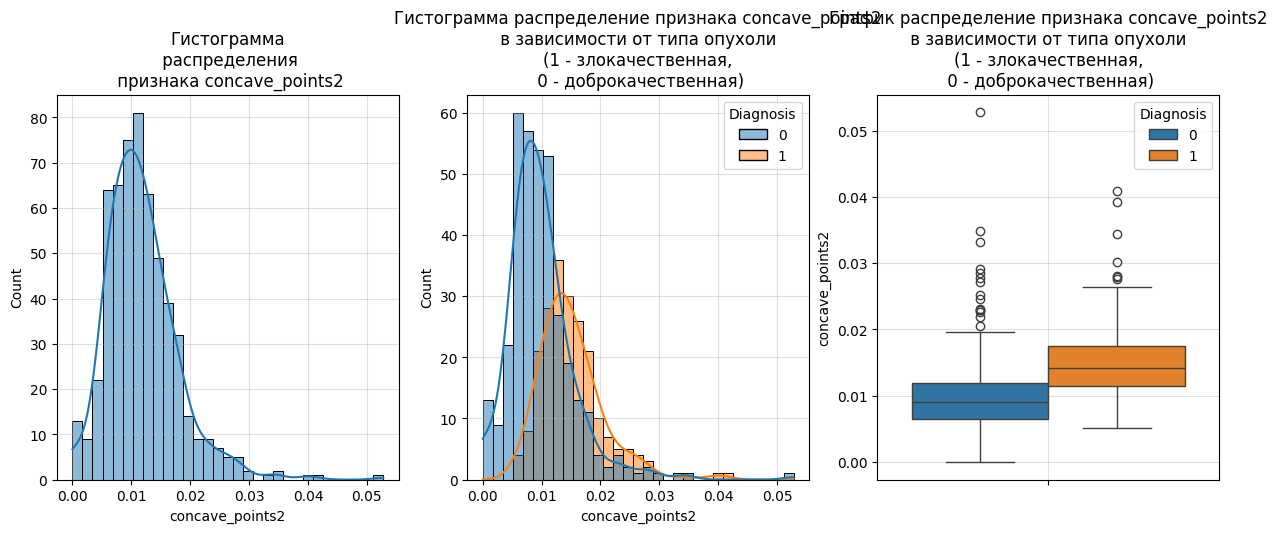

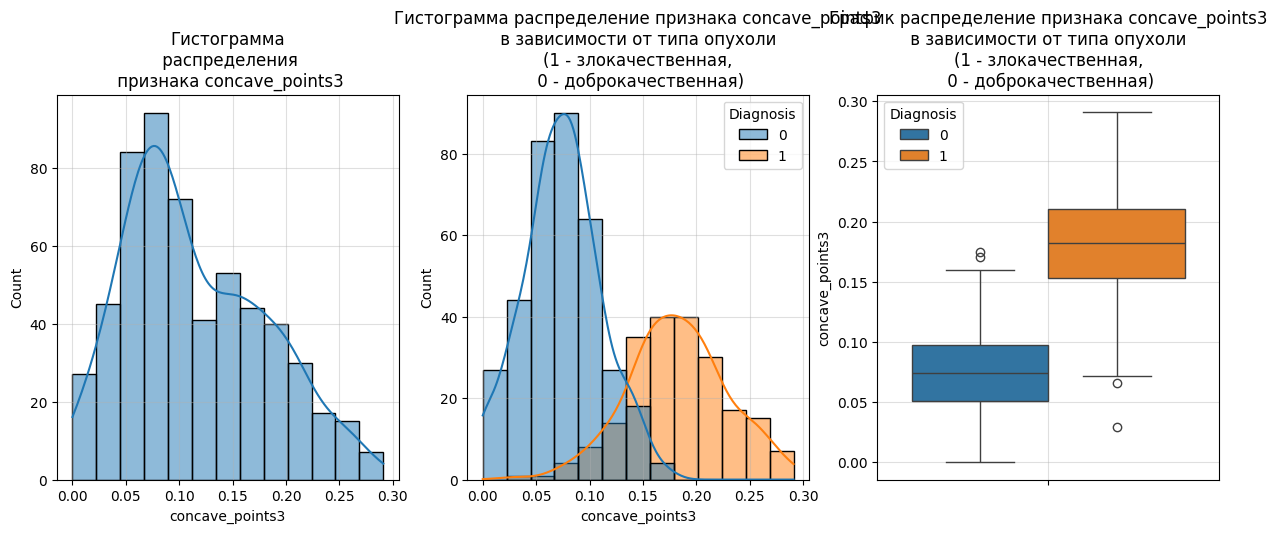

In [196]:
feat_asses_3(data, 'concave_points1', 'concave_points2', 'concave_points3')

- признаки 'concave_points1', 'concave_points2', 'concave_points3': отмечается значительное различие в распределении признака в группах с разными типами новообразований (злокачественных и доброкачественных), поэтому признаки могут быть важны для предсказания - отмечается тенденция к бОльшему значению признаков в группах со злокачественным новообразованием. Есть выбросы.

___
- **оценим признаки texture 'symmetry1','symmetry2','symmetry3'**

Описательная статистика для переменной symmetry1:


count    569.000000
mean       0.181162
std        0.027414
min        0.106000
25%        0.161900
50%        0.179200
75%        0.195700
max        0.304000
Name: symmetry1, dtype: float64

Описательная статистика  для переменной symmetry1 в зависимости от диагноза:


count      mean       std     min      25%     50%      75%     max
Diagnosis                                                                     
0          357.0  0.174186  0.024807  0.1060  0.15800  0.1714  0.18900  0.2743
1          212.0  0.192909  0.027638  0.1308  0.17405  0.1899  0.20985  0.3040

Описательная статистика для переменной symmetry2:


count    569.000000
mean       0.020542
std        0.008266
min        0.007882
25%        0.015160
50%        0.018730
75%        0.023480
max        0.078950
Name: symmetry2, dtype: float64

Описательная статистика  для переменной symmetry2 в зависимости от диагноза:


count      mean       std       min       25%      50%       75%  \
Diagnosis                                                                     
0          357.0  0.020584  0.006999  0.009539  0.015600  0.01909  0.024060   
1          212.0  0.020472  0.010065  0.007882  0.014615  0.01770  0.022132   

               max  
Diagnosis           
0          0.06146  
1          0.07895

Описательная статистика для переменной symmetry3:


count    569.000000
mean       0.290076
std        0.061867
min        0.156500
25%        0.250400
50%        0.282200
75%        0.317900
max        0.663800
Name: symmetry3, dtype: float64

Описательная статистика  для переменной symmetry3 в зависимости от диагноза:


count      mean       std     min     25%     50%       75%     max
Diagnosis                                                                     
0          357.0  0.270246  0.041745  0.1566  0.2406  0.2687  0.298300  0.4228
1          212.0  0.323468  0.074685  0.1565  0.2765  0.3103  0.359225  0.6638

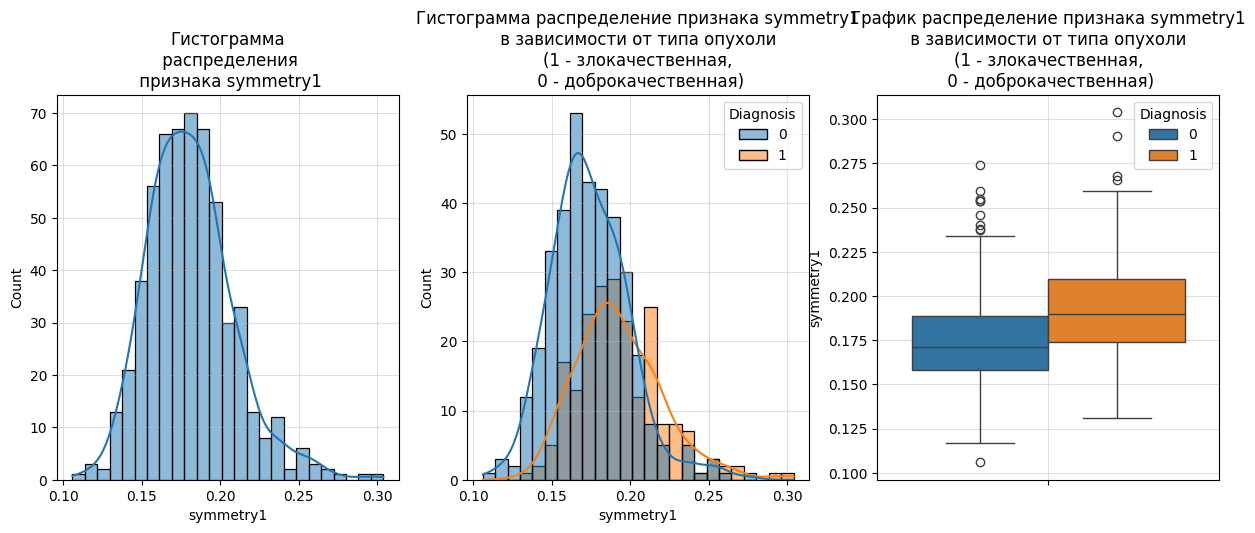

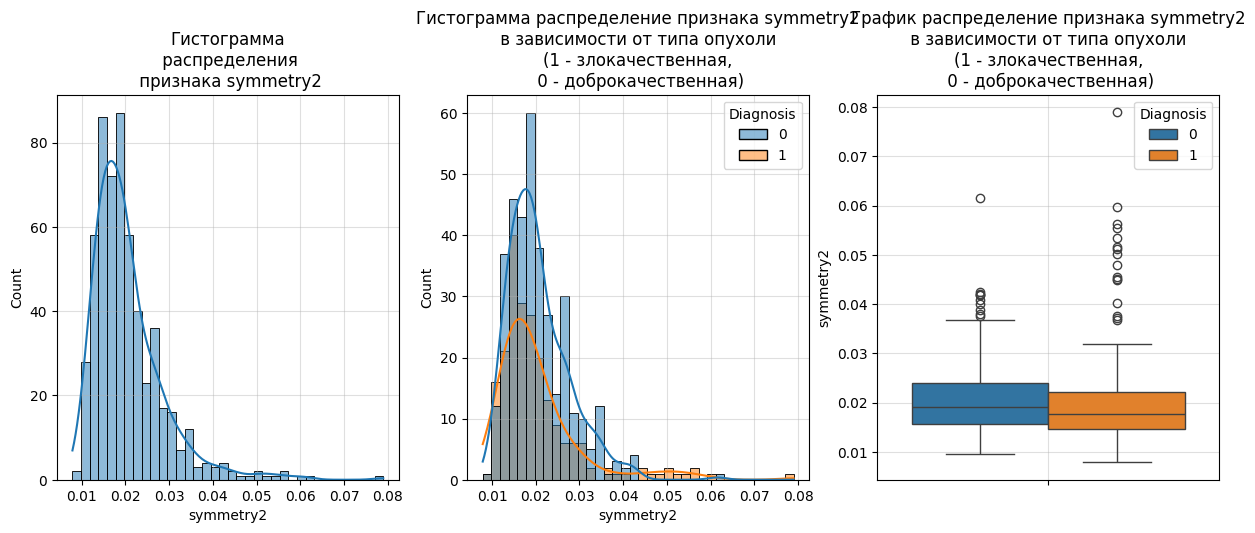

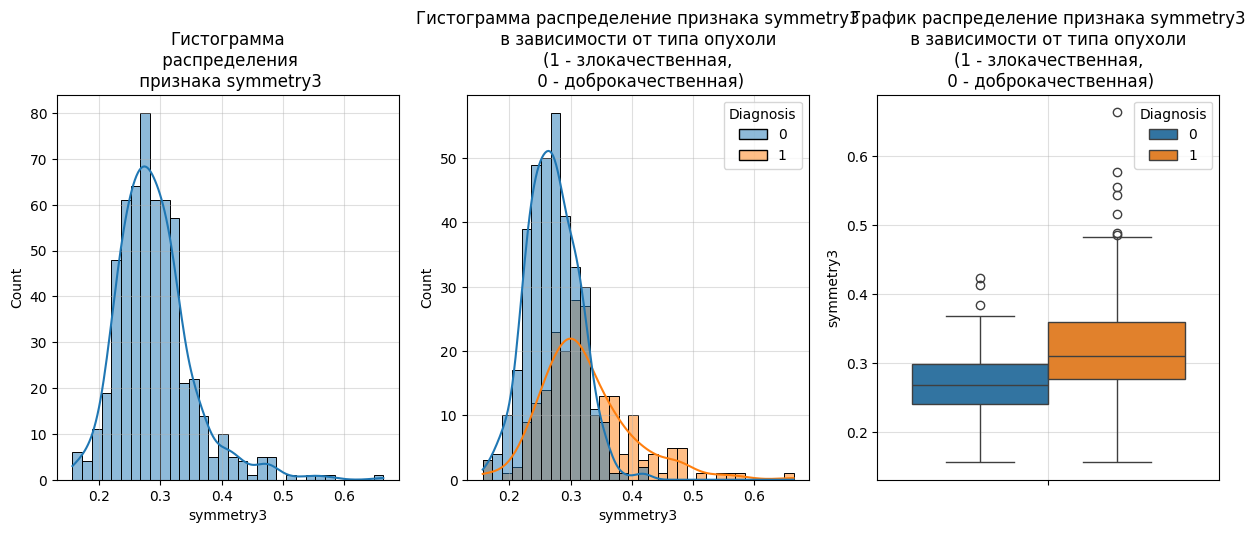

In [197]:
feat_asses_3(data, 'symmetry1','symmetry2','symmetry3')

- признак 'symmetry1': отмечается различие в распределении признака в группах с разными типами новообразований (злокачественных и доброкачественных), признак может быть важен для предсказания - отмечается тенденция к бОльшему значению признака в группах со злокачественным новообразованием. Есть выбросы.
- признак 'symmetry2': распределение признака напоминает логнормальное, есть выбросы, медиана в группе с доброкачественным новообразованием чуть ниже, чем в группе со злокачественным новообразованием. Выше по всем признакам мы видели тенденцию: бОльшие значения в группе со злокачественным новообразованием. Учитывая отсутсвие различия в распределении признака внутри группы, значит, потенциально он может быть не важен для прогнозирования модели, данный признак можно удалить.
- признак 'symmetry3': отмечается различие в распределении признака в группах с разными типами новообразований (злокачественных и доброкачественных), - отмечается тенденция к бОльшему значению признака в группах со злокачественным новообразованием, есть выбросы в обеих группах.

In [198]:
# удалим признак 'symmetry2', изменения будем производить с датасетом data_out
data_out.drop('symmetry2', axis = 1, inplace = True)
data_out.columns

Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'perimeter2', 'area2', 'compactness2',
       'concavity2', 'concave_points2', 'fractal_dimension2', 'radius3',
       'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3',
       'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3',
       'Diagnosis'],
      dtype='object')

___
- **оценим признаки texture 'fractal_dimension1','fractal_dimension2','fractal_dimension3'**

Описательная статистика для переменной fractal_dimension1:


count    569.000000
mean       0.062798
std        0.007060
min        0.049960
25%        0.057700
50%        0.061540
75%        0.066120
max        0.097440
Name: fractal_dimension1, dtype: float64

Описательная статистика  для переменной fractal_dimension1 в зависимости от диагноза:


count      mean       std      min       25%       50%       75%  \
Diagnosis                                                                     
0          357.0  0.062867  0.006747  0.05185  0.058530  0.061540  0.065760   
1          212.0  0.062680  0.007573  0.04996  0.056598  0.061575  0.067075   

               max  
Diagnosis           
0          0.09575  
1          0.09744

Описательная статистика для переменной fractal_dimension2:


count    569.000000
mean       0.003795
std        0.002646
min        0.000895
25%        0.002248
50%        0.003187
75%        0.004558
max        0.029840
Name: fractal_dimension2, dtype: float64

Описательная статистика  для переменной fractal_dimension2 в зависимости от диагноза:


count      mean       std       min       25%       50%       75%  \
Diagnosis                                                                      
0          357.0  0.003636  0.002938  0.000895  0.002074  0.002808  0.004174   
1          212.0  0.004062  0.002041  0.001087  0.002688  0.003739  0.004892   

               max  
Diagnosis           
0          0.02984  
1          0.01284

Описательная статистика для переменной fractal_dimension3:


count    569.000000
mean       0.083946
std        0.018061
min        0.055040
25%        0.071460
50%        0.080040
75%        0.092080
max        0.207500
Name: fractal_dimension3, dtype: float64

Описательная статистика  для переменной fractal_dimension3 в зависимости от диагноза:


count      mean       std      min       25%      50%       75%  \
Diagnosis                                                                    
0          357.0  0.079442  0.013804  0.05521  0.070090  0.07712  0.085410   
1          212.0  0.091530  0.021553  0.05504  0.076302  0.08760  0.102625   

              max  
Diagnosis          
0          0.1486  
1          0.2075

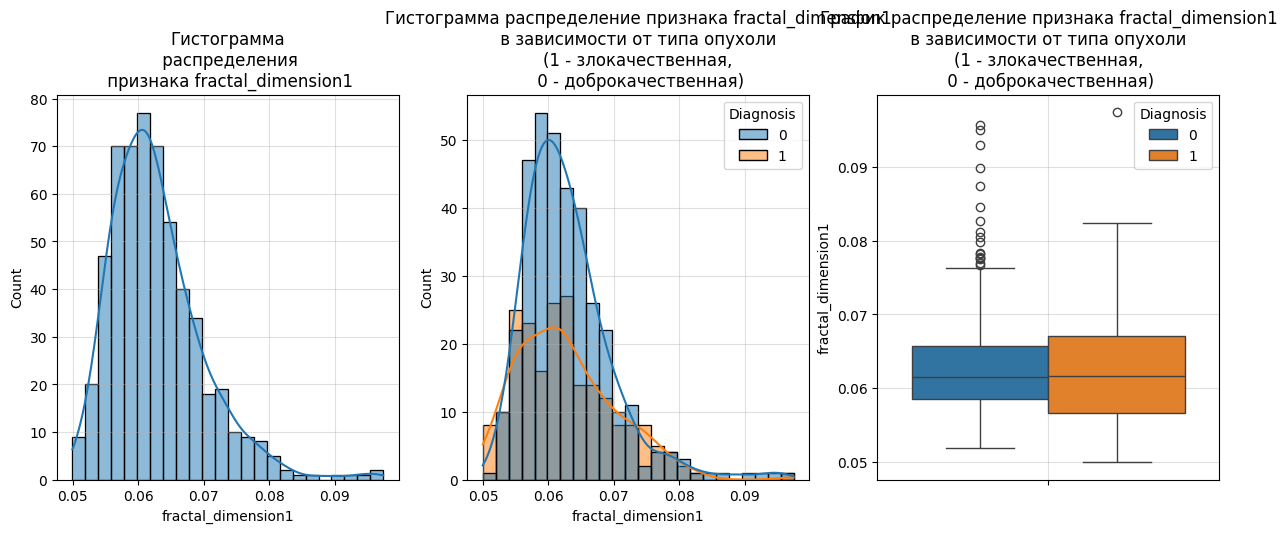

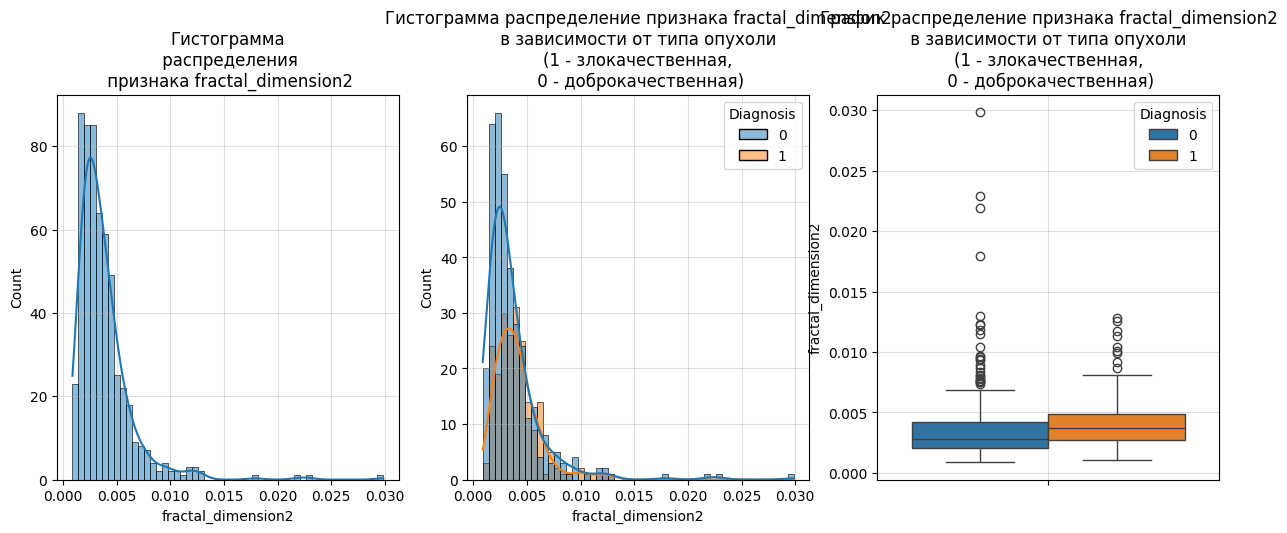

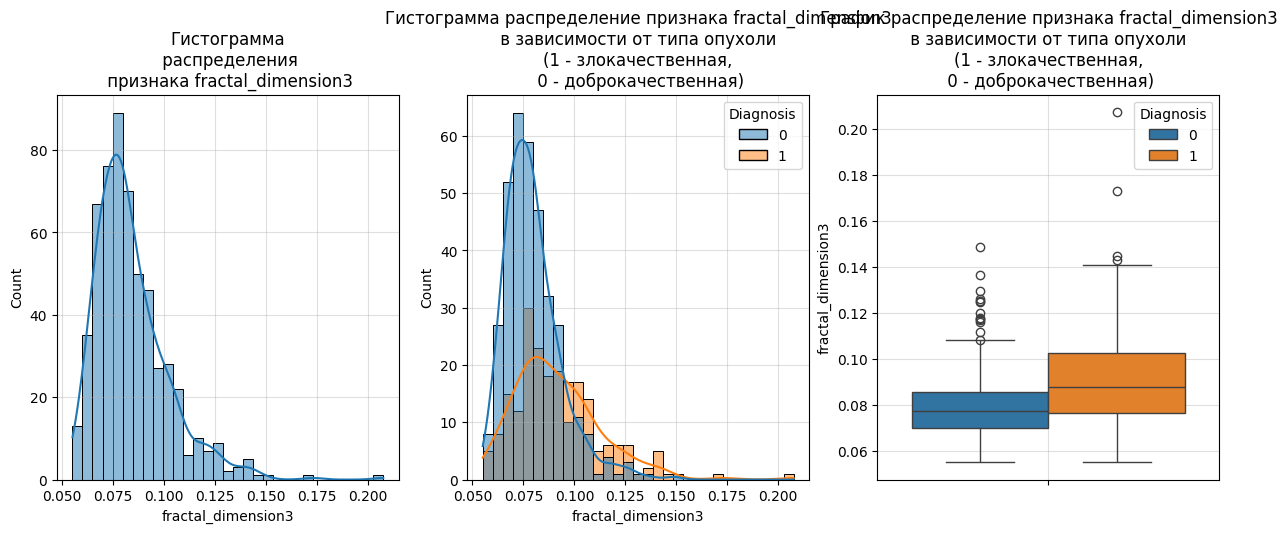

In [199]:
feat_asses_3(data, 'fractal_dimension1','fractal_dimension2','fractal_dimension3')

- признак 'fractal_dimension1': практически нет различий в распределении признака в группах с разными типами новообразований (злокачественных и доброкачественных), поэтому признак потенциально неважен для предсказания - отмечается тенденция к бОльшему значению признака в группах со злокачественным новообразованием. В группе доброкачественных образований много выбросов. Удалим данный признак.
- признак 'fractal_dimension2': распределение признака напоминает логнормальное, есть выбросы, которые сложно оценивать, т.к. распределение признака не нормальное. произведем логарифмирование признака и оценим выбросы.
- признак 'fractal_dimension3': распределение признака напоминает логнормальное, есть выбросы, которые сложно оценивать, т.к. распределение признака не нормальное. произведем логарифмирование признака и оценим выбросы.

In [200]:
# удалим признак fractal_dimension1, изменения будем производить с датасетом data_out
data_out.drop('fractal_dimension1', axis = 1, inplace = True)
data_out.columns

Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'radius2',
       'perimeter2', 'area2', 'compactness2', 'concavity2', 'concave_points2',
       'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3',
       'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3', 'Diagnosis'],
      dtype='object')

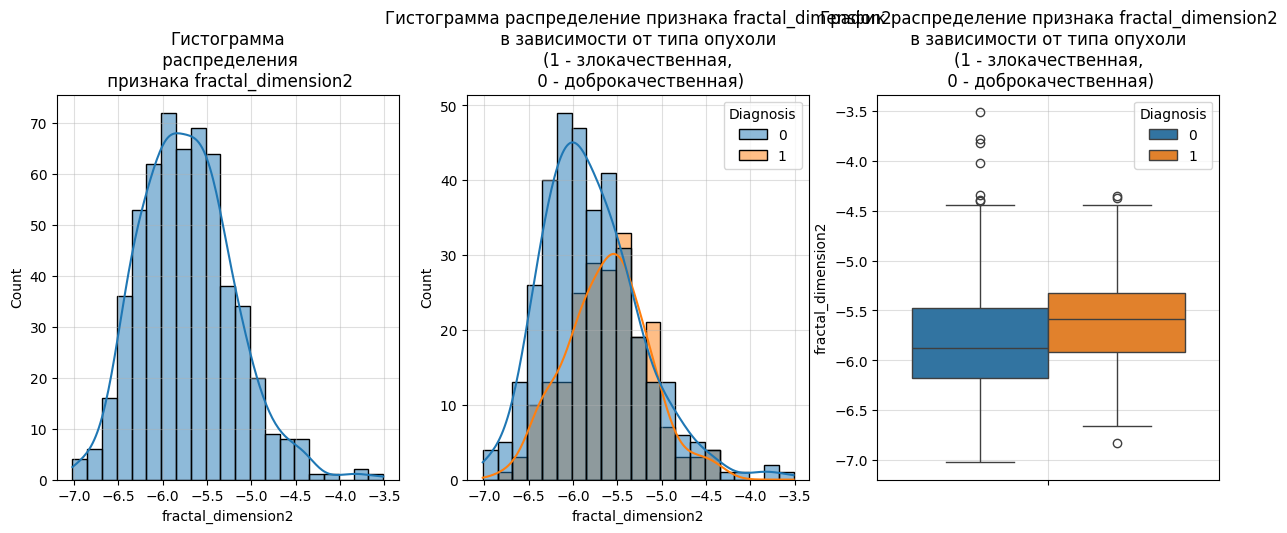

In [201]:
# Логарифмируем признак 'fractal_dimension2' и посмотрим распределение признака, будем использовать датасет data_out

data_out['fractal_dimension2'] = round(np.log(data_out['fractal_dimension2']),3)
fig, axes = plt.subplots(1, 3, figsize = (15,5))
sns.histplot(data_out['fractal_dimension2'], kde= True, ax = axes[0])
axes[0].set_title(f'Гистограмма\n распределения\n признака {"fractal_dimension2"}')
axes[0].grid(alpha=0.4)
sns.histplot(x = data_out['fractal_dimension2'],  hue = data_out['Diagnosis'], kde= True, ax = axes[1])
axes[1].set_title(f'Гистограмма распределение признака {"fractal_dimension2"}\n в зависимости от типа опухоли \n(1 - злокачественная,\n 0 - доброкачественная)')
axes[1].grid(alpha=0.4)
sns.boxplot(y = data_out['fractal_dimension2'],  hue = data_out['Diagnosis'],ax = axes[2])
axes[2].set_title(f'График распределение признака {"fractal_dimension2"}\n в зависимости от типа опухоли \n(1 - злокачественная,\n 0 - доброкачественная)')
axes[2].grid(alpha=0.4)

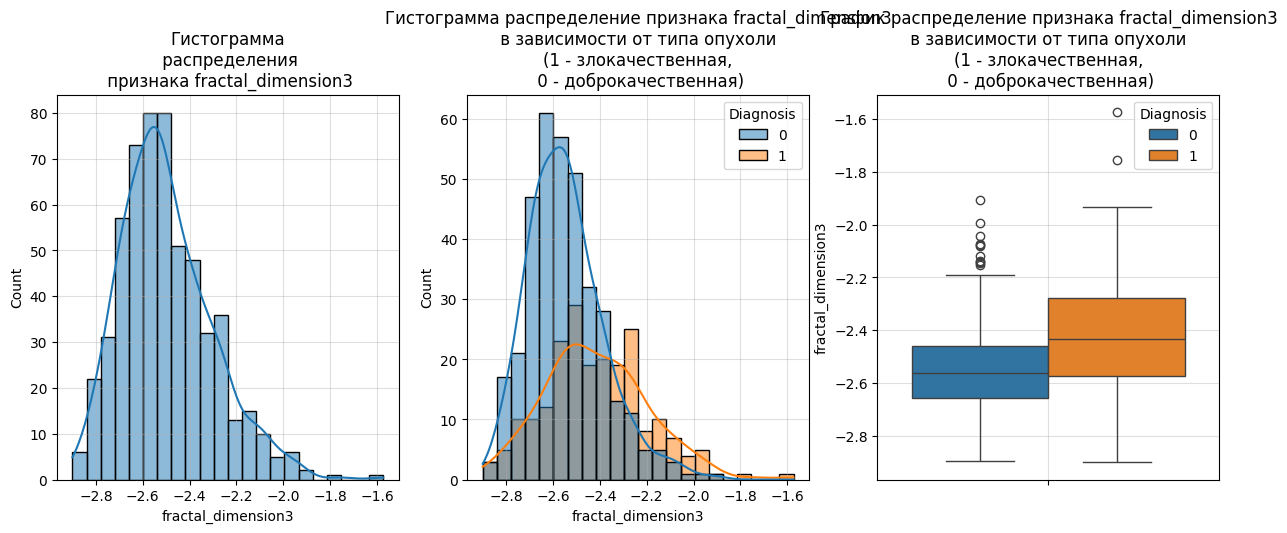

In [202]:
# Логарифмируем признак 'fractal_dimension3' и посмотрим распределение признака, будем использовать датасет data_out

data_out['fractal_dimension3'] = round(np.log(data_out['fractal_dimension3']),3)
fig, axes = plt.subplots(1, 3, figsize = (15,5))
sns.histplot(data_out['fractal_dimension3'], kde= True, ax = axes[0])
axes[0].set_title(f'Гистограмма\n распределения\n признака {"fractal_dimension3"}')
axes[0].grid(alpha=0.4)
sns.histplot(x = data_out['fractal_dimension3'],  hue = data_out['Diagnosis'], kde= True, ax = axes[1])
axes[1].set_title(f'Гистограмма распределение признака {"fractal_dimension3"}\n в зависимости от типа опухоли \n(1 - злокачественная,\n 0 - доброкачественная)')
axes[1].grid(alpha=0.4)
sns.boxplot(y = data_out['fractal_dimension3'],  hue = data_out['Diagnosis'],ax = axes[2])
axes[2].set_title(f'График распределение признака {"fractal_dimension3"}\n в зависимости от типа опухоли \n(1 - злокачественная,\n 0 - доброкачественная)')
axes[2].grid(alpha=0.4)

Выбросы сохраняются, их стало меньше. тенденция различия распределения признаков в обеих групп сохранилась.
___

### Проверка данных на мультиколлинеарность (датасет data)

(ниже будем работать с основным датасетом data, который сохранен без изменений и будет в дальнейшем использован для построения базовых моделей для оценки базовых метрик).

после построения базовых моделей, будем работать с измененным датасетом data_out, будем начинать с данного этапа - проверки на мультиколлинеальность.

In [203]:
data.shape

(569, 31)

In [204]:
# посчитаем матрицу корреляций
corr = data.corr()

# посчитаем ранг и определитель матрицы корреляций
rang = np.linalg.matrix_rank(corr)
determinant = np.linalg.det(corr)

rang, determinant

(31, 4.697938348295823e-32)

Ранг матрицы корреляций совпадает с количеством признаков, значит явной линейной связи между признаками нет. 
очень маленькое значение определителя матрицы (близко к нулю) говорит о наличии мультиколлиреарности между признаками, что может повлиять на качество модели.

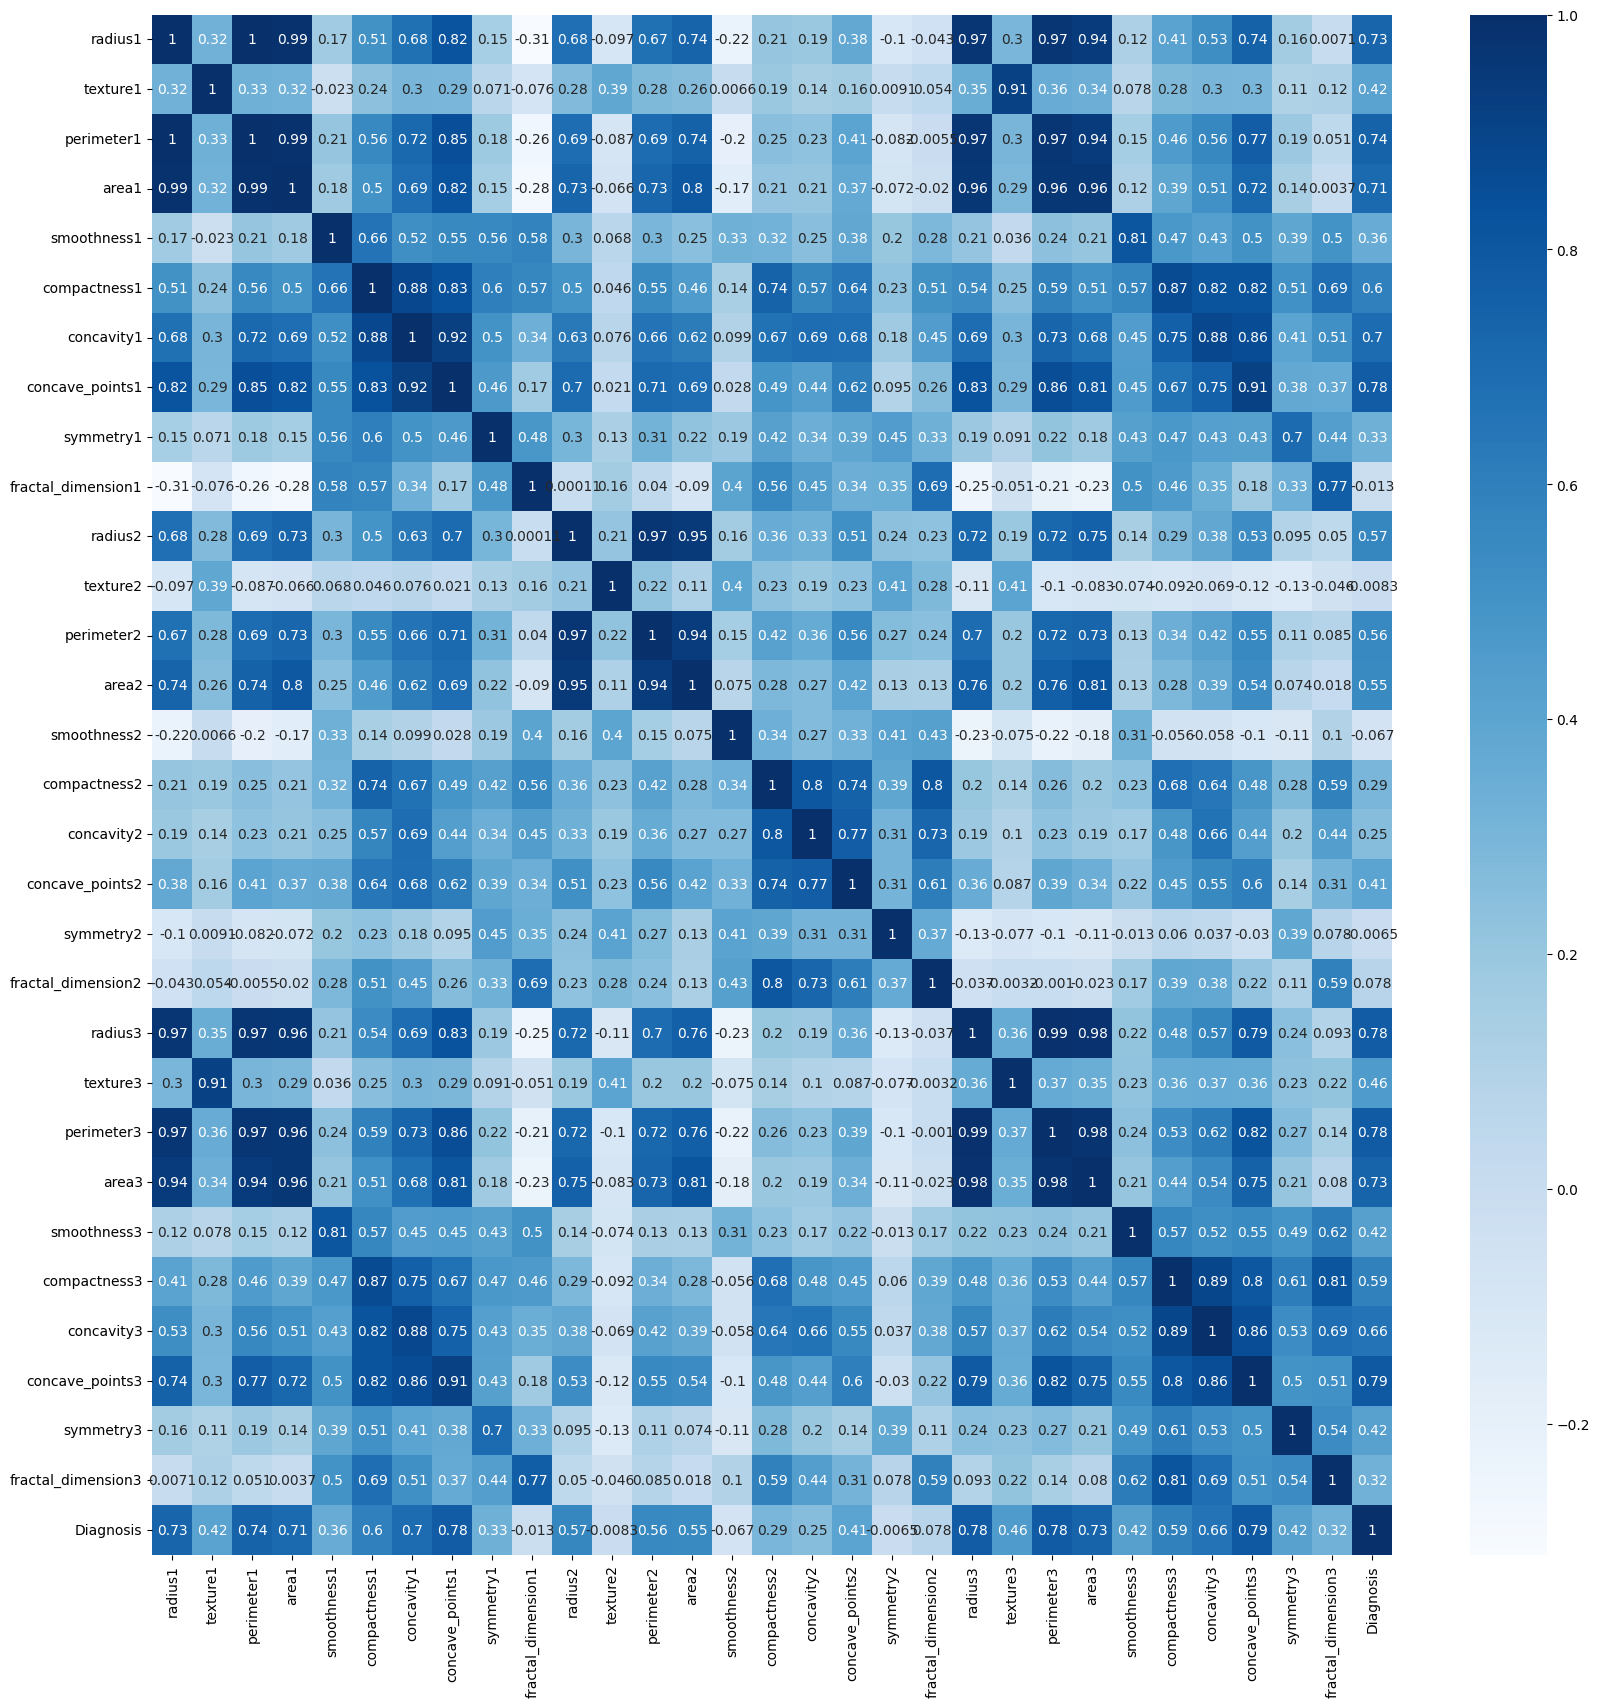

In [205]:
# оценим корреляцию всех признаков между собой и с целевой переменной с помощью матрицы корреляций
plt.subplots(figsize = (20,20))
# corr = data_clean.corr()
sns.heatmap(data.corr(), cmap="Blues", annot=True);

Отмечается высокая связь целевой переменной со следующими признаками:
- radius1 (0.73)
- perimeter1 (0.74)
- area1 (0.71)
- concave_points1 (0.78)
- radius3 (0.78)
- perimeter3 (0.78)
- area3 (0.73)
- concave_points3 (0.79)

кроме того, наблюдается выраженая мультиколлинеальность некоторых признаков. Попробуем вывести матрицу корреляций признаков с сильной мультиколлинеальностю (>0.8)

In [206]:
corr = data.corr()
m = (corr.mask(np.eye(len(corr), dtype=bool)).abs() > 0.8).any()
raw = corr.loc[m, m]
raw

radius1  texture1  perimeter1     area1  smoothness1  \
radius1             1.000000  0.323782    0.997855  0.987357     0.170581   
texture1            0.323782  1.000000    0.329533  0.321086    -0.023389   
perimeter1          0.997855  0.329533    1.000000  0.986507     0.207278   
area1               0.987357  0.321086    0.986507  1.000000     0.177028   
smoothness1         0.170581 -0.023389    0.207278  0.177028     1.000000   
compactness1        0.506124  0.236702    0.556936  0.498502     0.659123   
concavity1          0.676764  0.302418    0.716136  0.685983     0.521984   
concave_points1     0.822529  0.293464    0.850977  0.823269     0.553695   
radius2             0.679090  0.275869    0.691765  0.732562     0.301467   
perimeter2          0.674172  0.281673    0.693135  0.726628     0.296092   
area2               0.735864  0.259845    0.744983  0.800086     0.246552   
compactness2        0.206000  0.191975    0.250744  0.212583     0.318943   
concavity2          0.194204  0.143293    0.228082  0.207660     0.248396   
fractal_dimension2 -0.042641  0.054458   -0.005523 -0.019887     0.283607   
radius3             0.969539  0.352573    0.969476  0.962746     0.213120   
texture3            0.297008  0.912045    0.303038  0.287489     0.036072   
perimeter3          0.965137  0.358040    0.970387  0.959120     0.238853   
area3               0.941082  0.343546    0.941550  0.959213     0.206718   
smoothness3         0.119616  0.077503    0.150549  0.123523     0.805324   
compactness3        0.413463  0.277830    0.455774  0.390410     0.472468   
concavity3          0.526911  0.301025    0.563879  0.512606     0.434926   
concave_points3     0.744214  0.295316    0.771241  0.722017     0.503053   
fractal_dimension3  0.007066  0.119205    0.051019  0.003738     0.499316   

                    compactness1  concavity1  concave_points1   radius2  \
radius1                 0.506124    0.676764         0.822529  0.679090   
texture1                0.236702    0.302418         0.293464  0.275869   
perimeter1              0.556936    0.716136         0.850977  0.691765   
area1                   0.498502    0.685983         0.823269  0.732562   
smoothness1             0.659123    0.521984         0.553695  0.301467   
compactness1            1.000000    0.883121         0.831135  0.497473   
concavity1              0.883121    1.000000         0.921391  0.631925   
concave_points1         0.831135    0.921391         1.000000  0.698050   
radius2                 0.497473    0.631925         0.698050  1.000000   
perimeter2              0.548905    0.660391         0.710650  0.972794   
area2                   0.455653    0.617427         0.690299  0.951830   
compactness2            0.738722    0.670279         0.490424  0.356065   
concavity2              0.570517    0.691270         0.439167  0.332358   
fractal_dimension2      0.507318    0.449301         0.257584  0.227754   
radius3                 0.535315    0.688236         0.830318  0.715065   
texture3                0.248133    0.299879         0.292752  0.194799   
perimeter3              0.590210    0.729565         0.855923  0.719684   
area3                   0.509604    0.675987         0.809630  0.751548   
smoothness3             0.565541    0.448822         0.452753  0.141919   
compactness3            0.865809    0.754968         0.667454  0.287103   
concavity3              0.816275    0.884103         0.752399  0.380585   
concave_points3         0.815573    0.861323         0.910155  0.531062   
fractal_dimension3      0.687382    0.514930         0.368661  0.049559   

                    perimeter2  ...  fractal_dimension2   radius3  texture3  \
radius1               0.674172  ...           -0.042641  0.969539  0.297008   
texture1              0.281673  ...            0.054458  0.352573  0.912045   
perimeter1            0.693135  ...           -0.005523  0.969476  0.303038   
area1                 0.726628  ...           -0.019887

оказалось 23 признака, в дальнейшем проанализируем и избавимся от некоторых из них.

### Также проверим мультиколлинеальность с помощью VIF

In [207]:
!pip install statsmodels


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [208]:
# Скачаем коэффициент инфляции дисперсии (variance_inflation_factor,VIF) для оценки мультиколлинеальности
from statsmodels.stats.outliers_influence import variance_inflation_factor # type: ignore

In [209]:
# Создадим таблицу для хранения VIF значений
vif_data = pd.DataFrame()
vif_data['feature'] = data.columns[:-1]

# Вычислим VIF для каждого признака
vif_data['VIF'] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns)-1)]
pd.set_option('display.max_rows', None)

# Отсортируем по убывающей
vif_data.sort_values(by= 'VIF', ascending = False)
# Установим vif limit = 10

feature           VIF
0              radius1  63787.228031
2           perimeter1  58217.307016
20             radius3   9960.892269
22          perimeter3   4494.531141
3                area1   1305.508785
23               area3   1164.089106
9   fractal_dimension1    654.870560
29  fractal_dimension3    427.226418
4          smoothness1    393.410071
24         smoothness3    375.598751
21            texture3    343.506199
1             texture1    251.122570
10             radius2    237.352381
28           symmetry3    219.571466
12          perimeter2    211.429834
5         compactness1    201.524726
8            symmetry1    184.542087
6           concavity1    158.130682
7      concave_points1    154.891431
27     concave_points3    148.765592
25        compactness3    132.894041
26          concavity3     86.721758
13               area2     72.669276
17     concave_points2     54.072023
15        compactness2     44.979263
18           symmetry2     37.194742
16          concavity2     33.676991
19  fractal_dimension2     27.556836
14         smoothness2     26.395387
11            texture2     24.675389

Высокие значения VIF указывают на потенциальные проблемы с мультиколлинеарностью. Как правило, значение VIF выше 5 требует внимания, а выше 10 — серьезного рассмотрения изменений в модели.

В нашем случае все VIF значения признаков больше 10, что говорит о серьезных проблемах с мультиколлинеальностью (таргетная переменная была исключена из анализа).

___
Дальнейший план с датасетом и построение моделей машинного обучения следующий:

1) Построим модель  (Логистическую регрессии, Решающее дерево, Метод ближайших соседей и опорных векторов) на всех признаках и оценим качество, будем считать эти метрики базовыми
2) Проанализируем каждый из признаков и удалим признаки, потенциально не влияющие на работу модели (например, такие, в которых распределение признака в группах с доброкачественными и злокачественными образованиями не различается), оценим матрицу корреляции и удалим признаки с очень сильной линейной зависимостью между собой, но не с целевой переменной, стандартизируем данные и построим модели как в пункте 1, сравним метрики

__

In [210]:
# сделаем копию датасета, чтобы можно было в дальнейшем обрабатывать признаки и строить модели на разных признаках
data_1 = data.copy()

- Отделим таргетную переменную от датасета

In [211]:
X = data.drop('Diagnosis', axis= 1)
y = data['Diagnosis']

In [212]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

In [213]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [214]:
#  Создадим **функцию вычисления специфичности** (готовой реализации нет)

def calculate_specificity(true_labels, predictions):
    """Вычисление специфичности для бинарной и многоклассовой классификации
  Аргументы функции:
    true_labels: истинные метки классов
    predictions: предсказанные метки классов
  Результат:
    специфичность и confusion_matrix
    """
    conf_matrix = confusion_matrix(true_labels, predictions)
    tn, fp, fn, tp = conf_matrix.ravel()
    specif = (tn / (tn + fp)).round(4)
    return specif, (tn, fp, fn, tp)


* Поместим вычисление нескольких метрик  в отдельную функцию:

In [215]:
def get_all_metrics(
    true_labels,
    predictions,
    probabilities,
    print_metrics=False,
    **kwargs,
):
    """Подсчёт и вывод всех метрик
  Аргументы функции:
    true_labels: истинные метки классов
    predictions: предсказания (метки классов)
    probabilities: предсказания (вероятности принадлежности каждого объекта к каждому классу)
    print_metrics: если True, то печатает получившиеся метрики
    **kwargs: специальный синтаксис для сборки всех дополнительных именованных аргументов в один словарь
  Возвращает:
    словарь, ключи которого -- названия метрик точности, значения - значения метрик точности
    """

    kwargs_precision_recall_f1_pr_auc = dict()
    kwargs_roc_auc = dict()

    """Создаются два пустых словаря (`dict` — ассоциативный массив или словарь)
    1. kwargs_precision_recall_f1_pr_auc = dict():
    пустой словарь, который будет использован для передачи дополнительных аргументов
    (keyword arguments — `kwargs`) в функции, связанные с вычислением или визуализацией метрик, таких как
     Precision, Recall, F1 Score, PR AUC
    2. kwargs_roc_auc = dict():
    Создается пустой словарь, в который будут добавлены дополнительные параметры для анализа, связанного
    с ROC  кривой и площадью под ней
    """
    probabilities = probabilities[:, 1]
    true_predicted_labels_precision_recall_f1 = {
        "y_true": true_labels,
        "y_pred": predictions,
    }
    true_predicted_labels_pr_auc = {
        "y_true": true_labels,
        "y_score": probabilities,
    }

    """
    probabilities = probabilities[:, 1]: извлекает вероятности для позитивного класса (второго столбца) из массива предсказаний probabilities
    true_predicted_labels_precision_recall_f1: создаёт словарь, содержащий:
         "y_true": истинные метки классов (true_labels); "y_pred": предсказанные метки классов (predictions).

    true_predicted_labels_pr_auc: создаёт словарь, содержащий:
    "y_true": истинные метки классов (true_labels); "y_score": вероятности, предсказанные моделями (probabilities).
    """

    accuracy = accuracy_score(true_labels, predictions)
    balanced_accuracy=balanced_accuracy_score(true_labels, predictions)
    precision = precision_score(**true_predicted_labels_precision_recall_f1, **kwargs_precision_recall_f1_pr_auc)
    recall = recall_score(**true_predicted_labels_precision_recall_f1, **kwargs_precision_recall_f1_pr_auc)
    f1 = f1_score(**true_predicted_labels_precision_recall_f1, **kwargs_precision_recall_f1_pr_auc)

    roc_auc = roc_auc_score(true_labels, probabilities, **kwargs_roc_auc)
    pr_auc = average_precision_score(**true_predicted_labels_pr_auc, **kwargs_precision_recall_f1_pr_auc)

    specificity, conf_matrix = calculate_specificity(true_labels, predictions)


    tn, fp, fn, tp = conf_matrix

    print(
            "Accuracy = {:.4f}\nBalanced_accuracy = {:.4f}\nPrecision = {:.4f}\nRecall = {:.4f}\nF1_score = {:.4f}\nROC AUC = {:.4f}\nPR AUC = {:.4f}\nSpecificity = {:.4f}".format(
                accuracy, balanced_accuracy, precision, recall, f1, roc_auc, pr_auc, specificity
            )
        )


    return {
        "Accuracy": accuracy,
        "Balanced accuracy": balanced_accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1_score": f1,
        "ROC AUC": roc_auc,
        "PR AUC": pr_auc,
        "Specificity": specificity
    }

Поскольку необходимо сравнивать несколько моделей, напишем отдельную функцию для обучения и тестирования модели. Также эта функция будет вычислять и все указанные выше метрики.

In [216]:
def model_train_test(X_train, y_train, X_test, y_test, model, **kwargs):
    """Обучение и тестирование модели на обучающей и тестовой выборке соответственно.
    Аргументы функции:
    X_train: объекты обучающей выборки
    y_train: значения целевой переменной обучающей выборки
    X_test: объекты тестовой выборки
    y_test: значения целевой переменной тестовой выборки
    model: модель, которая обучается и тестируется
    Функция возвращает предсказания - классы и вероятности принадлежности к каждому классу, все метрики
    """
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    proba = model.predict_proba(X_test)
    """
    Метод predict используется для получения окончательных предсказаний класса для данного набора данных.
    Возвращает классы (метки) для объектов, исходя из решения модели. Для бинарной классификации возможные значения могут быть 0 или 1
    """
    if isinstance(model, LogisticRegression):
        importance = model.coef_[0]
    elif isinstance(model, DecisionTreeClassifier):
        importance = model.feature_importances_
    else:
         importance = None
    """
    Функция isinstance() в Python проверяет, является ли объект экземпляром указанного класса или кортежа классов.
    Возвращает True, если объект соответствует заданному типу, и False в противном случае.
    В нашем случае -это проверка, является ли объект model экземпляром класса LogisticRegression или DecisionTreeClassifier
    Логистическая регрессия:
    classifier.coef_ - атрибут модели, который содержит коэффициенты (веса) перед каждым признаком.
    Индекс [0] в classifier.coef_[0] используется для доступа к коэффициентам первого класса.
    Следовательно, код importance = classifier.coef_[0] присваивает переменной importance массив коэффициентов,
    которые модель использует для принятия решений о принадлежности нового наблюдения к первому классу.
    """
    print(str(model), end="\n\n")

    all_metrics = get_all_metrics(
        y_test,
        pred,
        proba,
        print_metrics=True,
        **kwargs,
    )
    return pred, proba, importance, all_metrics

## Итерация 1: Построим модели на "сырых признаках"

### Сравнение алгоритмов

Перейдем к непосредственному сравнению моделей. В задаче бинарной классификации будем сравнивать логистическую регрессию, решающее дерево, метод k-ближайших соседей и метод опорных векторов.  

In [217]:
pred_logreg, proba_logreg, importance_logreg, all_metrics_logreg = model_train_test(
    X_train, y_train.values,
    X_test, y_test.values,
    LogisticRegression(random_state=42, max_iter=500)
)

LogisticRegression(max_iter=500, random_state=42)

Accuracy = 0.9474
Balanced_accuracy = 0.9335
Precision = 0.9737
Recall = 0.8810
F1_score = 0.9250
ROC AUC = 0.9937
PR AUC = 0.9892
Specificity = 0.9861


- выведем метрики на обучающей и тестовой выборках для анализа работы модели (в том числе выявление пере- или недообучения модели)

In [218]:
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
print('train:', metrics.classification_report(y_train, model.predict(X_train)))
print('test:', metrics.classification_report(y_test, model.predict(X_test)))

train:               precision    recall  f1-score   support

           0       0.96      0.97      0.97       285
           1       0.95      0.93      0.94       170

    accuracy                           0.96       455
   macro avg       0.96      0.95      0.95       455
weighted avg       0.96      0.96      0.96       455

test:               precision    recall  f1-score   support

           0       0.93      0.99      0.96        72
           1       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



Модель хорошо предсказывает на тренировочной и тестовой выборках, переобучения нет.
___

In [219]:
pred_dt, proba_dt, importance_dt, all_metrics_dt = model_train_test(
    X_train, y_train.values,
    X_test, y_test.values,
    DecisionTreeClassifier(random_state=42)
)

DecisionTreeClassifier(random_state=42)

Accuracy = 0.9298
Balanced_accuracy = 0.9246
Precision = 0.9048
Recall = 0.9048
F1_score = 0.9048
ROC AUC = 0.9246
PR AUC = 0.8537
Specificity = 0.9444


- выведем метрики на обучающей и тестовой выборках для анализа работы модели (в том числе выявление пере- или недообучения модели)

In [220]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
print('train:', metrics.classification_report(y_train, model.predict(X_train)))
print('test:', metrics.classification_report(y_test, model.predict(X_test)))

train:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       285
           1       1.00      1.00      1.00       170

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455

test:               precision    recall  f1-score   support

           0       0.94      0.94      0.94        72
           1       0.90      0.90      0.90        42

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



Без ограничения параметров модели случайного леса, модель имеет тенденцию к переобучению - "заучиванию" ответов, что и показывают метрики, равные 1 на обучающем наборе данных, при этом также сохраняются высокими метрики на тестовой выборке.
В дальнейшем обязательно нужно подобрать и ограничить параметры модели и посмотреть, удастся ли получить лучшее качество модели.


оценим важные признаки, выделенным алгоритмом

In [221]:
pd_1 = pd.DataFrame({'feature_names': model.feature_names_in_, 'importance': np.round(model.feature_importances_,3)}).sort_values(by = 'importance',ascending= False)
pd_1

feature_names  importance
22          perimeter3       0.727
27     concave_points3       0.079
24         smoothness3       0.041
1             texture1       0.038
21            texture3       0.023
3                area1       0.022
20             radius3       0.018
23               area3       0.016
7      concave_points1       0.013
16          concavity2       0.007
25        compactness3       0.006
0              radius1       0.005
26          concavity3       0.003
13               area2       0.002
18           symmetry2       0.000
19  fractal_dimension2       0.000
28           symmetry3       0.000
15        compactness2       0.000
17     concave_points2       0.000
14         smoothness2       0.000
12          perimeter2       0.000
11            texture2       0.000
10             radius2       0.000
9   fractal_dimension1       0.000
8            symmetry1       0.000
6           concavity1       0.000
5         compactness1       0.000
4          smoothness1       0.000
2           perimeter1       0.000
29  fractal_dimension3       0.000

Модель посчитала, что наиболее важным признаком для решения задачи является **perimeter3** (0.727), далее в порядке убывания следуют признаки **concave_points3,	smoothness3, texture1, texture3, area1, radius3, area3, concave_points1, concavity2, compactness3, radius1, concavity3, area2** (важность от 0.08 до 0.002), остальные признаки фактически приняты моделью как незначимые.

Учтем это при выборе финальных признаков для улучшения качества модели.
___

In [222]:
pred_knn, proba_knn, importance_knn, all_metrics_knn = model_train_test(
    X_train, y_train.values,
    X_test, y_test.values,
    KNeighborsClassifier()
)

KNeighborsClassifier()

Accuracy = 0.9123
Balanced_accuracy = 0.8859
Precision = 0.9706
Recall = 0.7857
F1_score = 0.8684
ROC AUC = 0.9547
PR AUC = 0.9396
Specificity = 0.9861


In [223]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print('train:', metrics.classification_report(y_train, model.predict(X_train)))
print('test:', metrics.classification_report(y_test, model.predict(X_test)))

train:               precision    recall  f1-score   support

           0       0.95      0.98      0.96       285
           1       0.96      0.91      0.93       170

    accuracy                           0.95       455
   macro avg       0.95      0.94      0.95       455
weighted avg       0.95      0.95      0.95       455

test:               precision    recall  f1-score   support

           0       0.89      0.99      0.93        72
           1       0.97      0.79      0.87        42

    accuracy                           0.91       114
   macro avg       0.93      0.89      0.90       114
weighted avg       0.92      0.91      0.91       114



На тренировочных данных метрики выше, чем на тестовых, но не настолько, чтобы можно было судить о переобучении. Признаков недообучения нет.
___

In [224]:
pred_svm, proba_svm, importance_svm, all_metrics_svm = model_train_test(
    X_train, y_train.values,
    X_test, y_test.values,
    SVC(probability=True)
)

SVC(probability=True)

Accuracy = 0.9035
Balanced_accuracy = 0.8690
Precision = 1.0000
Recall = 0.7381
F1_score = 0.8493
ROC AUC = 0.9808
PR AUC = 0.9704
Specificity = 1.0000


In [225]:
model = SVC(probability=True)
model.fit(X_train, y_train)
print('train:', metrics.classification_report(y_train, model.predict(X_train)))
print('test:', metrics.classification_report(y_test, model.predict(X_test)))

train:               precision    recall  f1-score   support

           0       0.90      0.98      0.94       285
           1       0.97      0.81      0.88       170

    accuracy                           0.92       455
   macro avg       0.93      0.90      0.91       455
weighted avg       0.92      0.92      0.92       455

test:               precision    recall  f1-score   support

           0       0.87      1.00      0.93        72
           1       1.00      0.74      0.85        42

    accuracy                           0.90       114
   macro avg       0.93      0.87      0.89       114
weighted avg       0.92      0.90      0.90       114



Метрики равнимы на тренировочной и тестовой выборках, получена метрика recall = 1.0 для определения отсуствия злокачественного новообразования.
___

* Сравним не только ROC AUC и PR AUC, но и ROC- и PR-кривые. Для их визуализации будем использовать функцию, приведенную ниже:

In [226]:
def plot_roc_pr_curves(true_labels, algorithms):
    """Отрисовка ROC- и PR-кривых.
    Аргументы функции:
    true_labels: истинные метки классов
    algorithms: словарь формата {название_алгоритма: вероятности_принадлежности_к_каждому_классу}
    """
    fig, ax = plt.subplots(1, 2, figsize=(20, 8))
    ax[0].set_title("ROC-curve", fontsize=20)
    ax[1].set_title("PR-curve", fontsize=20)

    for alg_name, probabilities in algorithms.items():
        fpr, tpr, _ = roc_curve(true_labels, probabilities[:, 1])
        precisions, recalls, _ = precision_recall_curve(true_labels, probabilities[:, 1])

        ax[0].plot(
            fpr,
            tpr,
            label="{} (ROC AUC = {})".format(
                alg_name,
                round(
                    roc_auc_score(true_labels, probabilities[:, 1]),
                    3
                )
            )
        )
        ax[1].plot(
            recalls,
            precisions,
            label="{} (PR AUC = {})".format(
                alg_name,
                round(
                    average_precision_score(true_labels, probabilities[:, 1]),
                    3
                )
            )
        )

    ax[0].legend(fontsize=14)
    ax[0].set_xlabel("False positive rate", fontsize=16)
    ax[0].set_ylabel("True positive rate", fontsize=16)

    ax[1].legend(fontsize=14)
    ax[1].set_xlabel("Recall", fontsize=16)
    ax[1].set_ylabel("Precision", fontsize=16)
    plt.show()

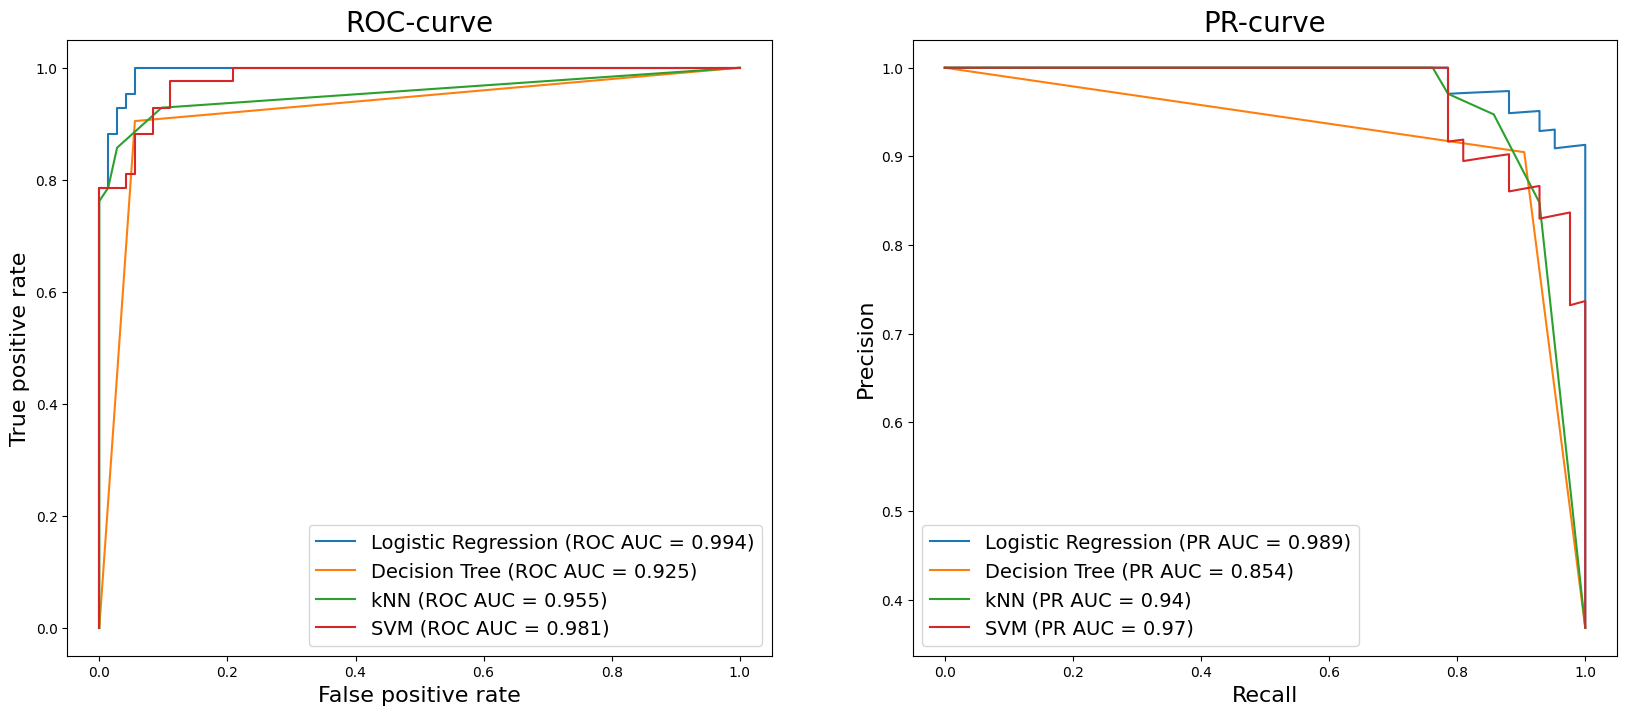

In [227]:
plot_roc_pr_curves(
    y_test,
    {
        "Logistic Regression": proba_logreg,
        "Decision Tree": proba_dt,
        "kNN": proba_knn,
        "SVM": proba_svm,
    }
)

* Сагрегируем все метрики моделей

In [228]:
ans_df = pd.DataFrame(
    [all_metrics_logreg, all_metrics_dt, all_metrics_knn, all_metrics_svm],
    index=["Logistic Regression", "Decision Tree", "kNN", "SVM"]
)
ans_df

Accuracy  Balanced accuracy  Precision    Recall  \
Logistic Regression  0.947368           0.933532   0.973684  0.880952   
Decision Tree        0.929825           0.924603   0.904762  0.904762   
kNN                  0.912281           0.885913   0.970588  0.785714   
SVM                  0.903509           0.869048   1.000000  0.738095   

                     F1_score   ROC AUC    PR AUC  Specificity  
Logistic Regression  0.925000  0.993717  0.989188       0.9861  
Decision Tree        0.904762  0.924603  0.853682       0.9444  
kNN                  0.868421  0.954696  0.939558       0.9861  
SVM                  0.849315  0.980820  0.970381       1.0000

* Для каждой метрики выведем список моделей по убыванию их качества

In [229]:
for metric in ans_df.columns:
    sorted_ans_df = ans_df.sort_values(by=metric, ascending=False)
    print(
        "{}:{}{}".format(
            metric,
            " " * (20 - len(metric)),
            sorted_ans_df.index.tolist()
        )
    )

Accuracy:            ['Logistic Regression', 'Decision Tree', 'kNN', 'SVM']
Balanced accuracy:   ['Logistic Regression', 'Decision Tree', 'kNN', 'SVM']
Precision:           ['SVM', 'Logistic Regression', 'kNN', 'Decision Tree']
Recall:              ['Decision Tree', 'Logistic Regression', 'kNN', 'SVM']
F1_score:            ['Logistic Regression', 'Decision Tree', 'kNN', 'SVM']
ROC AUC:             ['Logistic Regression', 'SVM', 'kNN', 'Decision Tree']
PR AUC:              ['Logistic Regression', 'SVM', 'kNN', 'Decision Tree']
Specificity:         ['SVM', 'Logistic Regression', 'kNN', 'Decision Tree']


Почти по всем параметрам лидером оказалась Логистическая регрессия. 

In [230]:
ans_df.loc['Logistic Regression']

Accuracy             0.947368
Balanced accuracy    0.933532
Precision            0.973684
Recall               0.880952
F1_score             0.925000
ROC AUC              0.993717
PR AUC               0.989188
Specificity          0.986100
Name: Logistic Regression, dtype: float64

Лучшая метрика на "сырых" необработанных данных: ROC AUC - 0.993717

___

### Итерация 2: проанализируем данные и удалим признаки, которые кажутся незначимыми для предсказания (визуально по данным графиков)

In [231]:
data_out.shape

(569, 27)

In [232]:
data_out.columns

Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'radius2',
       'perimeter2', 'area2', 'compactness2', 'concavity2', 'concave_points2',
       'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3',
       'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3', 'Diagnosis'],
      dtype='object')

Выведем признаки, которые алгоритм дерево решений посчитал значимыми

In [233]:
display(pd_1[pd_1['importance']>0])

feature_names  importance
22       perimeter3       0.727
27  concave_points3       0.079
24      smoothness3       0.041
1          texture1       0.038
21         texture3       0.023
3             area1       0.022
20          radius3       0.018
23            area3       0.016
7   concave_points1       0.013
16       concavity2       0.007
25     compactness3       0.006
0           radius1       0.005
26       concavity3       0.003
13            area2       0.002

In [234]:
a = list(pd_1[pd_1['importance']>0]['feature_names'])
a

['perimeter3',
 'concave_points3',
 'smoothness3',
 'texture1',
 'texture3',
 'area1',
 'radius3',
 'area3',
 'concave_points1',
 'concavity2',
 'compactness3',
 'radius1',
 'concavity3',
 'area2']

При удалении признаков будем ориентироваться на этот список. 


### Проверка данных на мультиколлинеарность (датасет data_out)

In [235]:
# посчитаем матрицу корреляций
corr_out = data_out.corr()

# посчитаем ранг и определитель матрицы корреляций
rang_out = np.linalg.matrix_rank(corr_out)
determinant_out = np.linalg.det(corr_out)

rang_out, determinant_out

(27, 4.9974683483954144e-29)

Ранг матрицы корреляций совпадает с количеством признаков, значит явной линейной связи между признаками нет. 
Очень маленькое значение определителя матрицы (близко к нулю) говорит о наличии мультиколлиреарности между признаками, что может повлиять на качество модели, построим матрицу корреляций признаков и удалим признаки с высокой линейной связью друг с другом (не с таргетной переменной).

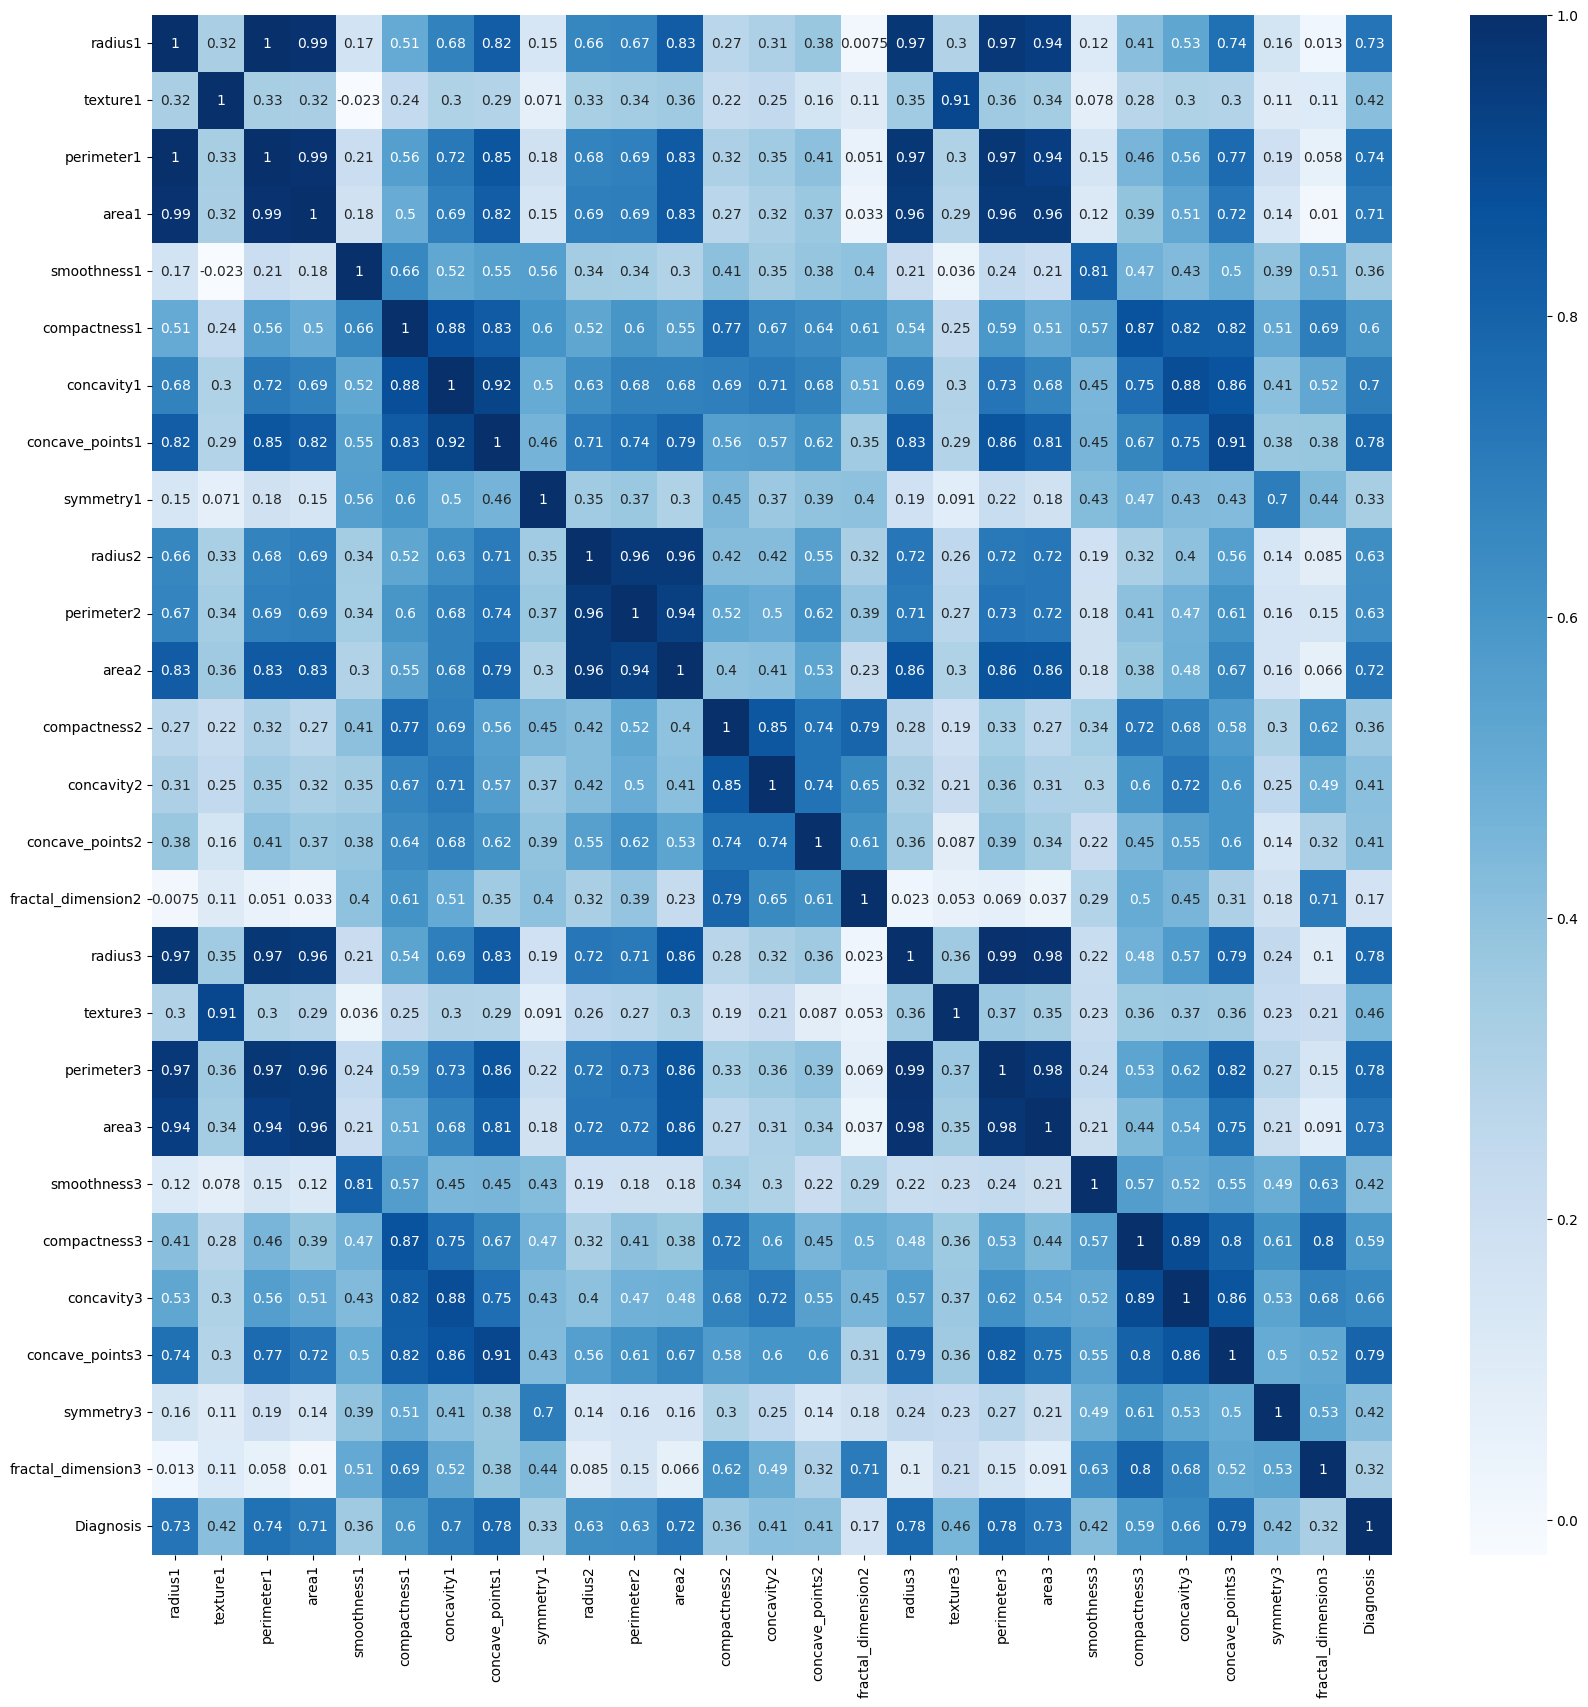

In [236]:
# оценим корреляцию всех признаков между собой и с целевой переменной с помощью матрицы корреляций
plt.subplots(figsize = (20,20))
# corr = data_clean.corr()
sns.heatmap(data_out.corr(), cmap="Blues", annot=True);

Отмечается высокая связь целевой переменной со следующими признаками:
- radius1 (0.73)
- perimeter1 (0.74)
- area1 (0.71)
- concave_points1 (0.78)
- area2 (0.72)
- radius3 (0.78)
- perimeter3 (0.78)
- area3 (0.73)
- concave_points3 (0.79)

кроме того, наблюдается выраженая мультиколлинеальность некоторых признаков. Попробуем вывести матрицу корреляций признаков с сильной мультиколлинеальностю (>0.9)

In [237]:
corr_out = data_out.corr()
m_out = (corr_out.mask(np.eye(len(corr_out), dtype=bool)).abs() > 0.9).any()
raw_out = corr_out.loc[m_out, m_out]
raw_out

radius1  texture1  perimeter1     area1  concavity1  \
radius1          1.000000  0.323782    0.997855  0.987357    0.676764   
texture1         0.323782  1.000000    0.329533  0.321086    0.302418   
perimeter1       0.997855  0.329533    1.000000  0.986507    0.716136   
area1            0.987357  0.321086    0.986507  1.000000    0.685983   
concavity1       0.676764  0.302418    0.716136  0.685983    1.000000   
concave_points1  0.822529  0.293464    0.850977  0.823269    0.921391   
radius2          0.664116  0.326580    0.676020  0.689115    0.627188   
perimeter2       0.669239  0.343899    0.688110  0.692672    0.680719   
area2            0.825137  0.357360    0.832764  0.834160    0.683540   
radius3          0.969539  0.352573    0.969476  0.962746    0.688236   
texture3         0.297008  0.912045    0.303038  0.287489    0.299879   
perimeter3       0.965137  0.358040    0.970387  0.959120    0.729565   
area3            0.941082  0.343546    0.941550  0.959213    0.675987   
concave_points3  0.744214  0.295316    0.771241  0.722017    0.861323   

                 concave_points1   radius2  perimeter2     area2   radius3  \
radius1                 0.822529  0.664116    0.669239  0.825137  0.969539   
texture1                0.293464  0.326580    0.343899  0.357360  0.352573   
perimeter1              0.850977  0.676020    0.688110  0.832764  0.969476   
area1                   0.823269  0.689115    0.692672  0.834160  0.962746   
concavity1              0.921391  0.627188    0.680719  0.683540  0.688236   
concave_points1         1.000000  0.707811    0.738642  0.791615  0.830318   
radius2                 0.707811  1.000000    0.962972  0.962510  0.716686   
perimeter2              0.738642  0.962972    1.000000  0.937091  0.712154   
area2                   0.791615  0.962510    0.937091  1.000000  0.861384   
radius3                 0.830318  0.716686    0.712154  0.861384  1.000000   
texture3                0.292752  0.255459    0.270483  0.302796  0.359921   
perimeter3              0.855923  0.715795    0.732887  0.858624  0.993708   
area3                   0.809630  0.723626    0.717419  0.855665  0.984015   
concave_points3         0.910155  0.560123    0.610105  0.665460  0.787424   

                 texture3  perimeter3     area3  concave_points3  
radius1          0.297008    0.965137  0.941082         0.744214  
texture1         0.912045    0.358040  0.343546         0.295316  
perimeter1       0.303038    0.970387  0.941550         0.771241  
area1            0.287489    0.959120  0.959213         0.722017  
concavity1       0.299879    0.729565  0.675987         0.861323  
concave_points1  0.292752    0.855923  0.809630         0.910155  
radius2          0.255459    0.715795  0.723626         0.560123  
perimeter2       0.270483    0.732887  0.717419         0.610105  
area2            0.302796    0.858624  0.855665         0.665460  
radius3          0.359921    0.993708  0.984015         0.787424  
texture3         1.000000    0.365098  0.345842         0.359755  
perimeter3       0.365098    1.000000  0.977578         0.816322  
area3            0.345842    0.977578  1.000000         0.747419  
concave_points3  0.359755    0.816322  0.747419         1.000000

In [238]:
# удалим сначала те признаки, у которых нет высокой корреляции с целевой переменной
# и выведем матрицу корреляций
'concavity1', 'radius2', 'perimeter2','texture3'

('concavity1', 'radius2', 'perimeter2', 'texture3')

In [239]:
data_out1 = data_out.copy()


Продолжим удаление мультиколлинеальных признаков.

In [240]:
data_out1.drop(['concavity1', 'radius2', 'perimeter2','texture3'], axis =  1, inplace = True)

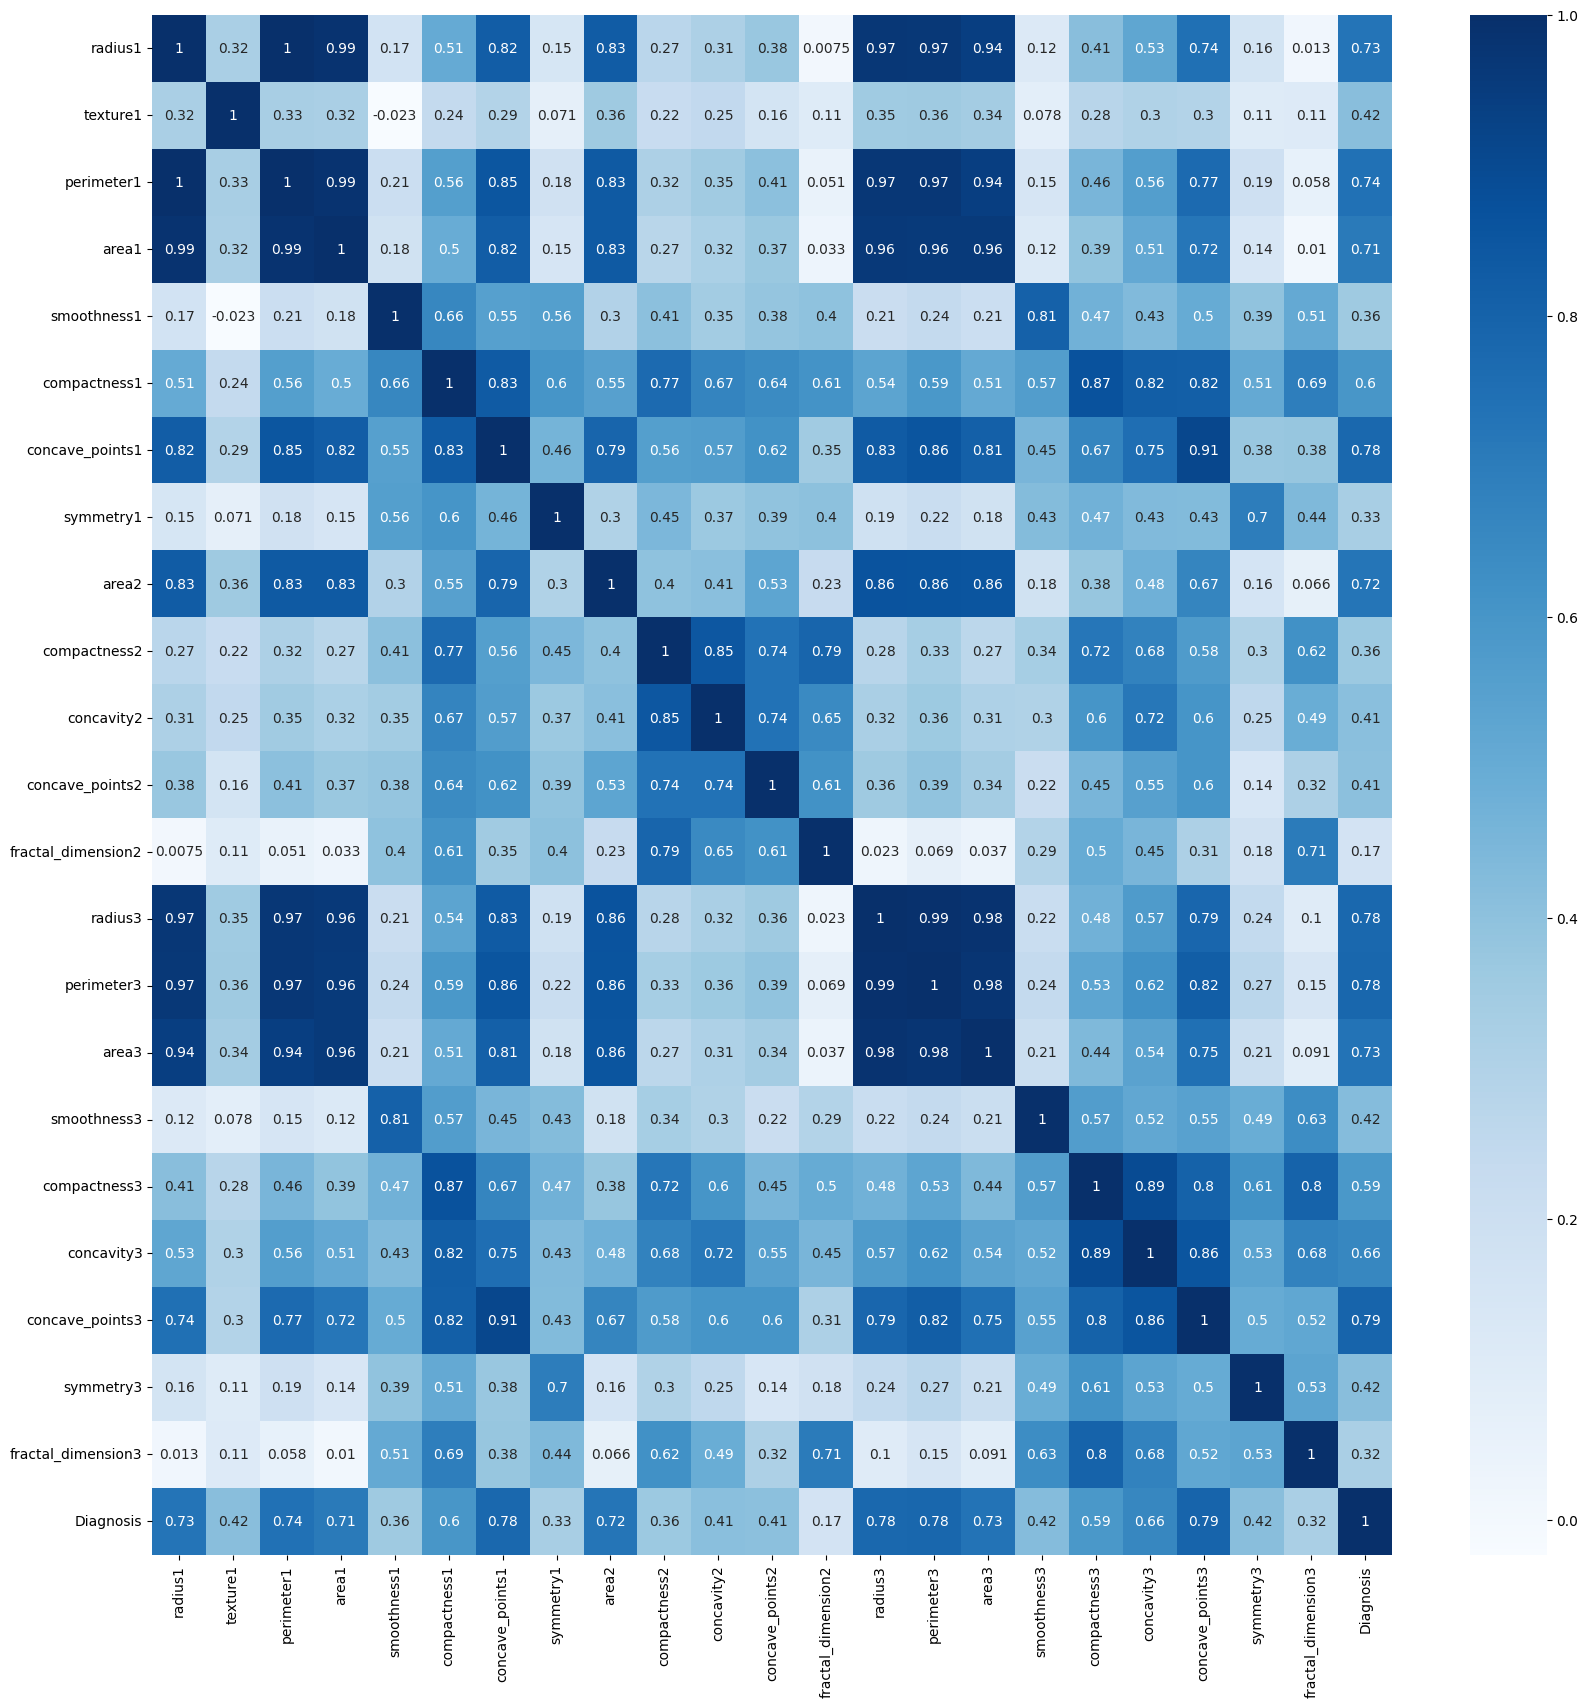

In [241]:
# оценим корреляцию всех признаков между собой и с целевой переменной с помощью матрицы корреляций
plt.subplots(figsize = (20,20))
# corr = data_clean.corr()
sns.heatmap(data_out1.corr(), cmap="Blues", annot=True);

In [242]:
corr_out1 = data_out1.corr()
m_out1 = (corr_out1.mask(np.eye(len(corr_out1), dtype=bool)).abs() > 0.9).any()
raw_out1 = corr_out1.loc[m_out1, m_out1]
raw_out1

radius1  perimeter1     area1  concave_points1   radius3  \
radius1          1.000000    0.997855  0.987357         0.822529  0.969539   
perimeter1       0.997855    1.000000  0.986507         0.850977  0.969476   
area1            0.987357    0.986507  1.000000         0.823269  0.962746   
concave_points1  0.822529    0.850977  0.823269         1.000000  0.830318   
radius3          0.969539    0.969476  0.962746         0.830318  1.000000   
perimeter3       0.965137    0.970387  0.959120         0.855923  0.993708   
area3            0.941082    0.941550  0.959213         0.809630  0.984015   
concave_points3  0.744214    0.771241  0.722017         0.910155  0.787424   

                 perimeter3     area3  concave_points3  
radius1            0.965137  0.941082         0.744214  
perimeter1         0.970387  0.941550         0.771241  
area1              0.959120  0.959213         0.722017  
concave_points1    0.855923  0.809630         0.910155  
radius3            0.993708  0.984015         0.787424  
perimeter3         1.000000  0.977578         0.816322  
area3              0.977578  1.000000         0.747419  
concave_points3    0.816322  0.747419         1.000000

Следующие признаки на очереди - 'area1', 'radius1', 'perimeter1'

In [243]:
data_out1.drop(['area1', 'radius1', 'perimeter1'], axis =  1, inplace = True)

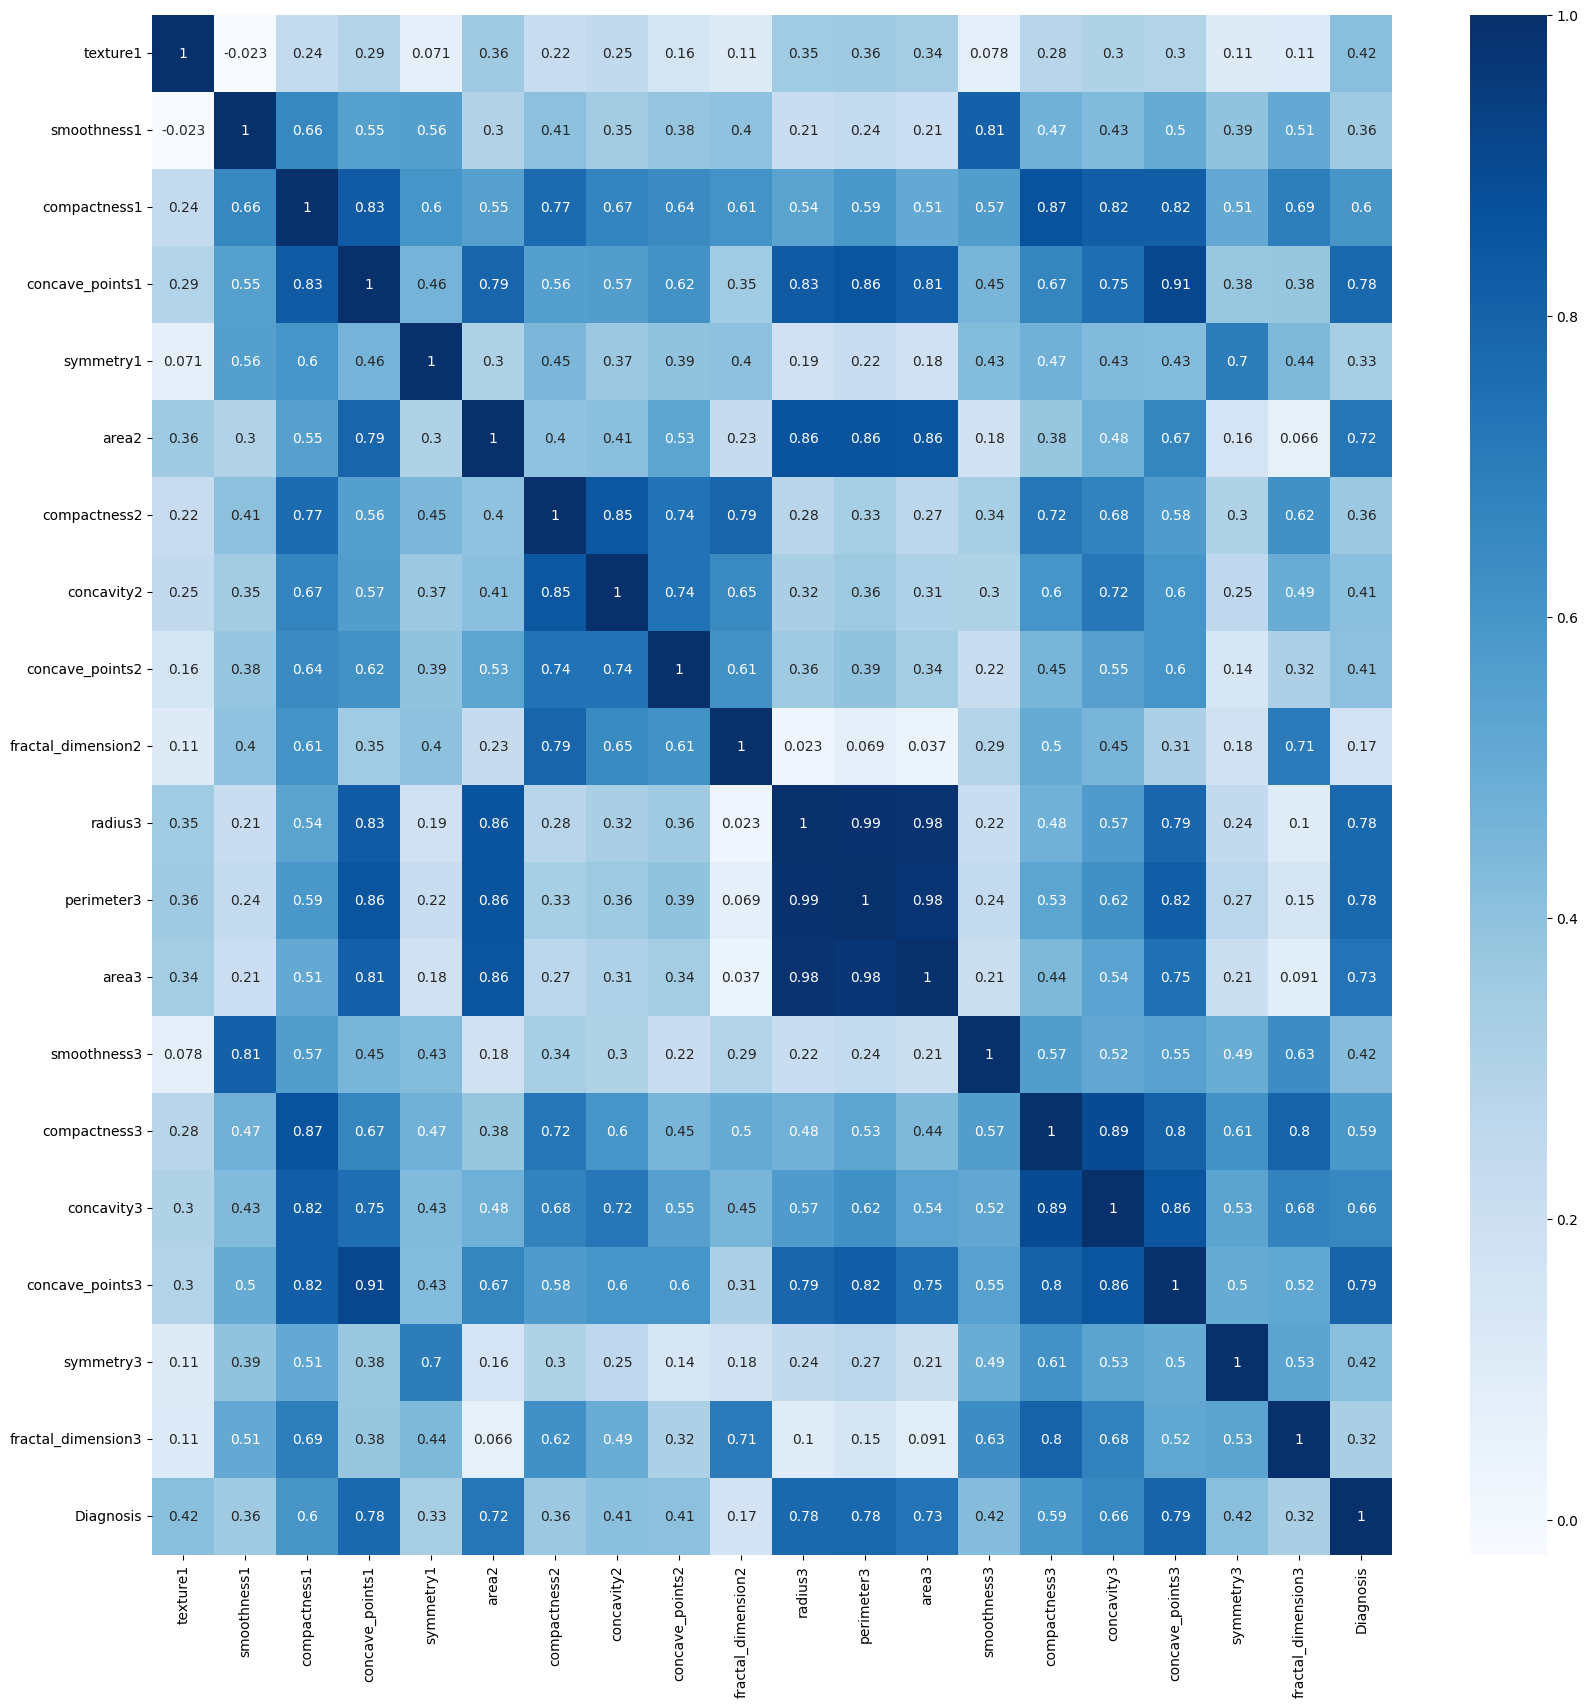

In [244]:
# оценим корреляцию всех признаков между собой и с целевой переменной с помощью матрицы корреляций
plt.subplots(figsize = (20,20))
# corr = data_clean.corr()
sns.heatmap(data_out1.corr(), cmap="Blues", annot=True);

In [245]:
corr_out1 = data_out1.corr()
m_out1 = (corr_out1.mask(np.eye(len(corr_out1), dtype=bool)).abs() > 0.9).any()
raw_out1 = corr_out1.loc[m_out1, m_out1]
raw_out1

concave_points1   radius3  perimeter3     area3  \
concave_points1         1.000000  0.830318    0.855923  0.809630   
radius3                 0.830318  1.000000    0.993708  0.984015   
perimeter3              0.855923  0.993708    1.000000  0.977578   
area3                   0.809630  0.984015    0.977578  1.000000   
concave_points3         0.910155  0.787424    0.816322  0.747419   

                 concave_points3  
concave_points1         0.910155  
radius3                 0.787424  
perimeter3              0.816322  
area3                   0.747419  
concave_points3         1.000000

Теперь удалим признаки :'area3',  'concave_points1', 'radius3'

In [246]:
data_out1.drop(['area3',  'concave_points1', 'radius3' ], axis =  1, inplace = True)

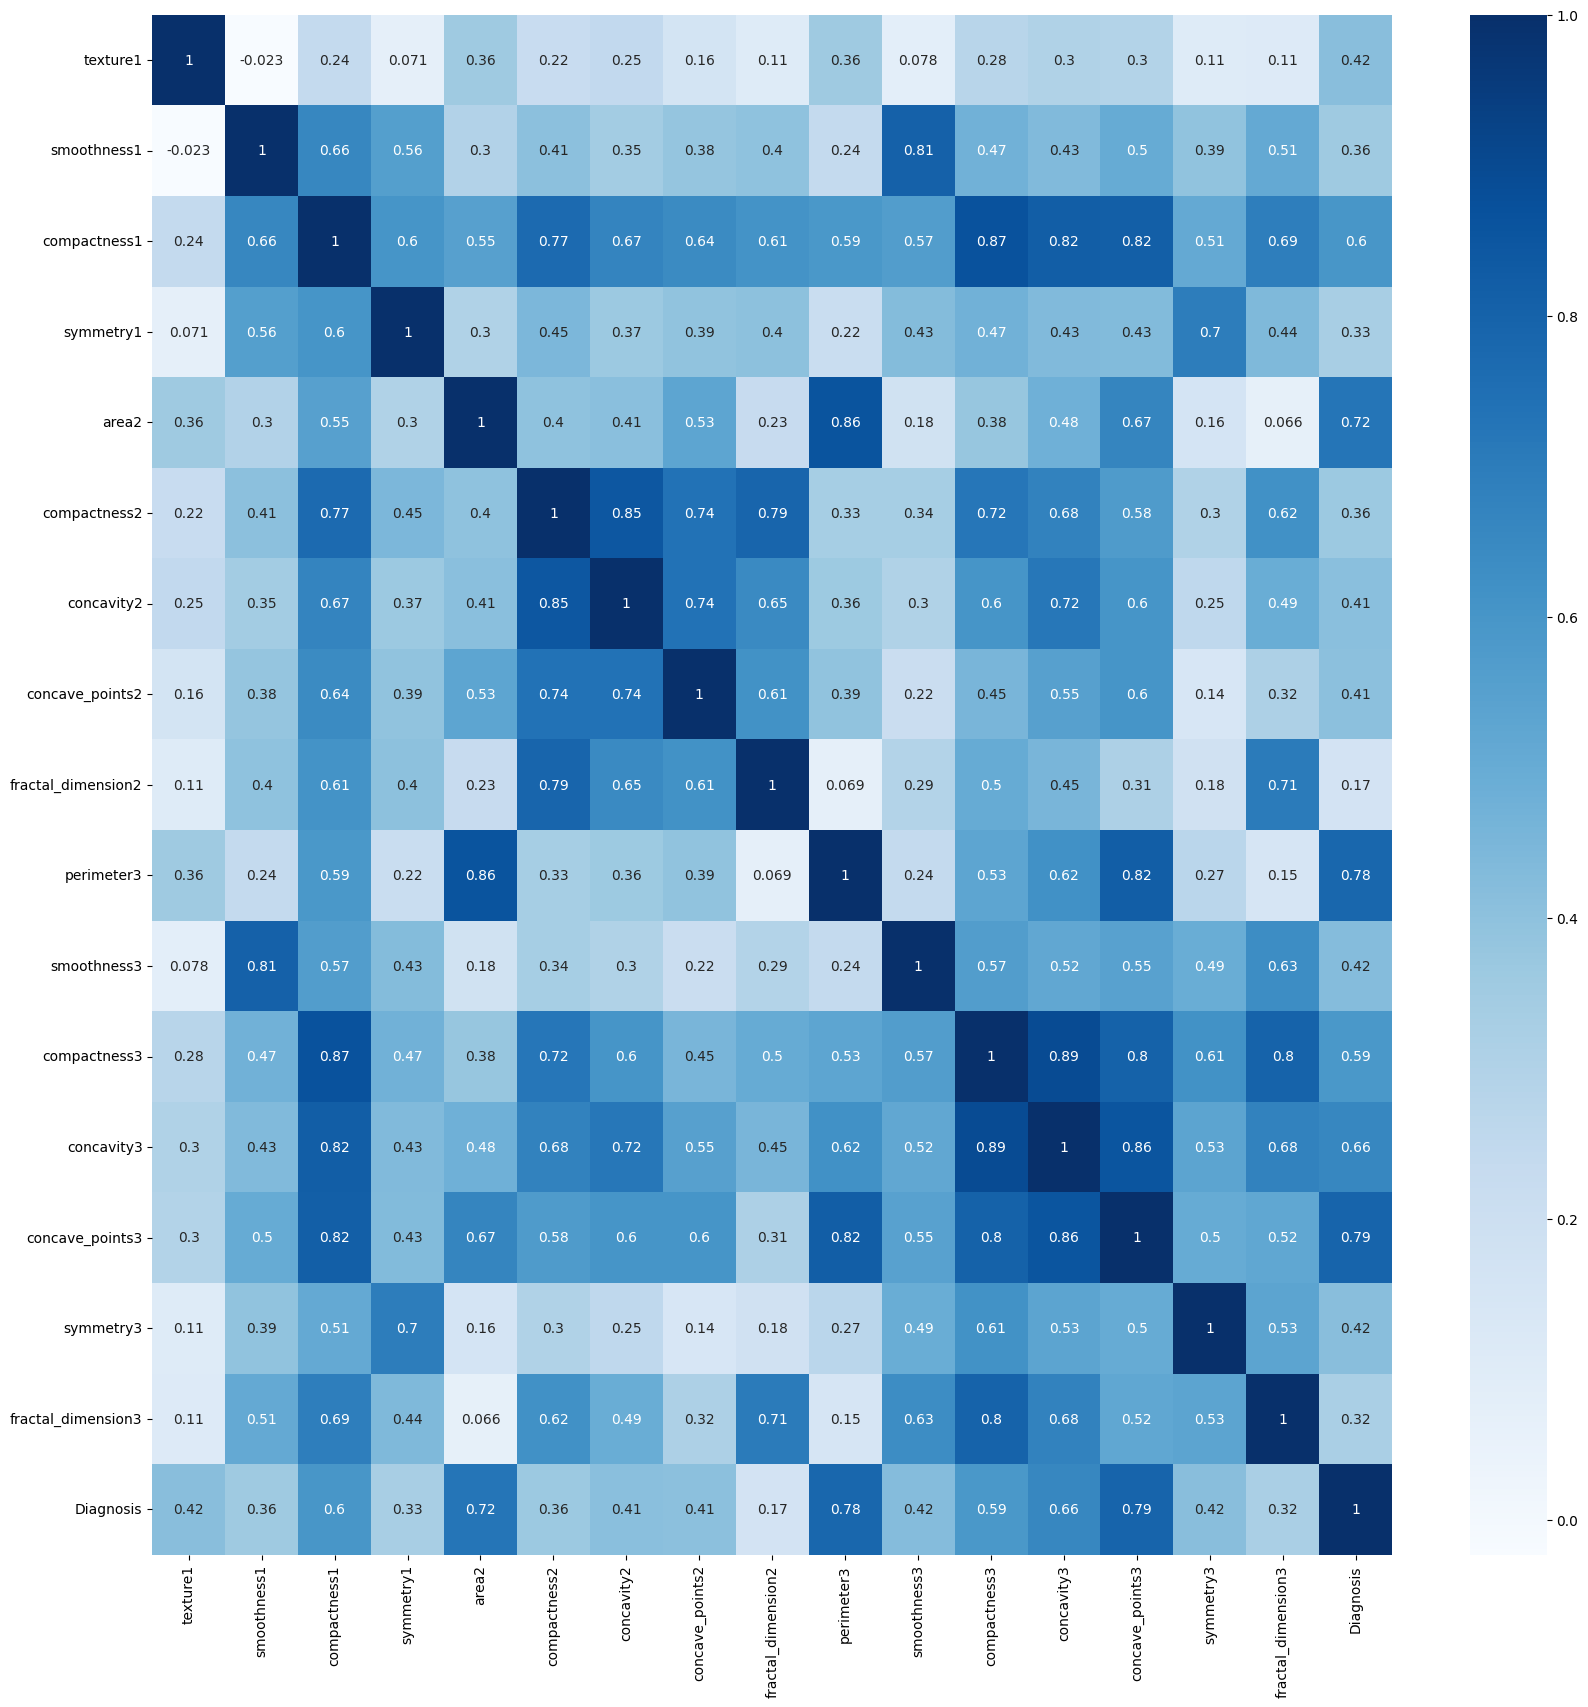

In [247]:
# оценим корреляцию всех признаков между собой и с целевой переменной с помощью матрицы корреляций
plt.subplots(figsize = (20,20))
# corr = data_clean.corr()
sns.heatmap(data_out1.corr(), cmap="Blues", annot=True);

In [248]:
corr_out1 = data_out1.corr()
m_out1 = (corr_out1.mask(np.eye(len(corr_out1), dtype=bool)).abs() > 0.9).any()
raw_out1 = corr_out1.loc[m_out1, m_out1]
raw_out1

Empty DataFrame
Columns: []
Index: []

In [249]:
data_out1.shape

(569, 17)

In [250]:
# посчитаем матрицу корреляций
corr_out1 = data_out1.corr()

# посчитаем ранг и определитель матрицы корреляций
rang_out1 = np.linalg.matrix_rank(corr_out1)
determinant_out1 = np.linalg.det(corr_out1)

rang_out1, determinant_out1

(17, 3.8439860274328174e-10)

сохраняется мультиколлинеальность, удалим еще признаки, котрые мало коррелируют с целевой переменной, но имеют мультиколлинеальность

In [251]:

data_out1.drop(['compactness1', 'compactness2', 'compactness3'], axis =  1, inplace = True)

In [252]:

# посчитаем матрицу корреляций
corr_out1 = data_out1.corr()

# посчитаем ранг и определитель матрицы корреляций
rang_out1 = np.linalg.matrix_rank(corr_out1)
determinant_out1 = np.linalg.det(corr_out1)

rang_out1, determinant_out1

(14, 5.189338512598061e-07)

определитель матрицы все еще близок к нулю, что говорит о сохранении мультиколлинеальности признаков.

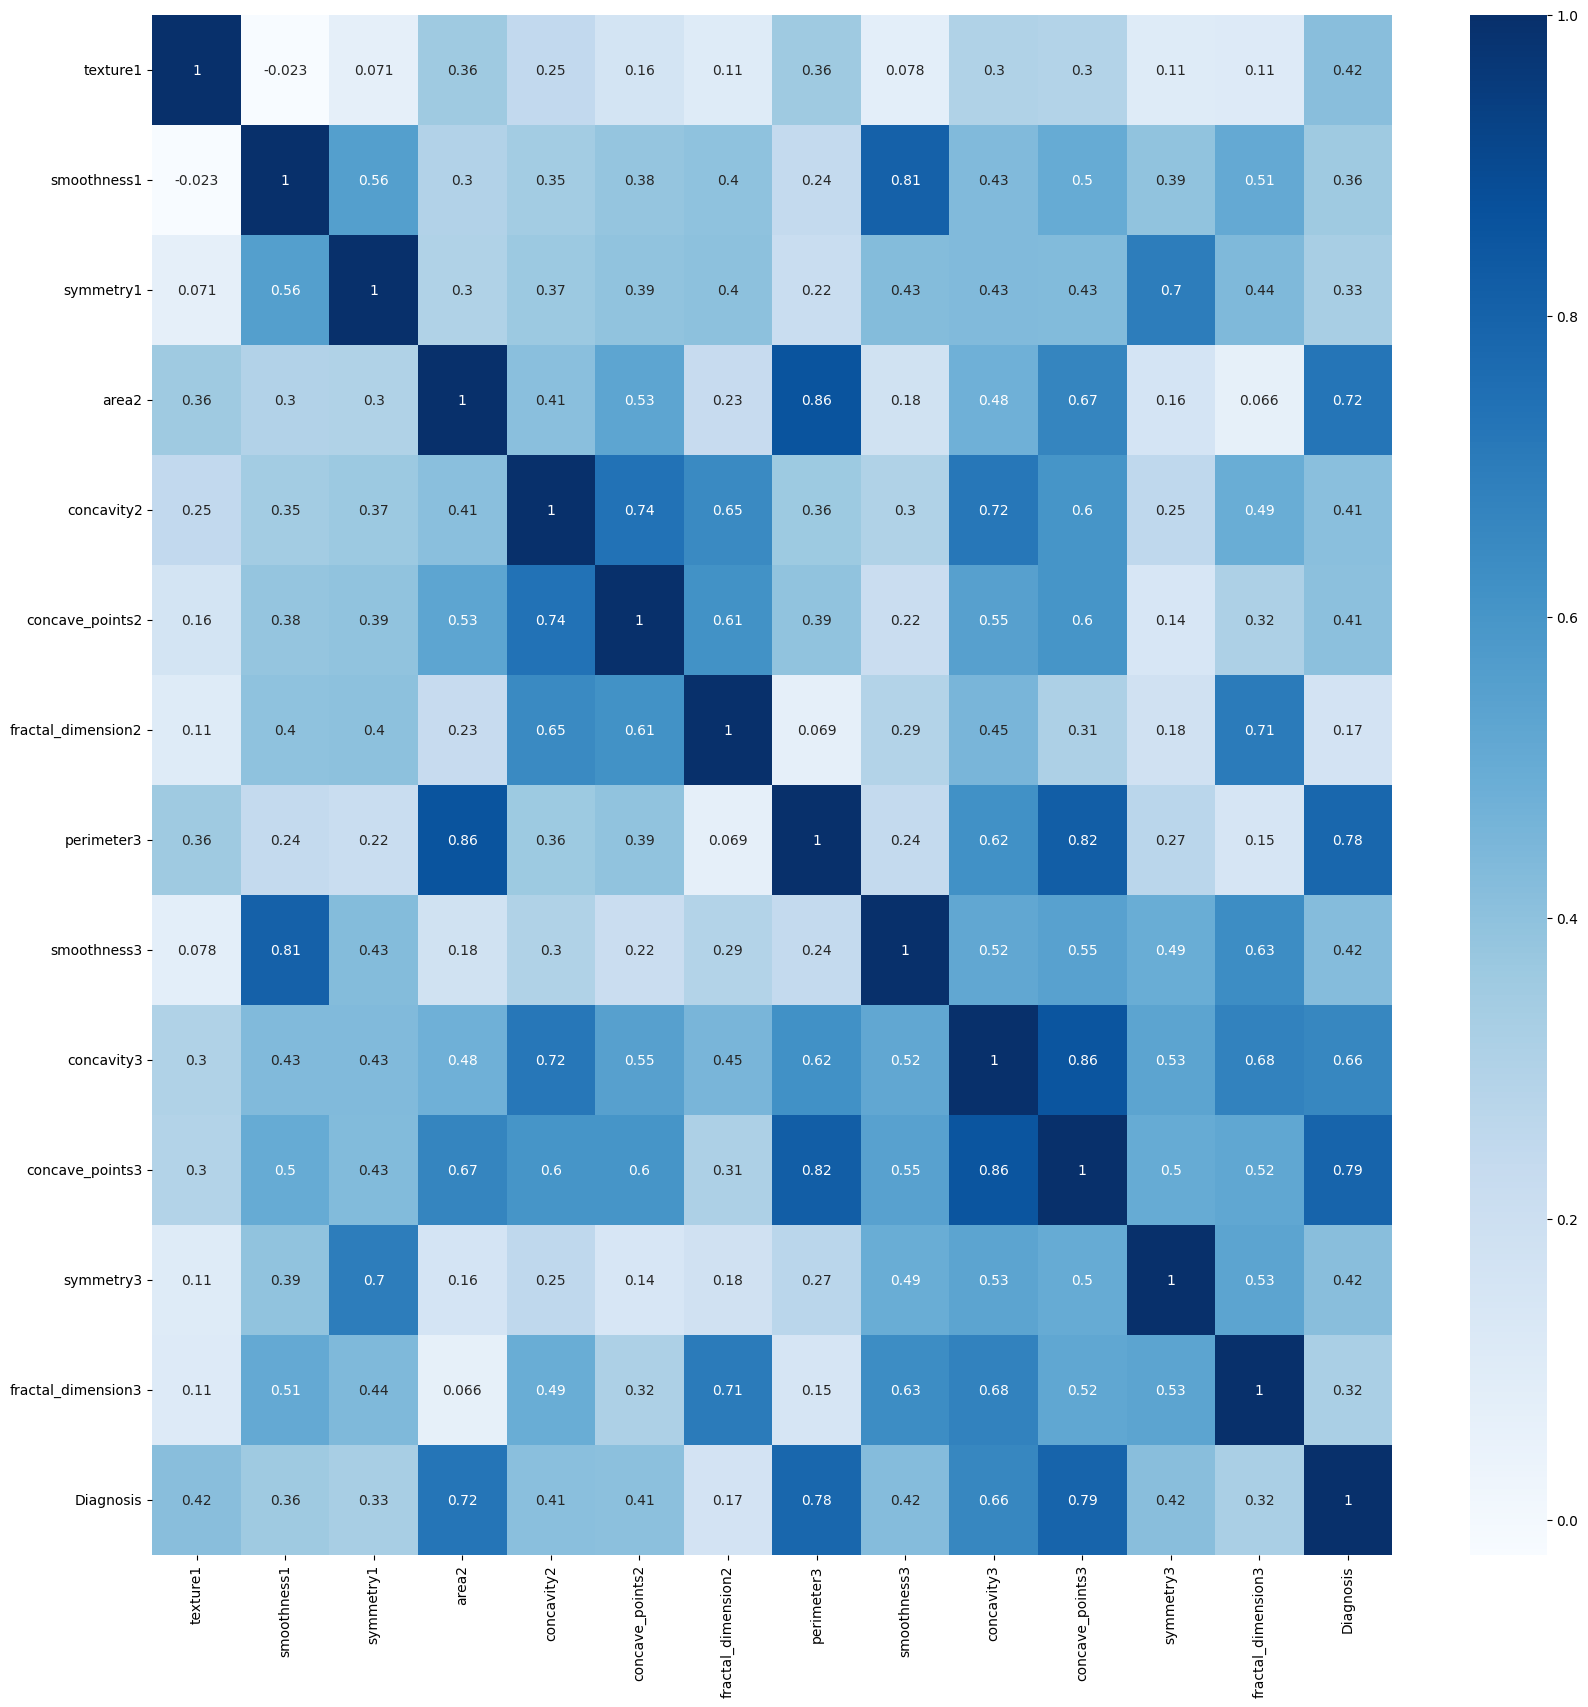

In [253]:
# оценим корреляцию всех признаков между собой и с целевой переменной с помощью матрицы корреляций
plt.subplots(figsize = (20,20))
# corr = data_clean.corr()
sns.heatmap(data_out1.corr(), cmap="Blues", annot=True);

Удалим признаки 'area2', 'concavity3'

In [254]:
data_out1.drop(['area2', 'concavity3'], axis =  1, inplace = True)

In [255]:
# посчитаем матрицу корреляций
corr_out1 = data_out1.corr()

# посчитаем ранг и определитель матрицы корреляций
rang_out1 = np.linalg.matrix_rank(corr_out1)
determinant_out1 = np.linalg.det(corr_out1)

rang_out1, determinant_out1

(12, 3.2711306206216266e-05)

Определитель матрицы немного увеличивается, продолжаем работать с мультиколлинеальностью

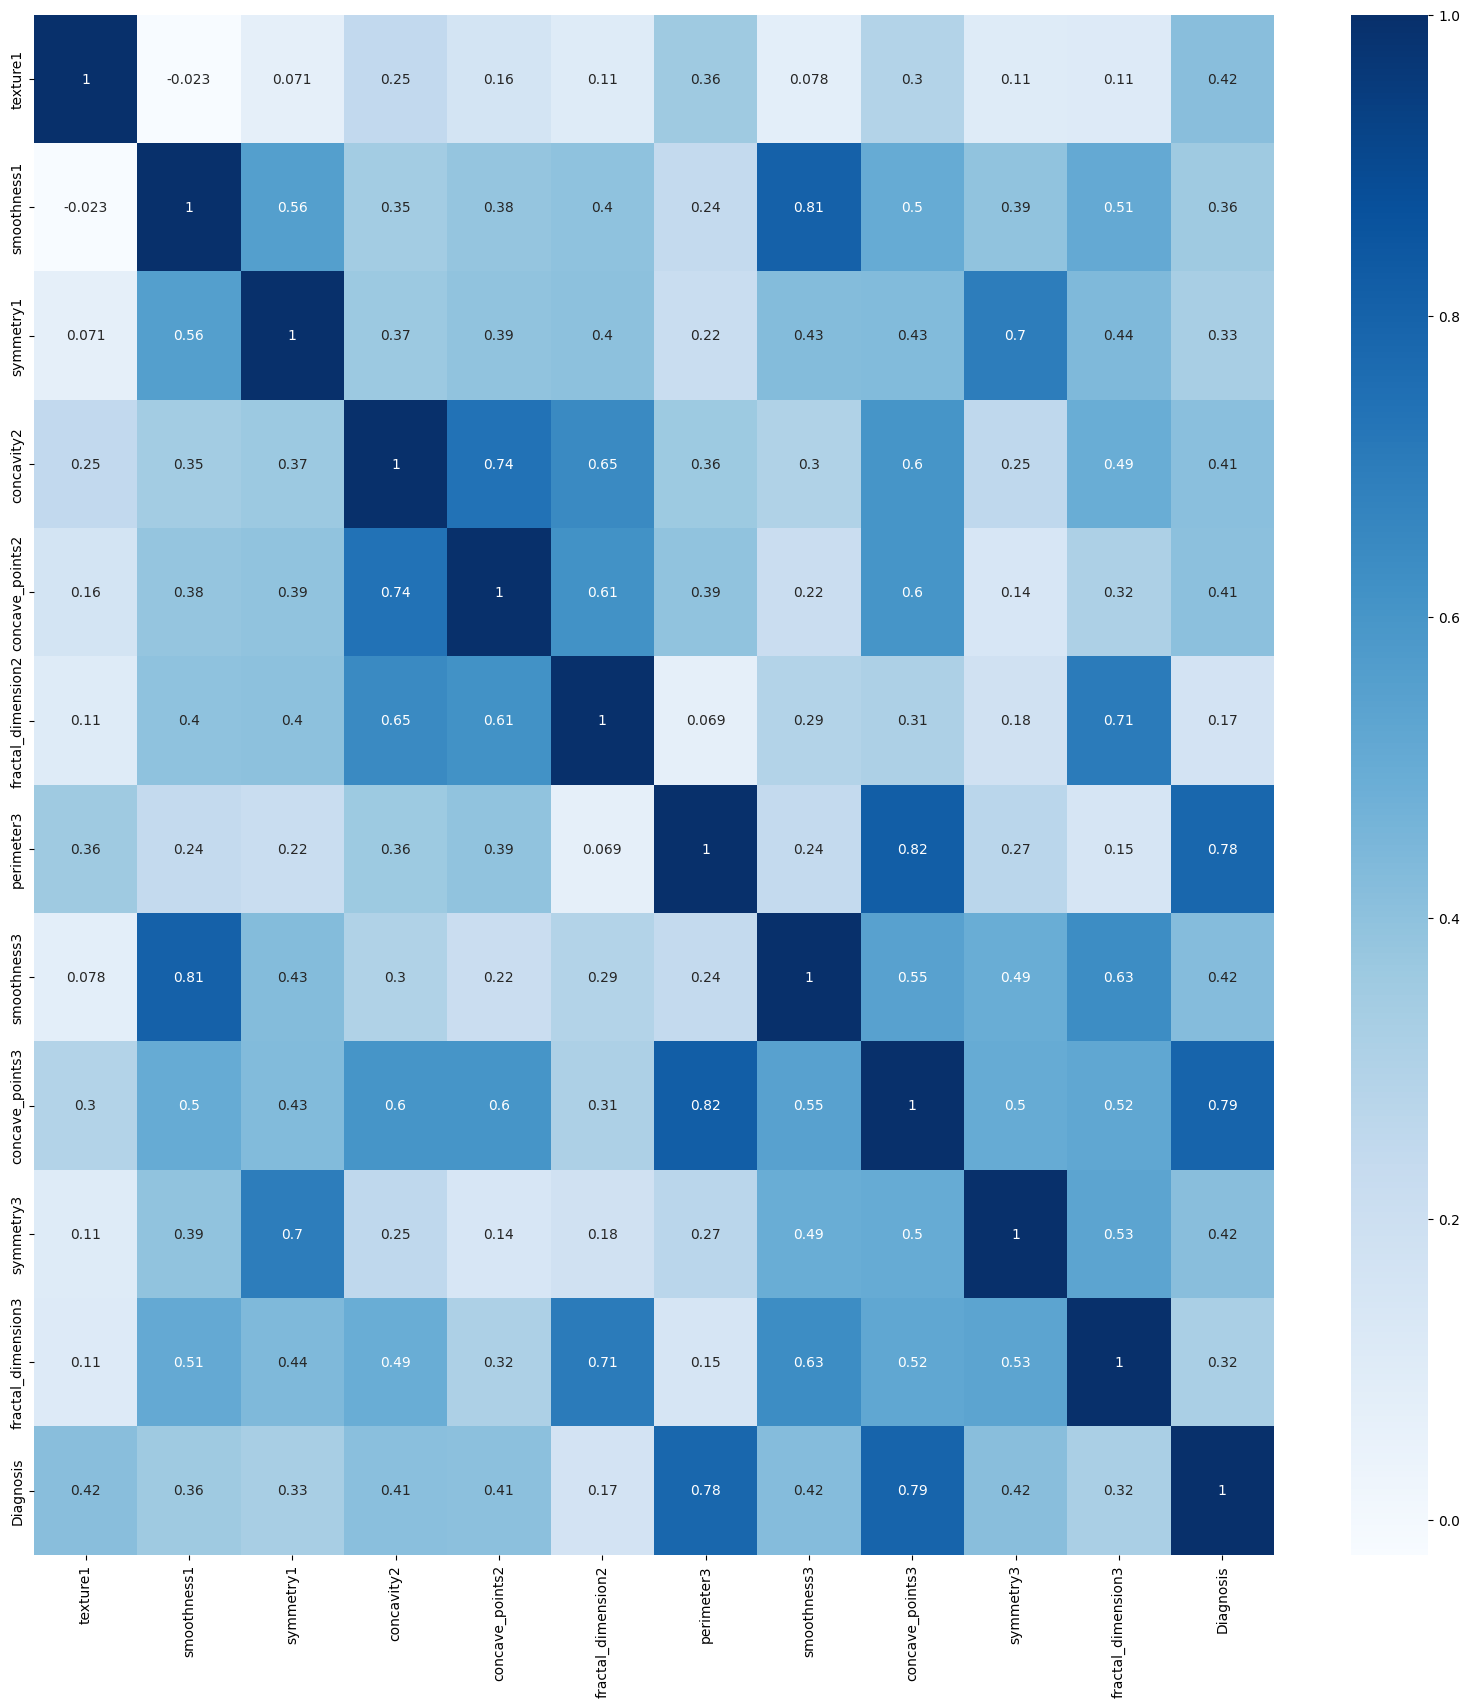

In [256]:
# оценим корреляцию всех признаков между собой и с целевой переменной с помощью матрицы корреляций
plt.subplots(figsize = (20,20))
# corr = data_clean.corr()
sns.heatmap(data_out1.corr(), cmap="Blues", annot=True);

Удалим еще признаки, согласно матрице корреляций.

In [257]:
data_out1.drop(['concave_points3', 'smoothness1', 'concavity2', 'symmetry1', 'fractal_dimension2'], axis =  1, inplace = True)

In [258]:
# посчитаем матрицу корреляций
corr_out1 = data_out1.corr()

# посчитаем ранг и определитель матрицы корреляций
rang_out1 = np.linalg.matrix_rank(corr_out1)
determinant_out1 = np.linalg.det(corr_out1)

rang_out1, determinant_out1

(7, 0.06988495419114628)

In [259]:
data_out1.shape

(569, 7)

ранг матрицы корреляций соотвествует количеству признаков, значение определителя уже не такое маленькое, как было в начале.

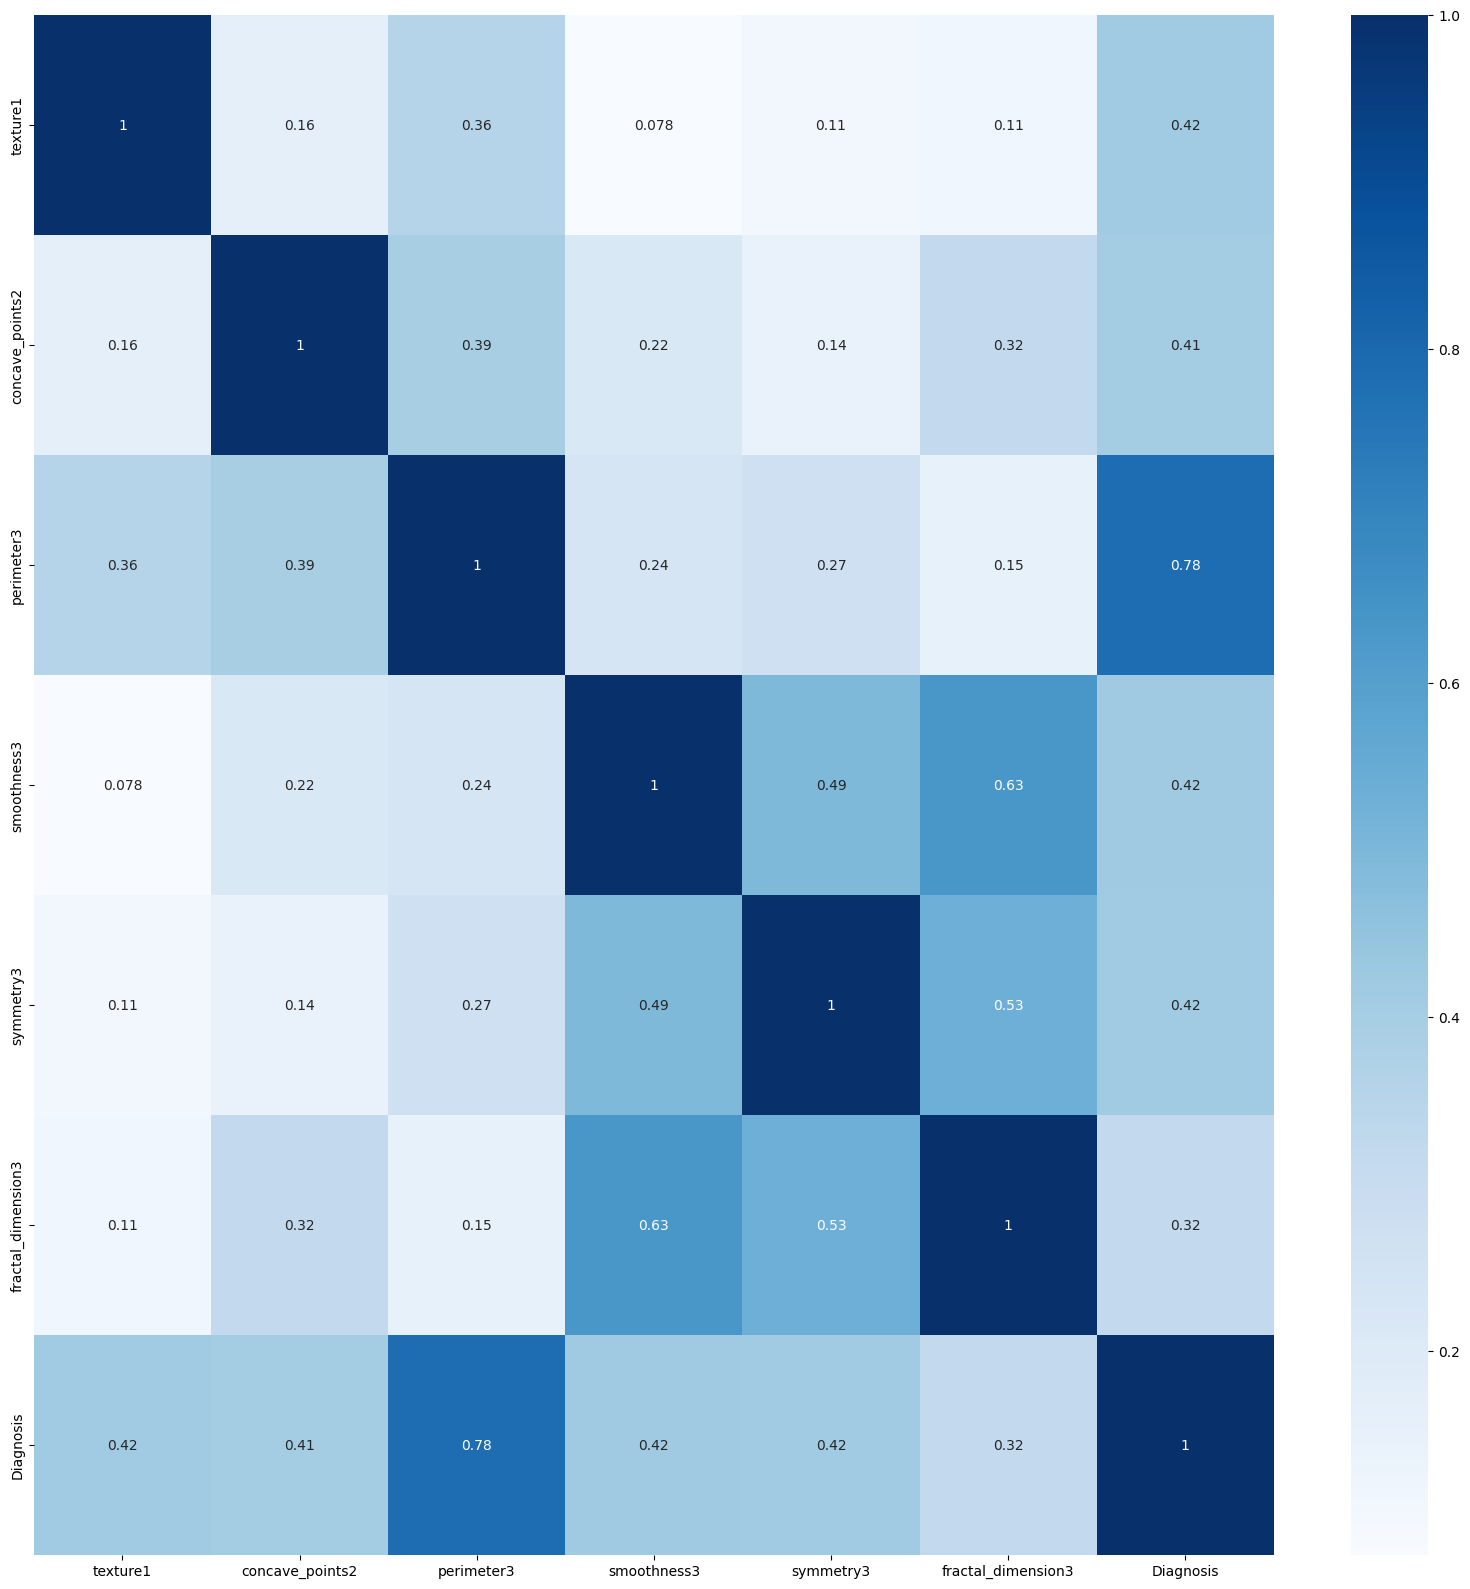

In [260]:
# оценим корреляцию всех признаков между собой и с целевой переменной с помощью матрицы корреляций
plt.subplots(figsize = (20,20))
# corr = data_clean.corr()
sns.heatmap(data_out1.corr(), cmap="Blues", annot=True);

Остановимся на работе с признаками, перейдем к построению моделей на оставшихся признаках

___


Выделим матрицу наблюдений и целевую переменную.

In [261]:
X1 = data_out1.drop('Diagnosis', axis= 1)
y1 = data_out1['Diagnosis']

Разделим данные на тестовую и тренировочные наборы данных

In [262]:
X_train1, X_test1, y_train1, y_test1 = train_test_split( X1, y1, test_size=0.2, random_state=42, shuffle=True, stratify=y)

Стандартизуем наши числовые признаки

In [263]:
# from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train1)
X_test_scaled = scaler.transform(X_test1)

Оценим размер наших выборок

In [264]:
X_train_scaled.shape, X_test_scaled.shape, y_train1.shape, y_test1.shape

((455, 6), (114, 6), (455,), (114,))

In [265]:
X_train_scaled

array([[ 0.89182579, -0.65256108,  0.46690813, -0.59615478,  0.05456632,
         0.12633714],
       [-1.63971029,  0.11450848, -0.61193429,  0.27358196, -0.13757624,
        -1.00769955],
       [ 0.45551496,  0.27368456, -0.47543128, -1.6227852 , -0.675893  ,
        -0.0575607 ],
       ...,
       [ 1.33280304, -0.85232707, -0.492128  , -0.43840841, -0.96490082,
        -1.38060351],
       [ 0.25952507,  0.28801041,  0.124186  , -0.71553041, -0.60284707,
        -0.24656681],
       [ 0.36918608,  0.91516419,  1.03518245,  0.54644054, -0.46151907,
        -0.41513984]])

In [266]:
pred_logreg, proba_logreg, importance_logreg, all_metrics_logreg = model_train_test(
    X_train_scaled, y_train1.values,
    X_test_scaled, y_test1.values,
    LogisticRegression(random_state=42)
)

LogisticRegression(random_state=42)

Accuracy = 0.9649
Balanced_accuracy = 0.9573
Precision = 0.9750
Recall = 0.9286
F1_score = 0.9512
ROC AUC = 0.9964
PR AUC = 0.9947
Specificity = 0.9861


In [267]:
model1 = LogisticRegression(random_state=42, max_iter=500)
model1.fit(X_train_scaled, y_train1)
print('train:', metrics.classification_report(y_train1, model1.predict(X_train_scaled)))
print('test:', metrics.classification_report(y_test1, model1.predict(X_test_scaled)))

train:               precision    recall  f1-score   support

           0       0.97      0.99      0.98       285
           1       0.98      0.95      0.96       170

    accuracy                           0.97       455
   macro avg       0.98      0.97      0.97       455
weighted avg       0.97      0.97      0.97       455

test:               precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [268]:
from sklearn.model_selection import GridSearchCV

param_grid = {'penalty': ['l2', 'none'] ,#тип регурялизации
              'solver': ['lbfgs', 'saga'], #алгоритм оптимизации
              }
grid_search = GridSearchCV(
    estimator=LogisticRegression(
        random_state=42, #генератор случайных чисел
        max_iter=1000 #количество итераций на сходимость
    ), 
    param_grid=param_grid, 
    cv=5, 
    n_jobs = -1
)  
%time grid_search.fit(X_train_scaled, y_train1) 
print("accuracy на тестовом наборе: {:.2f}".format(grid_search.score(X_test_scaled, y_test1)))
y_test_pred = grid_search.predict(X_test_scaled)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print("Наилучшие значения гиперпараметров: {}".format(grid_search.best_params_))

CPU times: total: 62.5 ms
Wall time: 3.2 s
accuracy на тестовом наборе: 0.96
f1_score на тестовом наборе: 0.95
Наилучшие значения гиперпараметров: {'penalty': 'l2', 'solver': 'lbfgs'}


Обучим линейную регрессию с подобранными гиперпараметрами

In [269]:
model1 = LogisticRegression(random_state=42, penalty='l2',solver='lbfgs', max_iter=500)
model1.fit(X_train_scaled, y_train1)
print('train:', metrics.classification_report(y_train1, model1.predict(X_train_scaled)))
print('test:', metrics.classification_report(y_test, model1.predict(X_test_scaled)))

train:               precision    recall  f1-score   support

           0       0.97      0.99      0.98       285
           1       0.98      0.95      0.96       170

    accuracy                           0.97       455
   macro avg       0.98      0.97      0.97       455
weighted avg       0.97      0.97      0.97       455

test:               precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Подберем и оценим параметры с помощью RandomizedSearch

In [270]:
from sklearn.model_selection import RandomizedSearchCV

#np.linspace(start(от), stop(до), num=50(количество),dtype- тип данных)
param_distributions = {'penalty': ['l2', 'none'] ,
              'solver': ['lbfgs', 'sag'],
               'C': list(np.linspace(0.01, 1, 10, dtype=float))}
            
random_search = RandomizedSearchCV(
    estimator=LogisticRegression(random_state=42, max_iter=1000), 
    param_distributions=param_distributions, 
    cv=5, 
    n_iter = 10, 
    n_jobs = -1
)  
%time random_search.fit(X_train_scaled, y_train1) 
print("accuracy на тестовом наборе: {:.2f}".format(random_search.score(X_test_scaled, y_test)))
y_test_pred = random_search.predict(X_test_scaled)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test1, y_test_pred)))
print("Наилучшие значения гиперпараметров: {}".format(random_search.best_params_))

CPU times: total: 15.6 ms
Wall time: 92.6 ms
accuracy на тестовом наборе: 0.96
f1_score на тестовом наборе: 0.95
Наилучшие значения гиперпараметров: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.89}


In [271]:
model1 = LogisticRegression(random_state=42, penalty='l2',solver='lbfgs', C= 0.89, max_iter=500)
model1.fit(X_train_scaled, y_train)
print('train:', metrics.classification_report(y_train1, model1.predict(X_train_scaled)))
print('test:', metrics.classification_report(y_test, model1.predict(X_test_scaled)))

train:               precision    recall  f1-score   support

           0       0.97      0.99      0.98       285
           1       0.98      0.95      0.96       170

    accuracy                           0.97       455
   macro avg       0.98      0.97      0.97       455
weighted avg       0.97      0.97      0.97       455

test:               precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Значительного улучшения качества при подборе гиперпараметров достичь не удалось.
___

In [272]:
pred_dt, proba_dt, importance_dt, all_metrics_dt = model_train_test(
    X_train_scaled, y_train1.values,
    X_test_scaled, y_test1.values,
    DecisionTreeClassifier(random_state=42)
)

DecisionTreeClassifier(random_state=42)

Accuracy = 0.9035
Balanced_accuracy = 0.8938
Precision = 0.8780
Recall = 0.8571
F1_score = 0.8675
ROC AUC = 0.8938
PR AUC = 0.8052
Specificity = 0.9306


In [273]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_scaled, y_train1)
print('train:', metrics.classification_report(y_train1, model.predict(X_train_scaled)))
print('test:', metrics.classification_report(y_test1, model.predict(X_test_scaled)))

train:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       285
           1       1.00      1.00      1.00       170

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



test:               precision    recall  f1-score   support

           0       0.92      0.93      0.92        72
           1       0.88      0.86      0.87        42

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.90       114
weighted avg       0.90      0.90      0.90       114



Есть признаки переобучения модели, метрики на тестовой выборке ниже, чем при использовании модели линейной регрессии. Произведем подбор параметров модели для борьбы с переобучением, и возможно, улучшим качество модели.

In [ ]:
param_distributions = {'min_samples_leaf': list(np.linspace(1, 20, 50, dtype=int)),
              'max_depth': list(np.linspace(1, 30, 50, dtype=int)),
              'criterion':['entropy','gini']
              }
            
random_search_tree = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(random_state=42), 
    param_distributions=param_distributions, 
    cv=5,
    n_iter = 50, 
    n_jobs = -1
)  
%time random_search_tree.fit(X_train_scaled, y_train1) 
print("accuracy на тестовом наборе: {:.2f}".format(random_search_tree.score(X_test_scaled, y_test1)))
y_test_pred = random_search_tree.predict(X_test_scaled)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print("Наилучшие значения гиперпараметров: {}".format(random_search_tree.best_params_))

In [275]:
model1 = DecisionTreeClassifier(min_samples_leaf=8, max_depth = 9, criterion= 'entropy', random_state=42)
model1.fit(X_train_scaled, y_train1)
print('train:', metrics.classification_report(y_train1, model1.predict(X_train_scaled)))
print('test:', metrics.classification_report(y_test1, model1.predict(X_test_scaled)))

train:               precision    recall  f1-score   support

           0       0.96      0.98      0.97       285
           1       0.96      0.92      0.94       170

    accuracy                           0.96       455
   macro avg       0.96      0.95      0.95       455
weighted avg       0.96      0.96      0.96       455

test:               precision    recall  f1-score   support

           0       1.00      0.97      0.99        72
           1       0.95      1.00      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114



Удалось справиться с переобучением и улучшить метрику на тестовой выборке.
___

Перезапишем метрики с гиперпараметрами, чтобы в дальнейшем вывести их в итоговую табицу

In [290]:
pred_dt, proba_dt, importance_dt, all_metrics_dt = model_train_test(
    X_train_scaled, y_train1.values,
    X_test_scaled, y_test1.values,
    DecisionTreeClassifier(min_samples_leaf=8, max_depth = 9, criterion= 'entropy', random_state=42))

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=8,
                       random_state=42)

Accuracy = 0.9825
Balanced_accuracy = 0.9861
Precision = 0.9545
Recall = 1.0000
F1_score = 0.9767
ROC AUC = 0.9980
PR AUC = 0.9950
Specificity = 0.9722



___

In [277]:
pred_knn, proba_knn, importance_knn, all_metrics_knn = model_train_test(
    X_train_scaled, y_train1.values,
    X_test_scaled, y_test1.values,
    KNeighborsClassifier()
)

KNeighborsClassifier()

Accuracy = 0.9474
Balanced_accuracy = 0.9335
Precision = 0.9737
Recall = 0.8810
F1_score = 0.9250
ROC AUC = 0.9709
PR AUC = 0.9391
Specificity = 0.9861


In [278]:
model = KNeighborsClassifier()
model.fit(X_train_scaled, y_train1)
print('train:', metrics.classification_report(y_train1, model.predict(X_train_scaled)))
print('test:', metrics.classification_report(y_test1, model.predict(X_test_scaled)))

train:               precision    recall  f1-score   support

           0       0.96      1.00      0.98       285
           1       0.99      0.92      0.96       170

    accuracy                           0.97       455
   macro avg       0.97      0.96      0.97       455
weighted avg       0.97      0.97      0.97       455

test:               precision    recall  f1-score   support

           0       0.93      0.99      0.96        72
           1       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



Метрики получились достаточно высокими. Посмотрим, сможем ли мы их улучшить подбором гиперпараметры

In [279]:
#np.linspace(start(от), stop(до), num=50(количество),dtype- тип данных)
param_distributions = {'n_neighbors': [1,3,5,7,8,9,10,11,13,15,20, 40] ,
                       'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'weights': ['uniform', 'distance'],
            'metric': ['minkowski', 'euclidean', 'manhattan']
            }
            
knn_search = RandomizedSearchCV(
    estimator=KNeighborsClassifier(), 
    param_distributions=param_distributions, 
    cv=5, 
    n_iter = 10, 
    n_jobs = -1
)  
%time knn_search.fit(X_train_scaled, y_train1) 
print("accuracy на тестовом наборе: {:.2f}".format(knn_search.score(X_test_scaled, y_test1)))
y_test_pred = knn_search.predict(X_test_scaled)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print("Наилучшие значения гиперпараметров: {}".format(knn_search.best_params_))

CPU times: total: 31.2 ms
Wall time: 161 ms
accuracy на тестовом наборе: 0.94
f1_score на тестовом наборе: 0.91
Наилучшие значения гиперпараметров: {'weights': 'distance', 'n_neighbors': 9, 'metric': 'minkowski', 'algorithm': 'kd_tree'}


In [280]:
model_knn = KNeighborsClassifier(weights= 'distance', n_neighbors= 10, metric='manhattan', algorithm= 'ball_tree')
model_knn.fit(X_train_scaled, y_train)
print('train:', metrics.classification_report(y_train1, model_knn.predict(X_train_scaled)))
print('test:', metrics.classification_report(y_test1, model_knn.predict(X_test_scaled)))

train:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       285
           1       1.00      1.00      1.00       170

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455

test:               precision    recall  f1-score   support

           0       0.93      0.99      0.96        72
           1       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



После подбора гиперпараметров оказалось, что модель переобучилась. т.е. базовые параметры по умолчанию оказались лучше, чем после подбора гиперпараметров. 

___

In [281]:
pred_svm, proba_svm, importance_svm, all_metrics_svm = model_train_test(
    X_train_scaled, y_train1.values,
    X_test_scaled, y_test1.values,
    SVC(probability=True)
)

SVC(probability=True)

Accuracy = 0.9561
Balanced_accuracy = 0.9454
Precision = 0.9744
Recall = 0.9048
F1_score = 0.9383
ROC AUC = 0.9967
PR AUC = 0.9945
Specificity = 0.9861


In [282]:
model = SVC(probability=True)
model.fit(X_train_scaled, y_train1)
print('train:', metrics.classification_report(y_train1, model.predict(X_train_scaled)))
print('test:', metrics.classification_report(y_test1, model.predict(X_test_scaled)))

train:               precision    recall  f1-score   support

           0       0.97      1.00      0.98       285
           1       0.99      0.95      0.97       170

    accuracy                           0.98       455
   macro avg       0.98      0.97      0.98       455
weighted avg       0.98      0.98      0.98       455

test:               precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



Метрики оказались довольно высокими, признаков переобучения нет.

Попробуем подобрать гиперпараметры по сетке.

In [ ]:
param_distributions = {'C' :[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
                       'degree' : [1,2,3,4],
              'gamma': ['scale', 'auto']
            }
            
svc_search = RandomizedSearchCV(
    estimator=SVC(), 
    param_distributions=param_distributions, 
    cv=5, 
    n_iter = 10, 
    n_jobs = -1
)  
%time svc_search.fit(X_train_scaled, y_train1) 
print("accuracy на тестовом наборе: {:.2f}".format(svc_search.score(X_test_scaled, y_test1)))
y_test_pred = svc_search.predict(X_test_scaled)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print("Наилучшие значения гиперпараметров: {}".format(svc_search.best_params_))

Обучим модель с подобранными гиперпараметрами

In [284]:
model_svc = SVC(probability=True, gamma = 'auto', degree= 3, C= 0.7)
model_svc.fit(X_train_scaled, y_train1)
print('train:', metrics.classification_report(y_train1, model.predict(X_train_scaled)))
print('test:', metrics.classification_report(y_test1, model.predict(X_test_scaled)))

train:               precision    recall  f1-score   support

           0       0.97      1.00      0.98       285
           1       0.99      0.95      0.97       170

    accuracy                           0.98       455
   macro avg       0.98      0.97      0.98       455
weighted avg       0.98      0.98      0.98       455

test:               precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



Не удалось добиться улучшения качества, параметры остаются стабильно высокими.
___

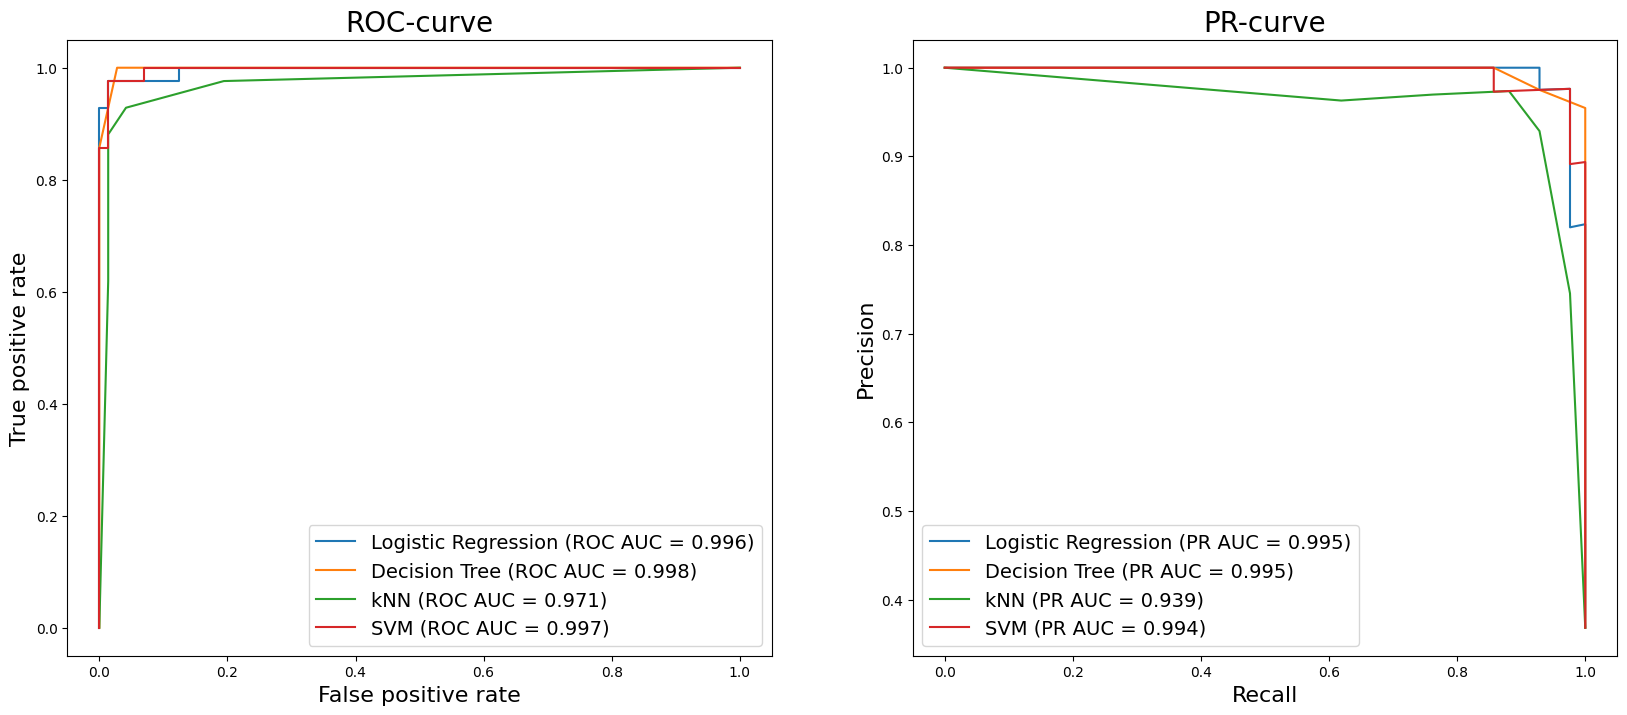

In [285]:
# сравним кривые ROC-curve и PR-curve

plot_roc_pr_curves(
    y_test1,
    {
        "Logistic Regression": proba_logreg,
        "Decision Tree": proba_dt,
        "kNN": proba_knn,
        "SVM": proba_svm,
    }
)

Сгенерируем метрики всех моделей

In [286]:
ans_df1 = pd.DataFrame(
    [all_metrics_logreg, all_metrics_dt, all_metrics_knn, all_metrics_svm],
    index=["Logistic Regression", "Decision Tree", "kNN", "SVM"]
)
ans_df1

Accuracy  Balanced accuracy  Precision    Recall  \
Logistic Regression  0.964912           0.957341   0.975000  0.928571   
Decision Tree        0.982456           0.986111   0.954545  1.000000   
kNN                  0.947368           0.933532   0.973684  0.880952   
SVM                  0.956140           0.945437   0.974359  0.904762   

                     F1_score   ROC AUC    PR AUC  Specificity  
Logistic Regression  0.951220  0.996362  0.994651       0.9861  
Decision Tree        0.976744  0.998016  0.994968       0.9722  
kNN                  0.925000  0.970899  0.939050       0.9861  
SVM                  0.938272  0.996693  0.994487       0.9861

выведем список моделей по убыванию качества

In [291]:
for metric in ans_df1.columns:
    sorted_ans_df1 = ans_df1.sort_values(by=metric, ascending=False)
    print(
        "{}:{}{}".format(
            metric,
            " " * (20 - len(metric)),
            sorted_ans_df1.index.tolist()
        )
    )

Accuracy:            ['Decision Tree', 'Logistic Regression', 'SVM', 'kNN']
Balanced accuracy:   ['Decision Tree', 'Logistic Regression', 'SVM', 'kNN']
Precision:           ['Logistic Regression', 'SVM', 'kNN', 'Decision Tree']
Recall:              ['Decision Tree', 'Logistic Regression', 'SVM', 'kNN']
F1_score:            ['Decision Tree', 'Logistic Regression', 'SVM', 'kNN']
ROC AUC:             ['Decision Tree', 'SVM', 'Logistic Regression', 'kNN']
PR AUC:              ['Decision Tree', 'Logistic Regression', 'SVM', 'kNN']
Specificity:         ['Logistic Regression', 'kNN', 'SVM', 'Decision Tree']


Таким образом после работы с признаками, удаления мультиколлинеальных признаков, и стандартизации признаков после подачи в модель удалось получить улучшение качества моделей, и выведения модели Decision Tree на первое место почти по всем метрикам(при построении моделей на "сырых" данных , первое место заняла модель Logistic Regression)

Выведем признаки, по которым удалось добиться такого высокого качества модели: 'texture1', 'concave_points2', 'perimeter3', 'smoothness3', 'symmetry3', 'fractal_dimension3'

In [288]:
X_test1.columns

Index(['texture1', 'concave_points2', 'perimeter3', 'smoothness3', 'symmetry3',
       'fractal_dimension3'],
      dtype='object')

Выведем итоговые метрики модели Decision Treee

In [289]:
ans_df1.loc['Decision Tree']

Accuracy             0.982456
Balanced accuracy    0.986111
Precision            0.954545
Recall               1.000000
F1_score             0.976744
ROC AUC              0.998016
PR AUC               0.994968
Specificity          0.972200
Name: Decision Tree, dtype: float64

___
